<h1>Simon, Searchlight, No Game: Between Participants, Equal Distributions, 4 Rounds</h1>

In [ ]:
import os 
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt

from util.survey_structure import FSS_SURVEY_STATEMENTS, SURVEY_DIMENSIONS
from util.simon_exposures_counter import simon_exposures_counter, baseline_exposures_counter

In [ ]:
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(font_scale=2)

In [ ]:
# SEARCHLIGHT_DATA_PATH = "./data/10-participants-4-rounds/searchlight.db"
# NO_GAME_DATA_PATH = "./data/10-participants-4-rounds/no-game.db"
# SIMON_DATA_PATH = "./data/10-participants-4-rounds/simon.db"


SEARCHLIGHT_DATA_PATH = "./data/30-participants/searchlight.db"
NO_GAME_DATA_PATH = "./data/30-participants/no-game.db"
SIMON_DATA_PATH = "./data/30-participants/simon.db"

In [ ]:
FOLDER_NAME = "30-participants-study-results"

In [ ]:
# Note: this will all be reassigned to actual datasets below 
TRIAL_TABLE_NAME = "table_trialLog"
DEMOGRAPHICS = "questionnaire_demographics"
PARTICIPANT = "participant"
PROGRESS = "progress"

In [ ]:
FSS_SURVEY_ONE_NO_GAME = "questionnaire_questionnaire_fss_no_game_1"
FSS_SURVEY_TWO_NO_GAME = "questionnaire_questionnaire_fss_no_game_2"
FSS_SURVEY_THREE_NO_GAME = "questionnaire_questionnaire_fss_no_game_3"
FSS_SURVEY_FOUR_NO_GAME = "questionnaire_questionnaire_fss_no_game_4"
FSS_SURVEY_ONE_SIMON = "questionnaire_modified_fss_1"
FSS_SURVEY_TWO_SIMON = "questionnaire_modified_fss_2"
FSS_SURVEY_THREE_SIMON = "questionnaire_modified_fss_3"
FSS_SURVEY_FOUR_SIMON = "questionnaire_modified_fss_4"
FSS_SURVEY_ONE = "questionnaire_questionnaire_fss_1"
FSS_SURVEY_TWO= "questionnaire_questionnaire_fss_2"
FSS_SURVEY_THREE = "questionnaire_questionnaire_fss_3"
FSS_SURVEY_FOUR = "questionnaire_questionnaire_fss_4"

<h2>Read in No Game</h2>

In [ ]:
no_game_connection = sqlite3.connect(NO_GAME_DATA_PATH)
cursor = no_game_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_questionnaire_fss_no_game_1',), ('questionnaire_questionnaire_fss_no_game_4',), ('questionnaire_prolific_start',), ('questionnaire_questionnaire_fss_2',), ('questionnaire_questionnaire_fss_no_game_3',), ('questionnaire_questionnaire_fss_1',), ('questionnaire_demographics',), ('questionnaire_questionnaire_fss_3',), ('questionnaire_questionnaire_fss_no_game_2',), ('table_trialLog',), ('table_streamLog',)]


In [ ]:
NO_GAME_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", no_game_connection)
NO_GAME_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", no_game_connection)
NO_GAME_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE_NO_GAME}", no_game_connection)
NO_GAME_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO_NO_GAME}", no_game_connection)
NO_GAME_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE_NO_GAME}", no_game_connection)
NO_GAME_FSS_FOUR = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_FOUR_NO_GAME}", no_game_connection)
NO_GAME_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", no_game_connection)
NO_GAME_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", no_game_connection)
no_game_connection.close()

In [ ]:
NO_GAME_FSS_ONE['breakpoint'] = 1
NO_GAME_FSS_TWO['breakpoint'] = 2
NO_GAME_FSS_THREE['breakpoint'] = 3
NO_GAME_FSS_FOUR['breakpoint'] = 4

NO_GAME_SURVEY = pd.concat([NO_GAME_FSS_ONE, NO_GAME_FSS_TWO, NO_GAME_FSS_THREE, NO_GAME_FSS_FOUR], ignore_index=True)

<h2>Read in Searchlight Data</h2>

In [ ]:
searchlight_connection = sqlite3.connect(SEARCHLIGHT_DATA_PATH)
cursor = searchlight_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_questionnaire_fss_no-game_3',), ('questionnaire_questionnaire_fss_4',), ('questionnaire_prolific_start',), ('questionnaire_questionnaire_fss_2',), ('questionnaire_questionnaire_fss_1',), ('questionnaire_questionnaire_fss_no-game_1',), ('questionnaire_demographics',), ('questionnaire_questionnaire_fss_3',), ('questionnaire_questionnaire_fss_no-game_2',), ('table_trialLog',), ('table_streamLog',)]


In [ ]:
SEARCHLIGHT_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", searchlight_connection)
SEARCHLIGHT_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", searchlight_connection)
SEARCHLIGHT_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE}", searchlight_connection)
SEARCHLIGHT_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO}", searchlight_connection)
SEARCHLIGHT_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE}", searchlight_connection)
SEARCHLIGHT_FSS_FOUR= pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_FOUR}", searchlight_connection)
SEARCHLIGHT_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", searchlight_connection)
SEARCHLIGHT_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", searchlight_connection)
searchlight_connection.close()

In [ ]:
SEARCHLIGHT_FSS_ONE['breakpoint'] = 1
SEARCHLIGHT_FSS_TWO['breakpoint'] = 2
SEARCHLIGHT_FSS_THREE['breakpoint'] = 3
SEARCHLIGHT_FSS_FOUR['breakpoint'] = 4

SEARCHLIGHT_SURVEY = pd.concat([SEARCHLIGHT_FSS_ONE, SEARCHLIGHT_FSS_TWO, SEARCHLIGHT_FSS_THREE, SEARCHLIGHT_FSS_FOUR], ignore_index=True)

<h2>Read in Simon data</h2>

In [ ]:
simon_connection = sqlite3.connect(SIMON_DATA_PATH)
cursor = simon_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_end_questionnaire',), ('questionnaire_modified_fss_2',), ('questionnaire_preferences',), ('questionnaire_prolific_start',), ('questionnaire_modified_fss_4',), ('questionnaire_modified_fss_1',), ('questionnaire_demographics',), ('questionnaire_modified_fss_3',), ('table_trialLog',), ('table_streamLog',)]


In [ ]:
SIMON_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", simon_connection)
SIMON_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", simon_connection)
SIMON_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE_SIMON}", simon_connection)
SIMON_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO_SIMON}", simon_connection)
SIMON_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE_SIMON}", simon_connection)
SIMON_FSS_FOUR = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_FOUR_SIMON}", simon_connection)
SIMON_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", simon_connection)
SIMON_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", simon_connection)       
simon_connection.close()

In [ ]:
SIMON_FSS_TWO.columns

Index(['modified_fss_2ID', 'participantID', 'tag', 'timeStarted', 'timeEnded',
       'imi_interest_enjoyment', 'imi_effort_importance',
       'imi_value_usefulness', 'pens_competence', 'pens_intuitive_controls',
       'attention', 'fss_time_transformation_quickly',
       'fss_time_transformation_slowly', 'fss_unambiguous_feedback',
       'fss_concentration', 'fss_merging_action_and_awareness'],
      dtype='str')

In [ ]:
SIMON_FSS_ONE['breakpoint'] = 1
SIMON_FSS_TWO['breakpoint'] = 2
SIMON_FSS_THREE['breakpoint'] = 3   
SIMON_FSS_FOUR['breakpoint'] = 4

SIMON_SURVEY = pd.concat([SIMON_FSS_ONE, SIMON_FSS_TWO, SIMON_FSS_THREE, SIMON_FSS_FOUR], ignore_index=True )

<h2>Data Setup</h2>



In [ ]:
NO_GAME_TRIAL_DATA['treatment'] = 'no-game'
SIMON_TRIAL_DATA['treatment'] = 'simon'
SEARCHLIGHT_TRIAL_DATA['treatment'] = 'searchlight'

In [ ]:
# NO_GAME_IDS_TO_REMOVE = [1, 2, 3, 4, 6]
# SEARCHLIGHT_IDS_TO_REMOVE = [6, 12, 13, 14, 15]
# SIMON_IDS_TO_REMOVE = [1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 18, 19, 20, 21]


NO_GAME_IDS_TO_REMOVE = [1, 2, 3, 7, 10, 11, 17, 24]
SEARCHLIGHT_IDS_TO_REMOVE = [1, 7, 31, 34, 35, 36]
SIMON_IDS_TO_REMOVE = [1, 18, 22]


In [ ]:

SEARCHLIGHT_TRIAL_DATA = SEARCHLIGHT_TRIAL_DATA[~SEARCHLIGHT_TRIAL_DATA["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_DEMOGRAPHICS = SEARCHLIGHT_DEMOGRAPHICS[~SEARCHLIGHT_DEMOGRAPHICS["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_PARTICIPANT = SEARCHLIGHT_PARTICIPANT[~SEARCHLIGHT_PARTICIPANT["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_SURVEY = SEARCHLIGHT_SURVEY[~SEARCHLIGHT_SURVEY["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]

NO_GAME_TRIAL_DATA = NO_GAME_TRIAL_DATA[~NO_GAME_TRIAL_DATA["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_DEMOGRAPHICS = NO_GAME_DEMOGRAPHICS[~NO_GAME_DEMOGRAPHICS["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_PARTICIPANT = NO_GAME_PARTICIPANT[~NO_GAME_PARTICIPANT["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_SURVEY = NO_GAME_SURVEY[~NO_GAME_SURVEY["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]

SIMON_TRIAL_DATA = SIMON_TRIAL_DATA[~SIMON_TRIAL_DATA["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_DEMOGRAPHICS = SIMON_DEMOGRAPHICS[~SIMON_DEMOGRAPHICS["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_PARTICIPANT = SIMON_PARTICIPANT[~SIMON_PARTICIPANT["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_SURVEY = SIMON_SURVEY[~SIMON_SURVEY["participantID"].isin(SIMON_IDS_TO_REMOVE)]

<h2>Demographics</h2>

In [ ]:
SEARCHLIGHT_DEMOGRAPHICS['CVD'].value_counts()

CVD
No     29
Yes     1
Name: count, dtype: int64

In [ ]:
SIMON_DEMOGRAPHICS['CVD'].value_counts()

CVD
No     27
Yes     3
Name: count, dtype: int64

In [ ]:
NO_GAME_DEMOGRAPHICS['CVD'].value_counts()

CVD
No    30
Name: count, dtype: int64

In [ ]:
SEARCHLIGHT_DEMOGRAPHICS['input_device'].unique()


<StringArray>
['Mouse', 'Trackpad']
Length: 2, dtype: str

In [ ]:
SIMON_DEMOGRAPHICS['input_device'].unique()

<StringArray>
['Mouse', 'Trackpad']
Length: 2, dtype: str

In [ ]:
NO_GAME_DEMOGRAPHICS['input_device'].unique()

<StringArray>
['Trackpad', 'Mouse']
Length: 2, dtype: str

In [ ]:
SIMON_DEMOGRAPHICS['gender'].value_counts()

gender
Woman         20
Man            8
Non-binary     2
Name: count, dtype: int64

In [ ]:
SEARCHLIGHT_DEMOGRAPHICS['gender'].value_counts()

gender
Man      15
Woman    15
Name: count, dtype: int64

In [ ]:
NO_GAME_DEMOGRAPHICS['gender'].value_counts()

gender
Woman         16
Man           13
Non-binary     1
Name: count, dtype: int64

In [ ]:
SIMON_DEMOGRAPHICS['microsoftFamiliarity'].value_counts()

microsoftFamiliarity
Yes    30
Name: count, dtype: int64

In [ ]:
SEARCHLIGHT_DEMOGRAPHICS['microsoftFamiliarity'].value_counts()

microsoftFamiliarity
Yes    29
No      1
Name: count, dtype: int64

In [ ]:
NO_GAME_DEMOGRAPHICS['microsoftFamiliarity'].value_counts()

microsoftFamiliarity
Yes    29
No      1
Name: count, dtype: int64

In [ ]:
SIMON_DEMOGRAPHICS['microsoftUsage'].value_counts()

microsoftUsage
0     8
1     6
5     4
50    2
4     2
10    2
8     1
2     1
7     1
35    1
6     1
15    1
Name: count, dtype: int64

In [ ]:
SEARCHLIGHT_DEMOGRAPHICS['microsoftUsage'].value_counts()

microsoftUsage
10    6
2     4
30    3
5     3
0     3
6     2
3     2
25    2
40    1
12    1
15    1
1     1
4     1
Name: count, dtype: int64

In [ ]:
NO_GAME_DEMOGRAPHICS['microsoftUsage'].value_counts()

microsoftUsage
10    7
0     7
20    3
2     2
1     2
16    1
35    1
25    1
3     1
5     1
6     1
4     1
30    1
15    1
Name: count, dtype: int64

<h2>Flow State and Motivational Survey</h2>

In [ ]:
strange_ids = SIMON_SURVEY[(SIMON_SURVEY['participantID'] == 14) | (SIMON_SURVEY['participantID'] == 23)]
strange_ids

modified_fss_1ID  participantID tag                 timeStarted  \
18               19.0             23      2026-02-03 21:07:01.067399   
57                NaN             14      2026-02-03 21:24:24.269356   
87                NaN             14      2026-02-03 21:29:52.603000   
116               NaN             14      2026-02-03 21:34:02.092647   

                      timeEnded imi_interest_enjoyment imi_effort_importance  \
18   2026-02-03 21:07:44.484738                      2                     6   
57   2026-02-03 21:25:21.076676                      5                     6   
87   2026-02-03 21:30:21.574734            4 (Neutral)                     5   
116  2026-02-03 21:34:32.655891                      2                     6   

    imi_value_usefulness pens_competence pens_intuitive_controls  \
18                     5     4 (Neutral)      7 (Strongly Agree)   
57                     5               6                       5   
87           4 (Neutral)               5                       5   
116          4 (Neutral)     4 (Neutral)             4 (Neutral)   

              attention fss_time_transformation_quickly  \
18   7 (Strongly Agree)                     4 (Neutral)   
57   7 (Strongly Agree)                               5   
87   7 (Strongly Agree)                     4 (Neutral)   
116  7 (Strongly Agree)                               3   

    fss_time_transformation_slowly fss_unambiguous_feedback fss_concentration  \
18                     4 (Neutral)       7 (Strongly Agree)                 3   
57                               5                        5                 6   
87                               3                        5                 6   
116                              5                        5       4 (Neutral)   

    fss_merging_action_and_awareness  breakpoint  modified_fss_2ID  \
18                                 2           1               NaN   
57                       4 (Neutral)           2              28.0   
87                                 5           3               NaN   
116                                5           4               NaN   

     modified_fss_3ID  modified_fss_4ID  
18                NaN               NaN  
57                NaN               NaN  
87               28.0               NaN  
116               NaN              27.0

In [ ]:
NO_GAME_SURVEY['participantID'].value_counts()

participantID
5     4
14    4
13    4
6     4
8     4
16    4
21    4
9     4
15    4
4     4
26    4
22    4
18    4
25    4
31    4
23    4
28    4
20    4
33    4
32    4
19    4
27    4
12    4
37    4
30    4
36    4
34    4
29    4
35    4
38    4
Name: count, dtype: int64

In [ ]:
SEARCHLIGHT_SURVEY['participantID'].value_counts()

participantID
4     4
3     4
14    4
11    4
16    4
5     4
2     4
29    4
26    4
23    4
20    4
6     4
9     4
21    4
25    4
8     4
18    4
10    4
24    4
27    4
28    4
22    4
15    4
17    4
30    4
12    4
19    4
32    4
13    4
33    4
Name: count, dtype: int64

In [ ]:
# Note Side Effects: This function will alter the original dataframe (shallow copy)
def format_likert_data_for_histogram(df: pd.DataFrame, likert_columns: list) -> pd.DataFrame:
    for column_name in likert_columns:
        df[column_name] = df[column_name].replace('1 (Strongly Disagree)', '1')
        df[column_name] = df[column_name].replace('7 (Strongly Agree)', '7')
        df[column_name] = df[column_name].replace('4 (Neutral)', '4')
        df[column_name] = df[column_name].astype('int64')
    return df

In [ ]:
SIMON_SURVEY.value_counts

<bound method DataFrame.value_counts of      modified_fss_1ID  participantID tag                 timeStarted  \
0                 1.0              5      2026-02-03 20:59:26.398776   
1                 2.0              4      2026-02-03 20:59:34.593985   
2                 3.0              7      2026-02-03 21:00:08.273707   
3                 4.0             10      2026-02-03 21:00:50.974025   
4                 5.0              3      2026-02-03 21:01:34.019764   
..                ...            ...  ..                         ...   
115               NaN             26      2026-02-03 21:27:42.022338   
116               NaN             14      2026-02-03 21:34:02.092647   
117               NaN             32      2026-02-03 21:35:09.846276   
118               NaN             33      2026-02-03 21:37:57.137168   
119               NaN             12      2026-02-03 21:42:50.597726   

                      timeEnded imi_interest_enjoyment imi_effort_importance  \
0    2026-02-03

In [ ]:
SEARCHLIGHT_SURVEY['condition'] = 'Shipwrecked'
NO_GAME_SURVEY['condition'] = 'Baseline'
SIMON_SURVEY['condition'] = 'Safecracker'
SURVEY = pd.concat([SEARCHLIGHT_SURVEY, NO_GAME_SURVEY, SIMON_SURVEY], ignore_index=True)
SURVEY.fillna(0, inplace=True)
SURVEY = format_likert_data_for_histogram(SURVEY, FSS_SURVEY_STATEMENTS)


if not os.path.exists(f"./plots/{FOLDER_NAME}/survey_overall/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/survey_overall/")



for block in SURVEY['breakpoint'].unique():
    for likert_data in FSS_SURVEY_STATEMENTS:
        plt.figure()
        sns.histplot(data=SURVEY[SURVEY['breakpoint']==block], multiple='dodge', hue='condition', x=likert_data, binrange=(1, 7), discrete=True).set(title=FSS_SURVEY_STATEMENTS[likert_data], xlabel="Likert Scale Response", ylabel="Count")
        plt.savefig(f"./plots/{FOLDER_NAME}/survey_overall/{likert_data}_block_{block}.png")
        plt.close()

In [ ]:
SURVEY['participantID'] = SURVEY['participantID'].astype(str)
SURVEY['surveyID'] = SURVEY['participantID'] + "-" + SURVEY['condition']

In [ ]:
SURVEY.columns

Index(['questionnaire_fss_1ID', 'participantID', 'tag', 'timeStarted',
       'timeEnded', 'imi_interest_enjoyment', 'imi_effort_importance',
       'imi_value_usefulness', 'pens_competence', 'pens_intuitive_controls',
       'attention', 'fss_time_transformation_quickly',
       'fss_time_transformation_slowly', 'fss_unambiguous_feedback',
       'fss_concentration', 'fss_merging_action_and_awareness', 'breakpoint',
       'questionnaire_fss_2ID', 'questionnaire_fss_3ID',
       'questionnaire_fss_4ID', 'condition', 'questionnaire_fss_no_game_1ID',
       'questionnaire_fss_no_game_2ID', 'questionnaire_fss_no_game_3ID',
       'questionnaire_fss_no_game_4ID', 'modified_fss_1ID', 'modified_fss_2ID',
       'modified_fss_3ID', 'modified_fss_4ID', 'surveyID'],
      dtype='str')

In [ ]:
def all_survey_values_are_the_same(row):
    unique_vals = []
    for column in SURVEY_DIMENSIONS:
        unique_vals.append(row[column])
    return len(set(unique_vals)) == 1


In [ ]:
# ATTENTION CHECKS

# used to determine individual who didn't pay attention
# no_attention = SURVEY[SURVEY['attention']!= 7] 
# no_attention[['breakpoint', 'surveyID']]

# This was used to find the participant who answered all 4's (minus the attention check)
# SURVEY[SURVEY['all_values_the_same'] == True]['breakpoint']
# SURVEY['all_values_the_same'] = SURVEY.apply(lambda x: all_survey_values_are_the_same(x), axis=1)


SURVEY = SURVEY.loc[~((SURVEY['surveyID']== '24-Simon') & (SURVEY['breakpoint'] ==4))] 
SURVEY = SURVEY.loc[~((SURVEY['surveyID']== '23-Searchlight') & (SURVEY['breakpoint'] ==2))] 



In [ ]:
SURVEY.to_csv("./data/for-analysis/survey.csv")

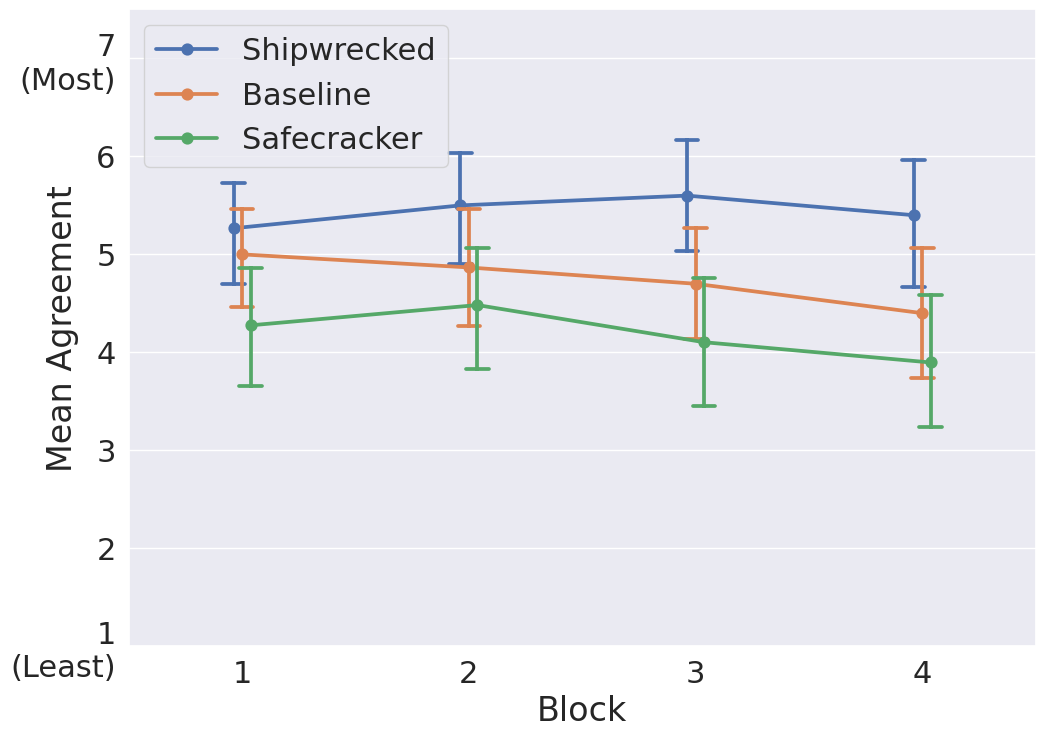

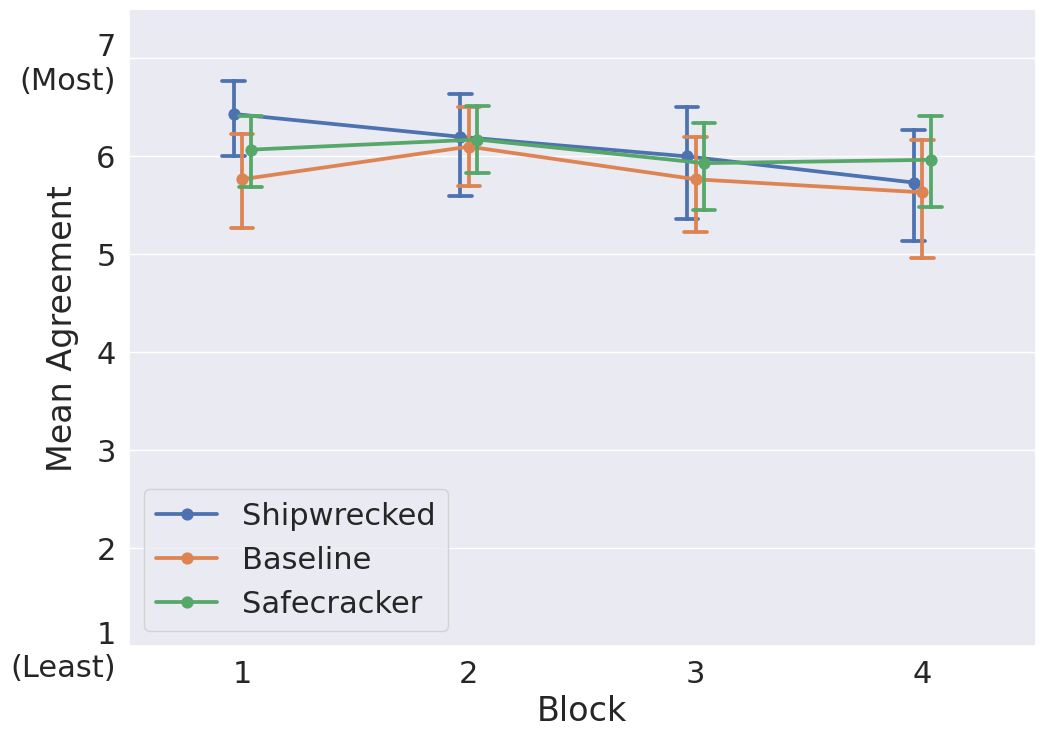

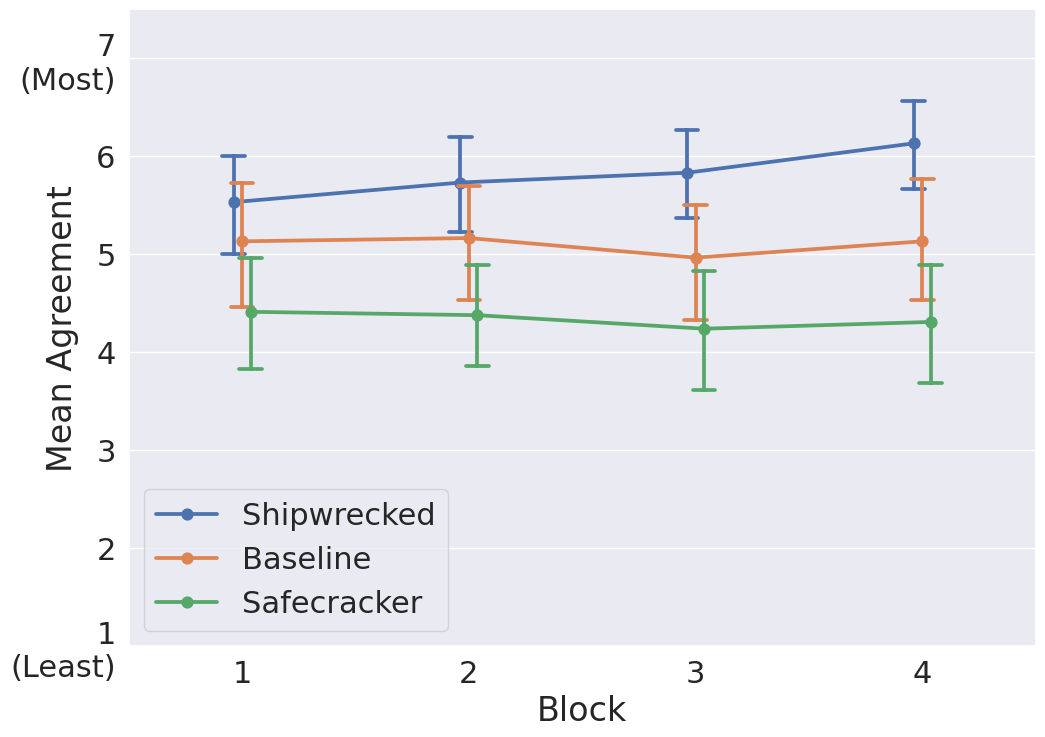

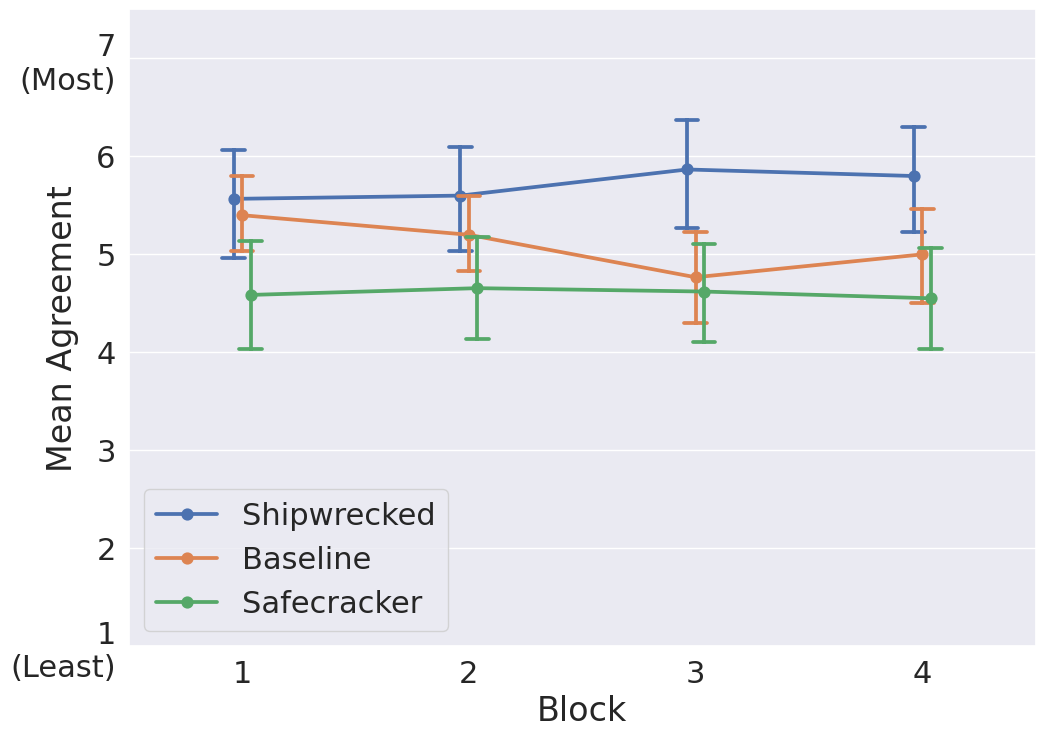

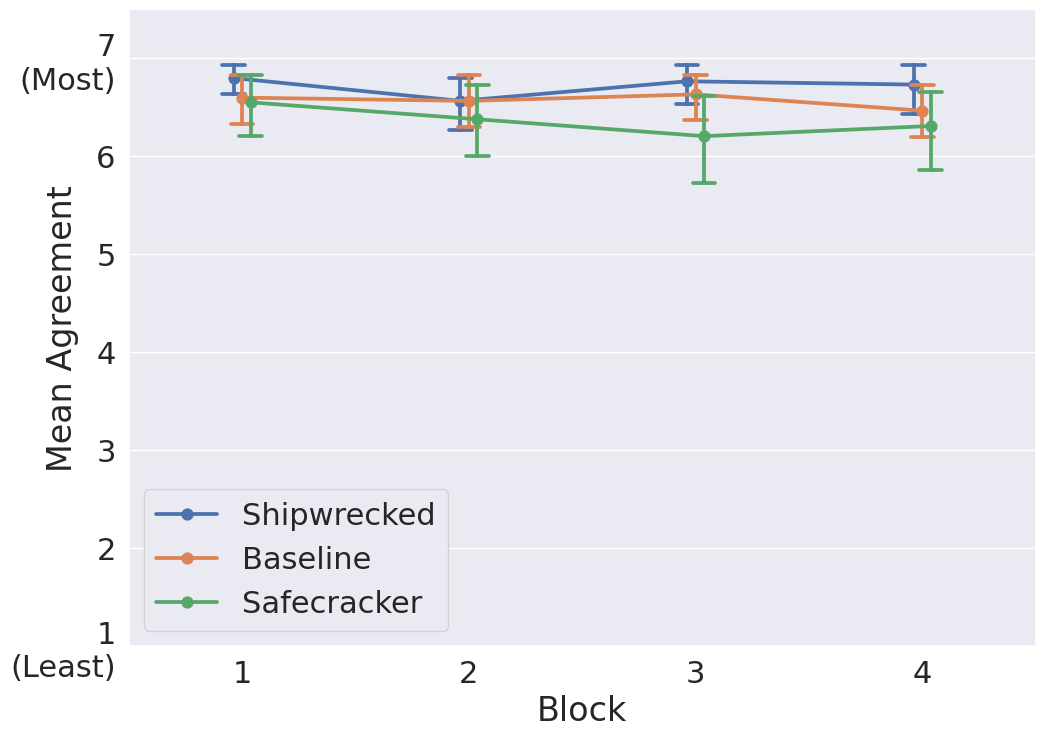

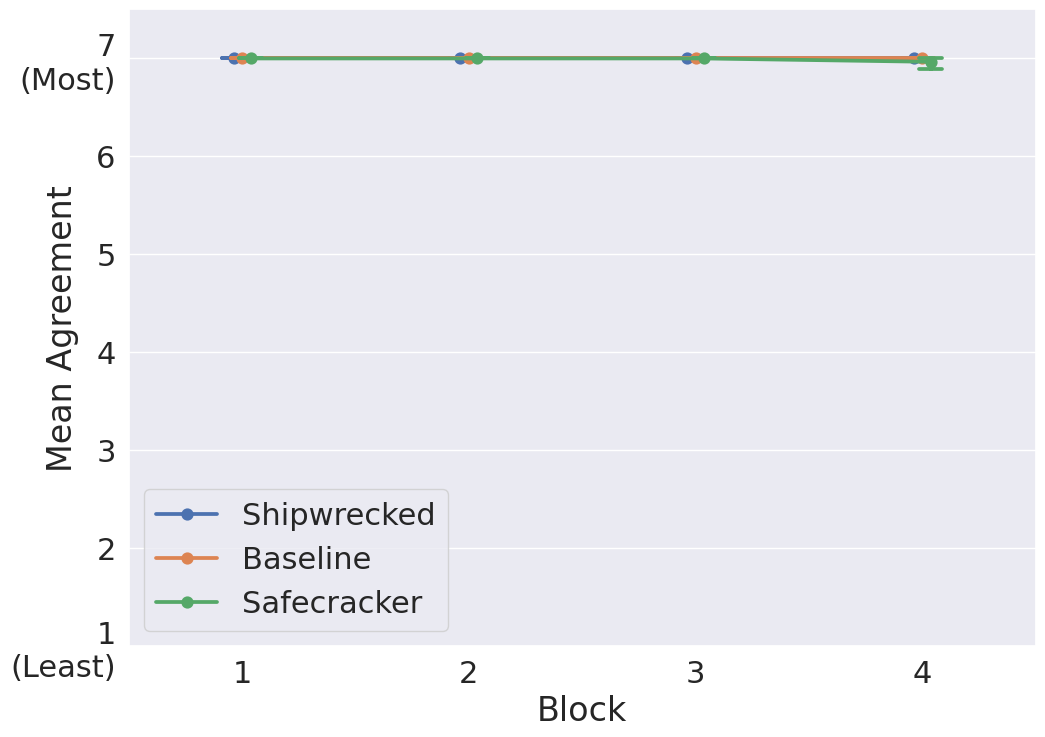

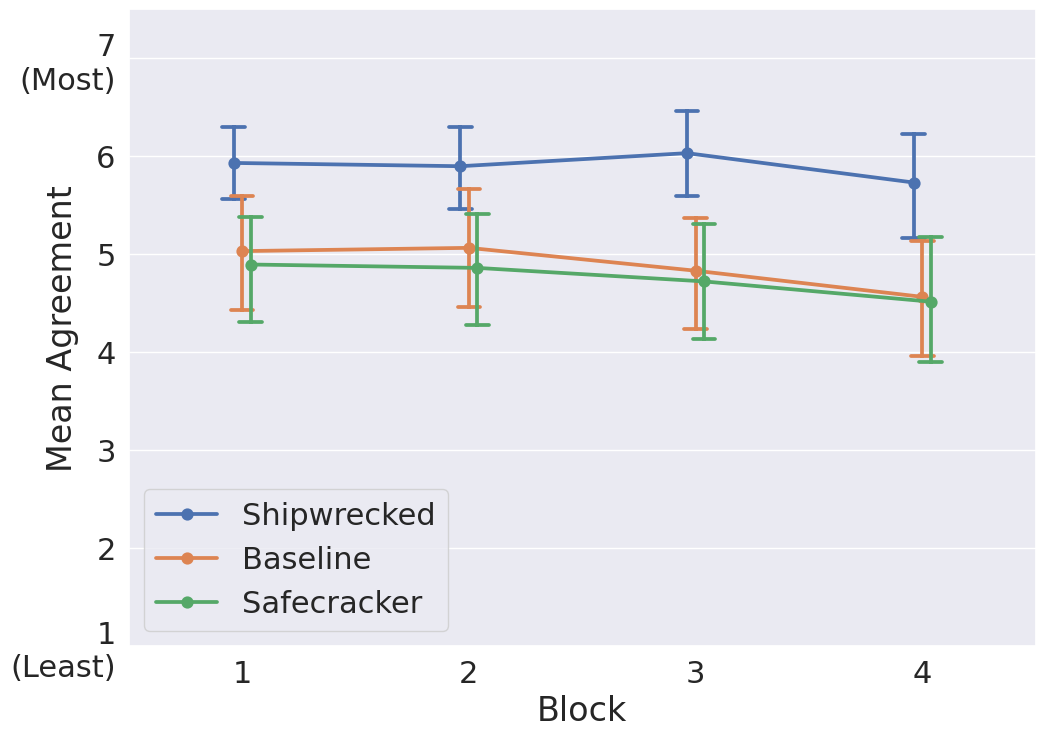

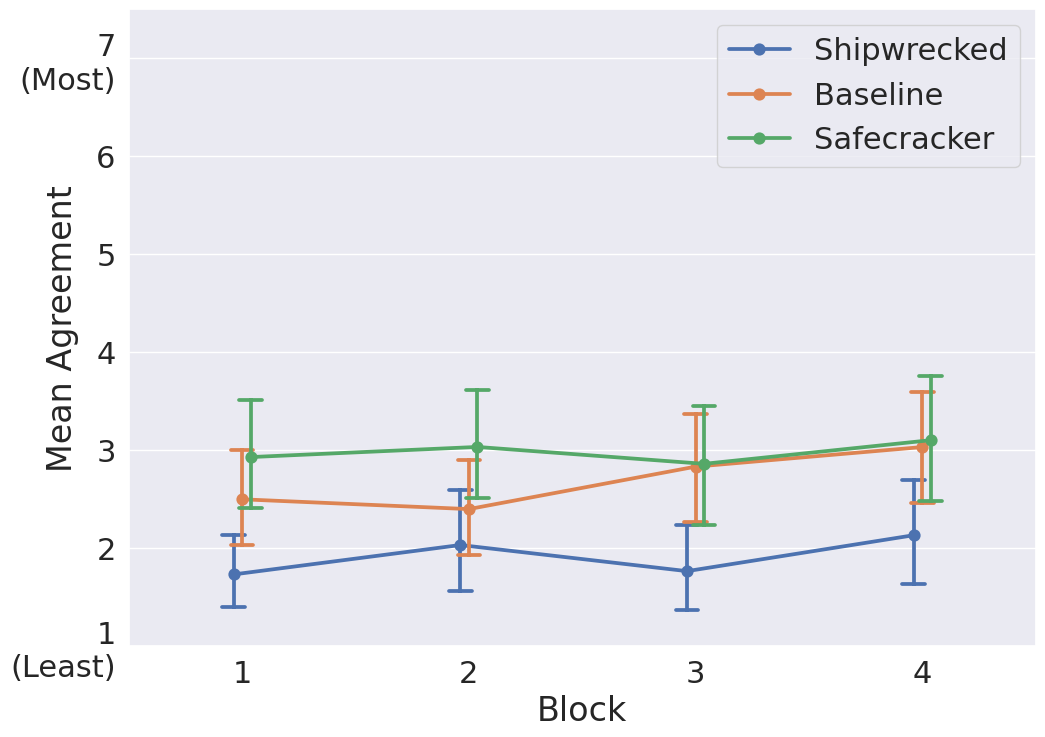

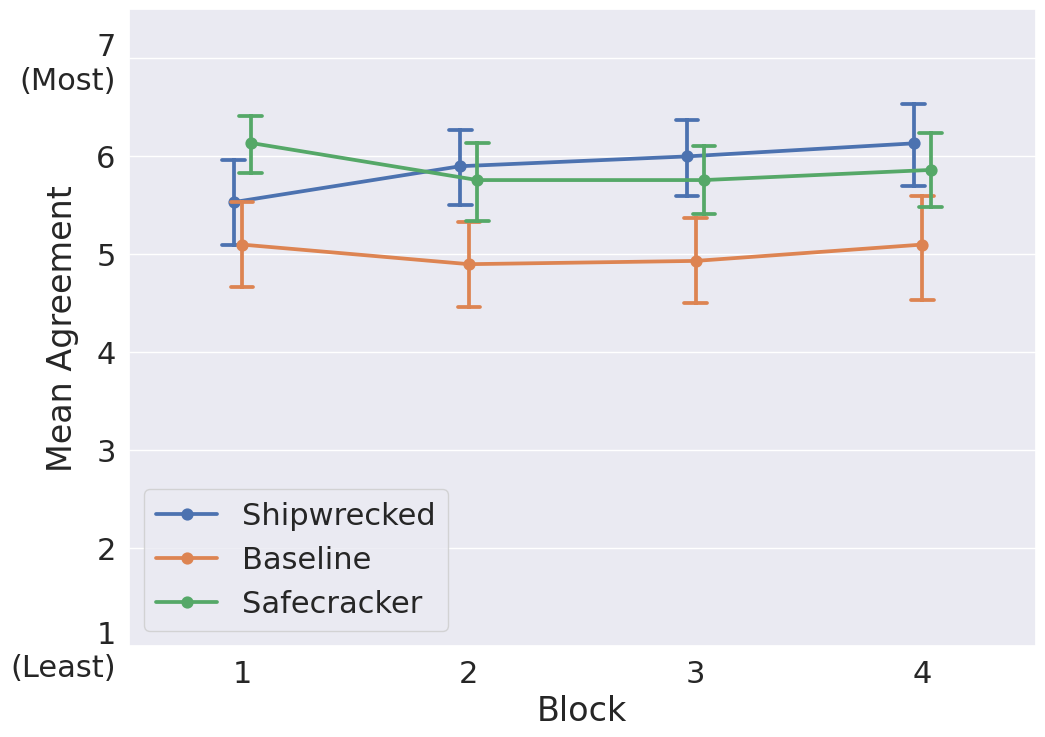

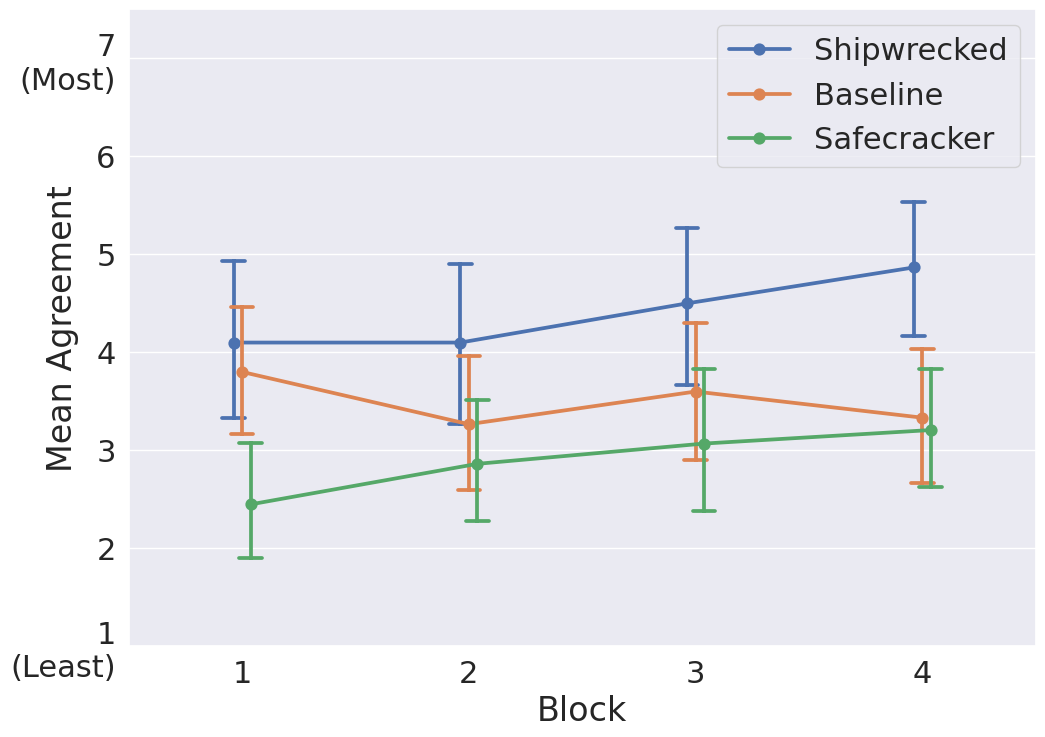

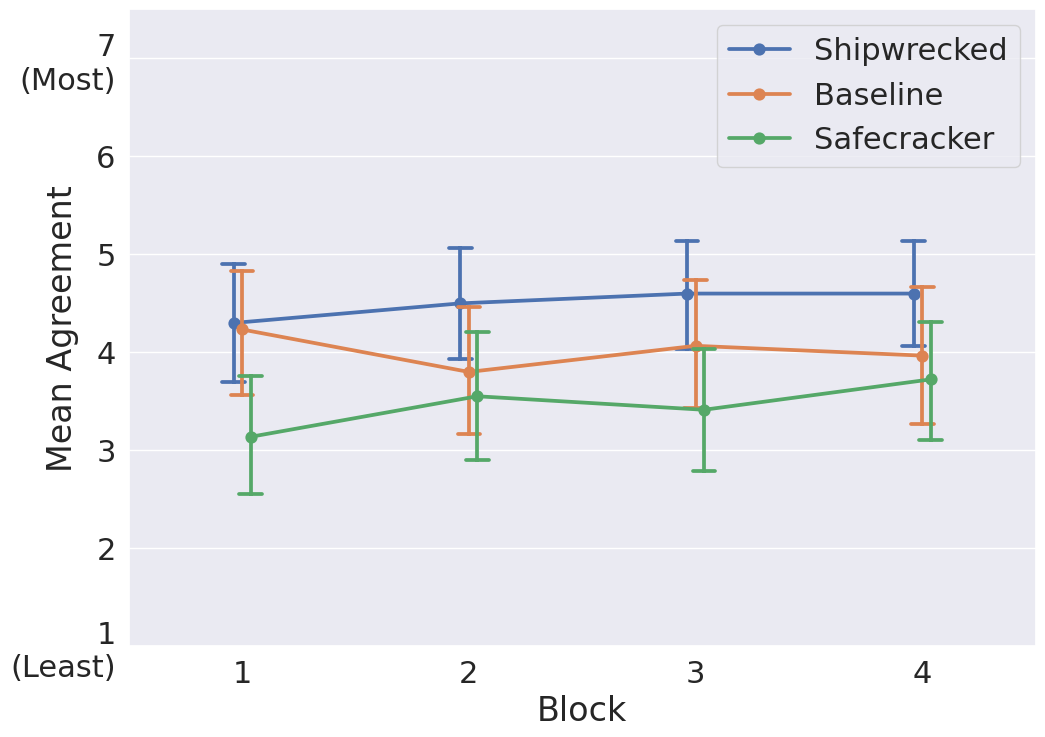

In [ ]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/")

for likert_data in FSS_SURVEY_STATEMENTS:
    plt.figure()
    plt.ylim(1, 7.5)
    sns.pointplot(data=SURVEY, x='breakpoint', y=likert_data, hue='condition', capsize=0.1, dodge=True, errorbar=('ci', 95)).set(xlabel="Block")
    plt.yticks([1, 2, 3, 4, 5, 6, 7], ['1\n(Least)', '2', '3', '4', '5', '6', '7\n(Most)'])
    plt.legend(title='')  
    plt.ylabel(ylabel= "Mean Agreement", labelpad=-50)
    plt.savefig(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/means/{likert_data}.png")

/tmp/ipykernel_45737/4050483539.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.pointplot(data=SURVEY, x='breakpoint', y=likert_data, hue='condition', dodge=True, ci=0, estimator=np.median).set(xlabel="Block", ylabel="Median Agreement")
/tmp/ipykernel_45737/4050483539.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.pointplot(data=SURVEY, x='breakpoint', y=likert_data, hue='condition', dodge=True, ci=0, estimator=np.median).set(xlabel="Block", ylabel="Median Agreement")
/tmp/ipykernel_45737/4050483539.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.pointplot(data=SURVEY, x='breakpoint', y=likert_data, hue='condition', dodge=True, ci=0, estimator=np.median).set(xlabel="Block", ylabel="Median Agreement")
/tmp/ipykernel_45737/4050483539.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=

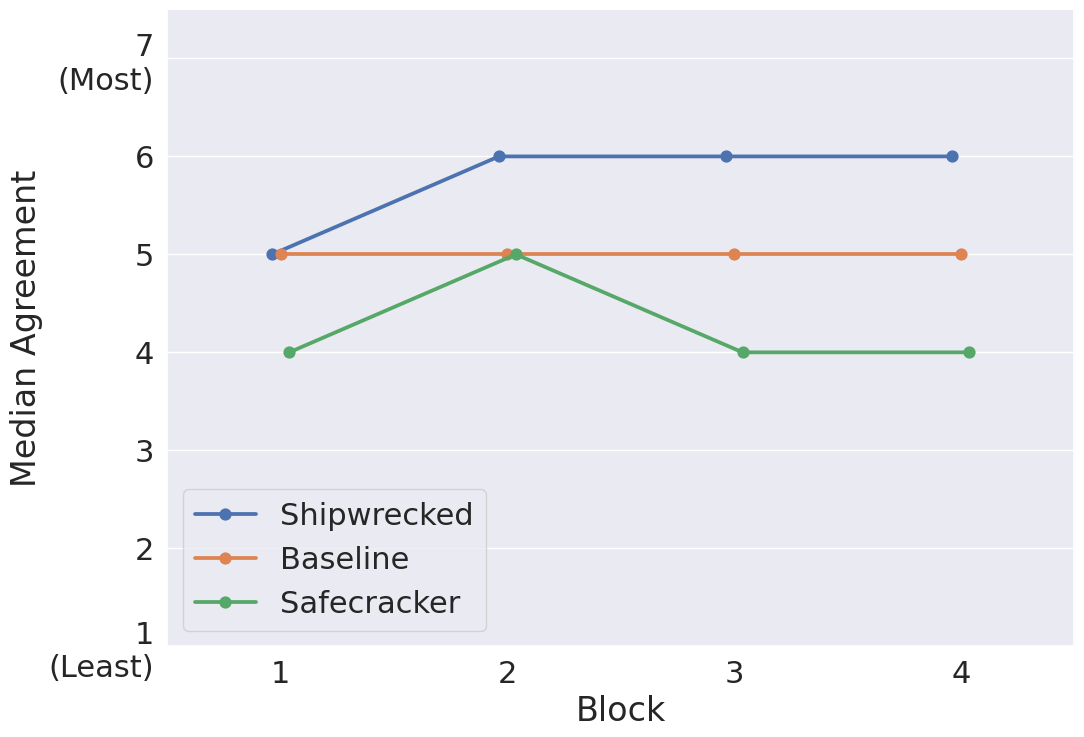

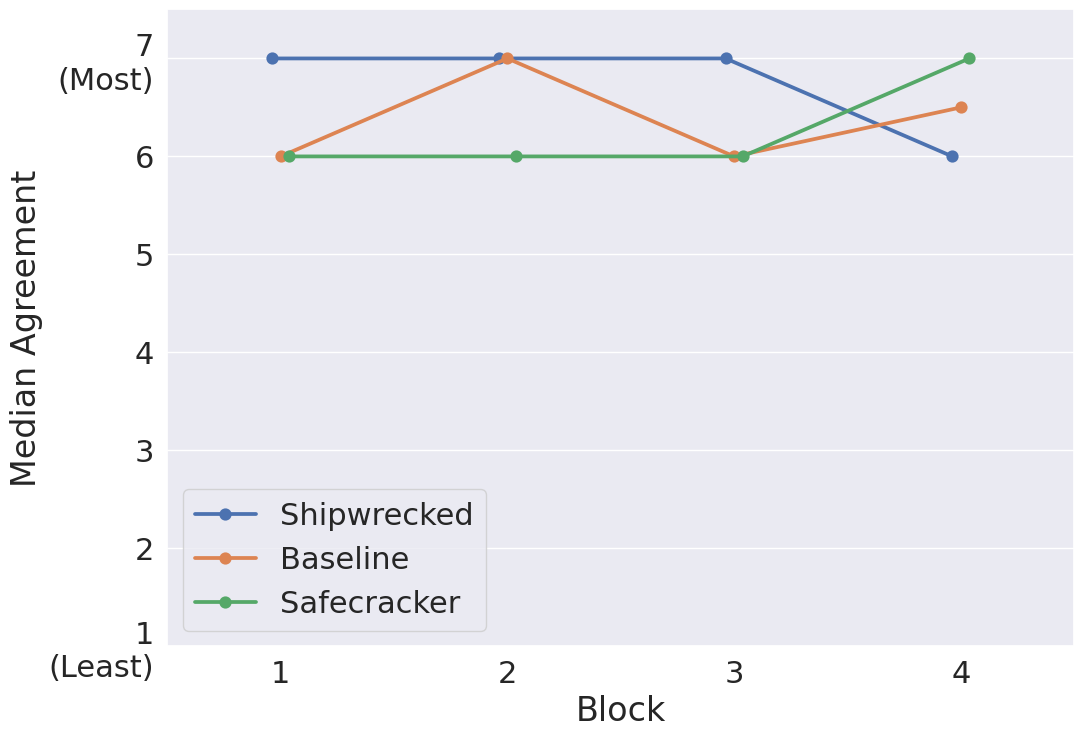

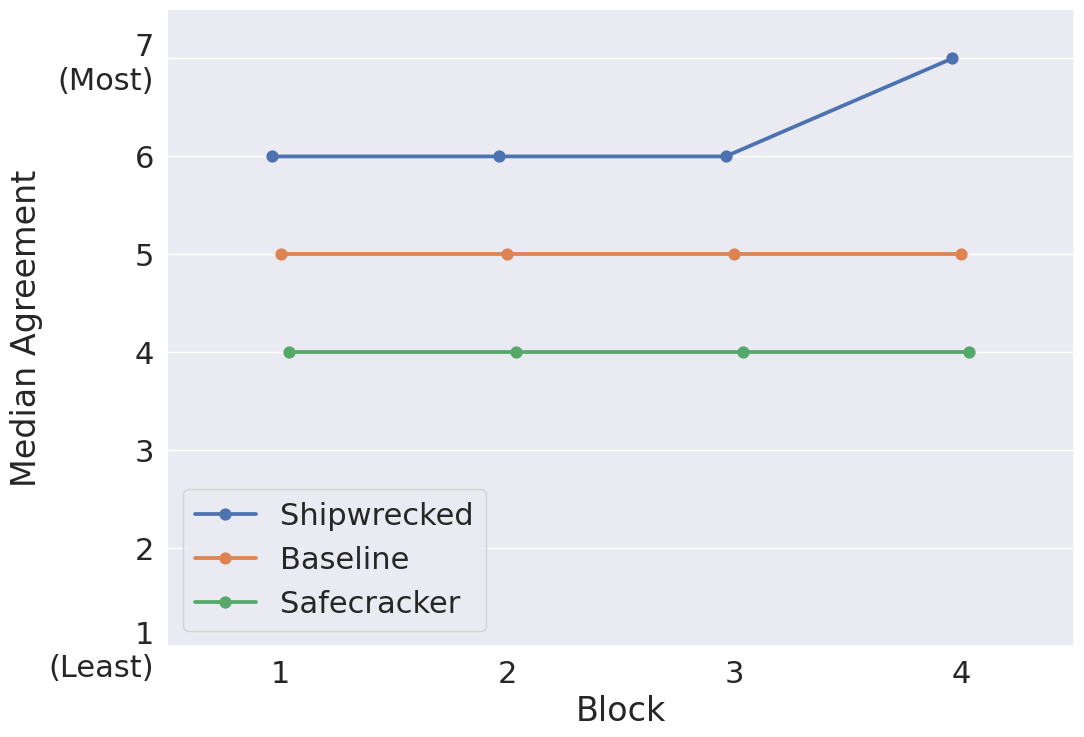

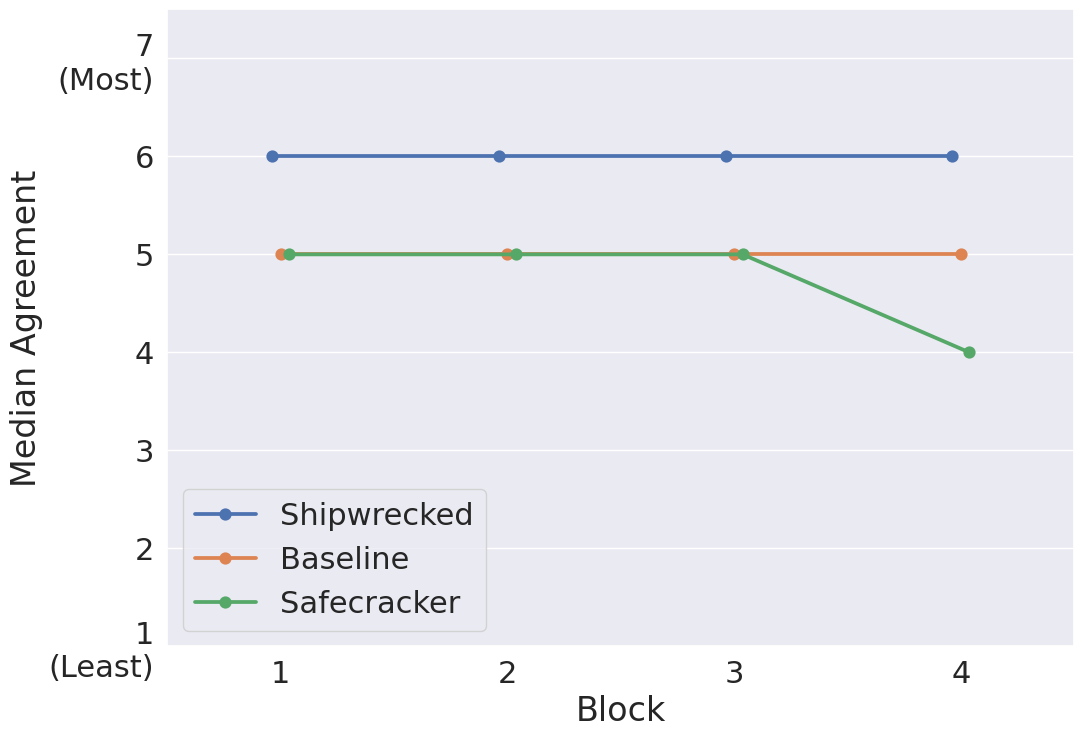

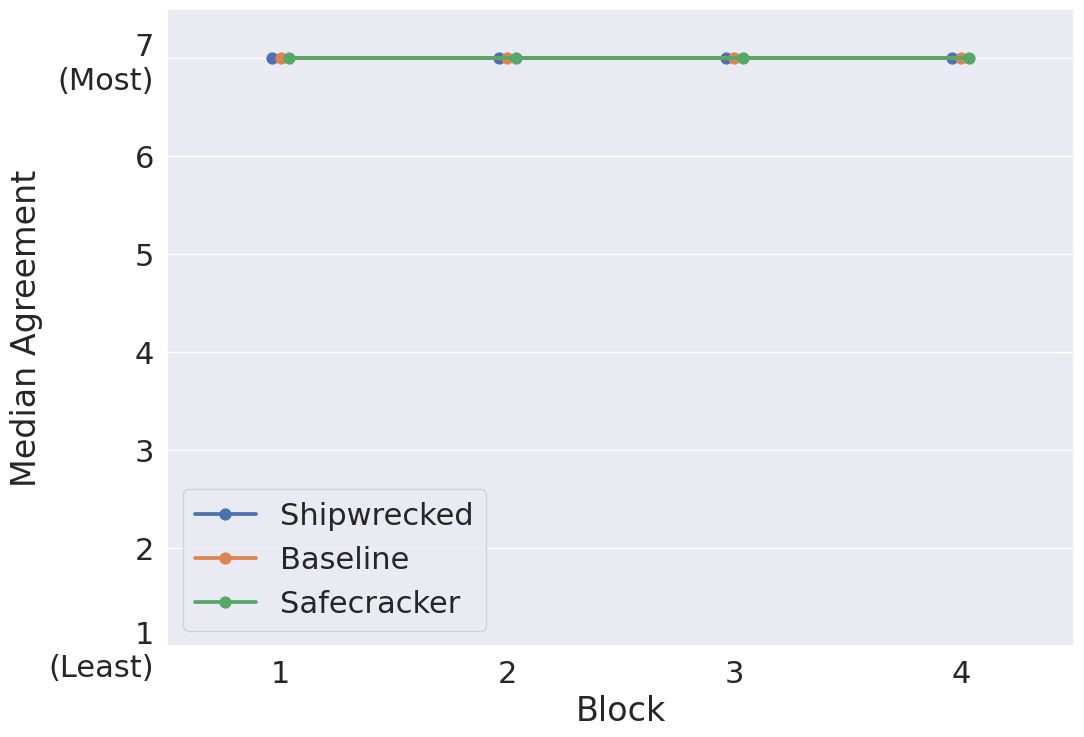

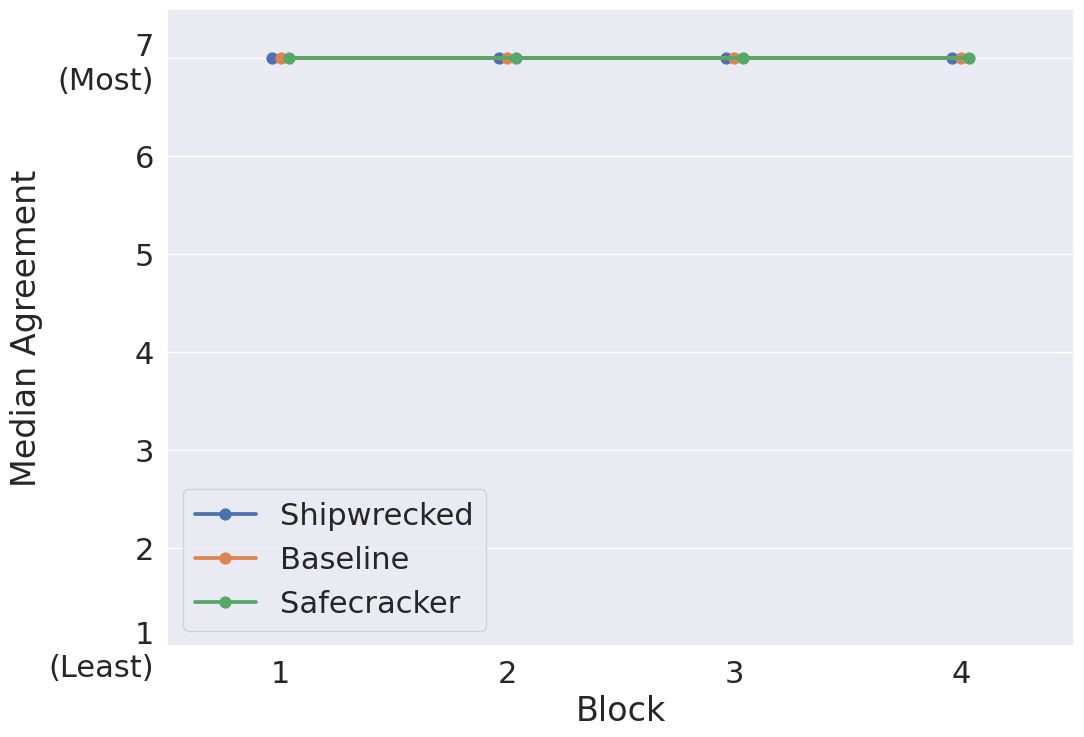

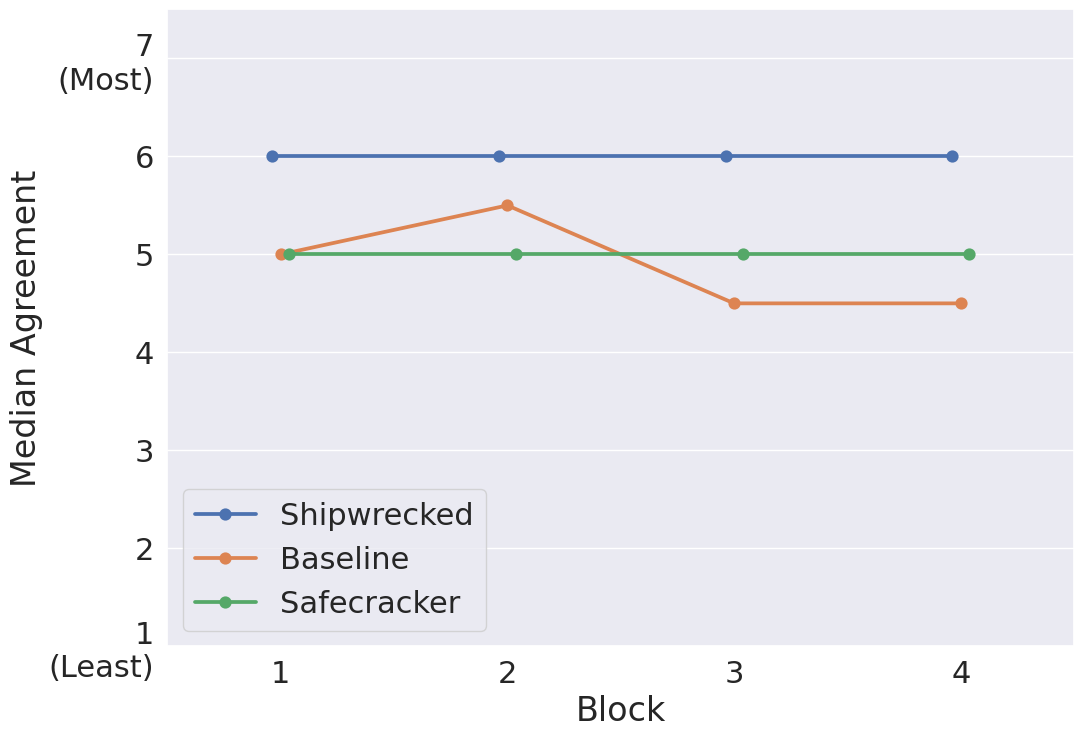

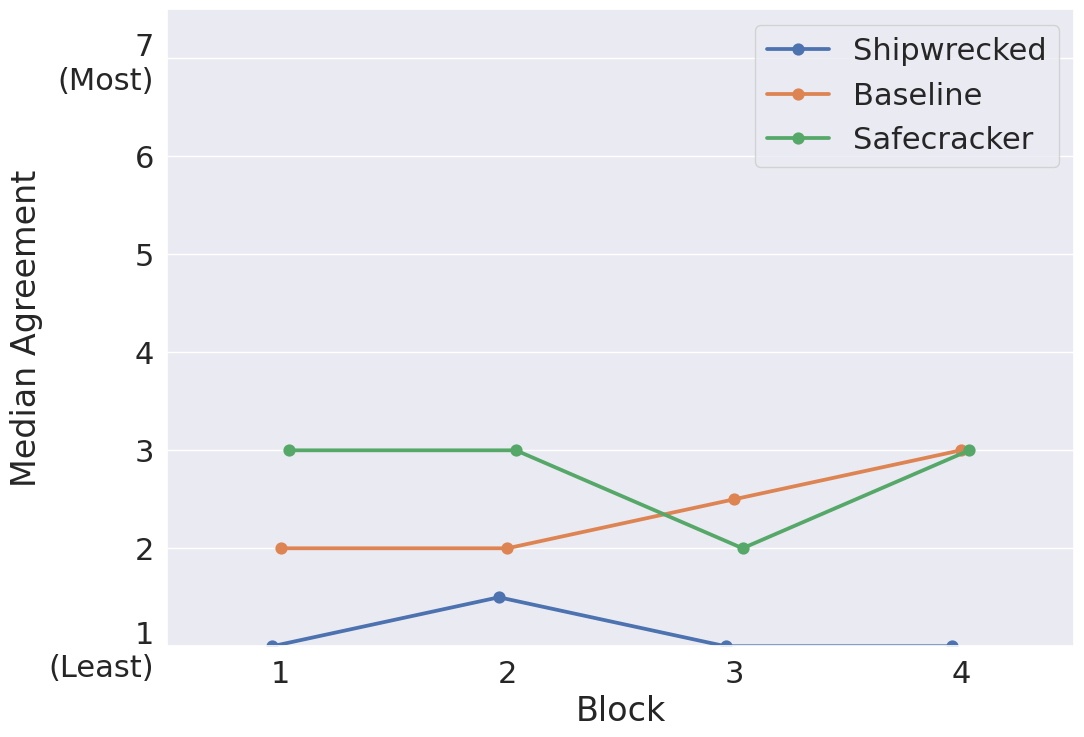

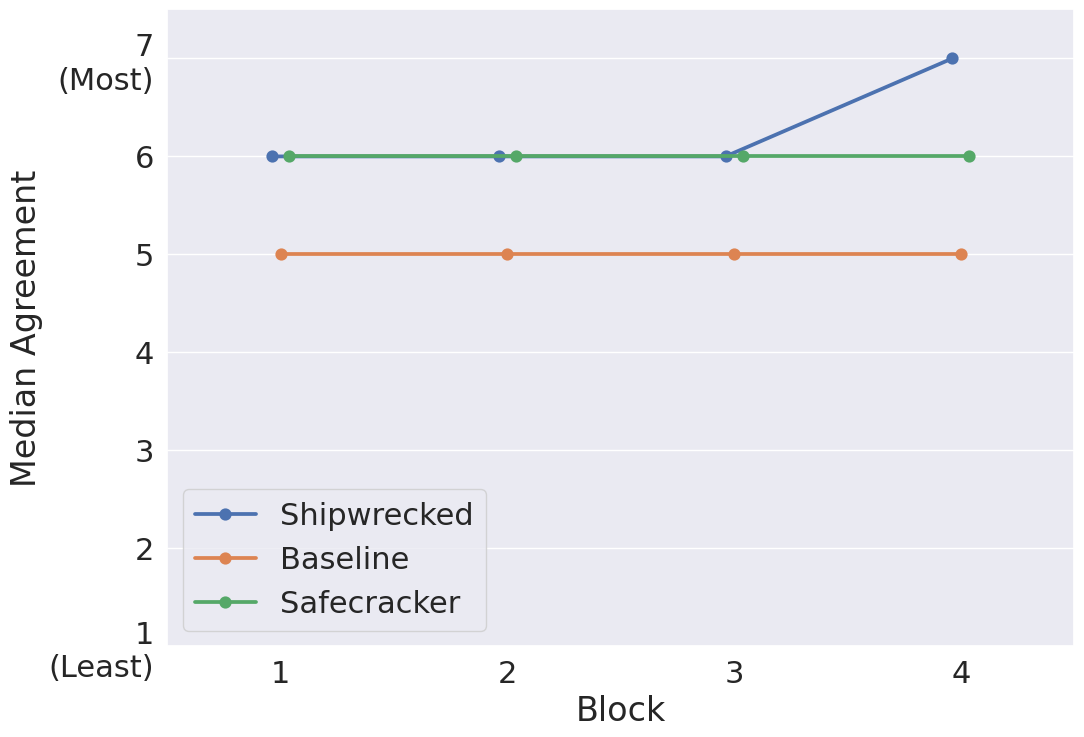

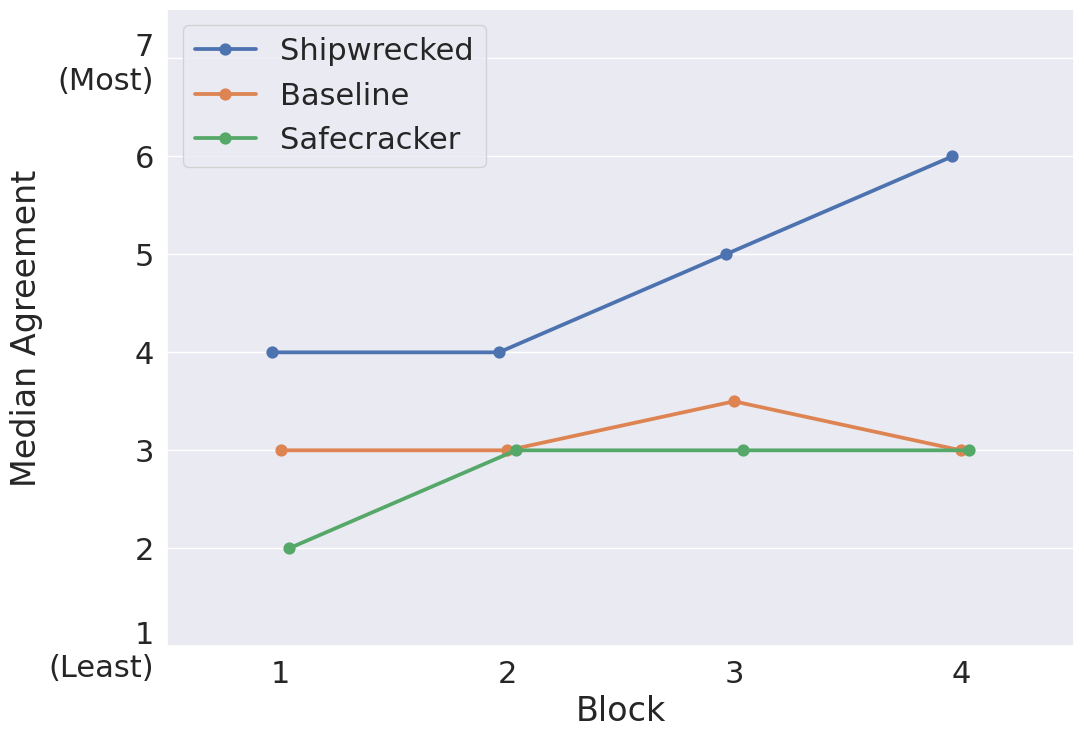

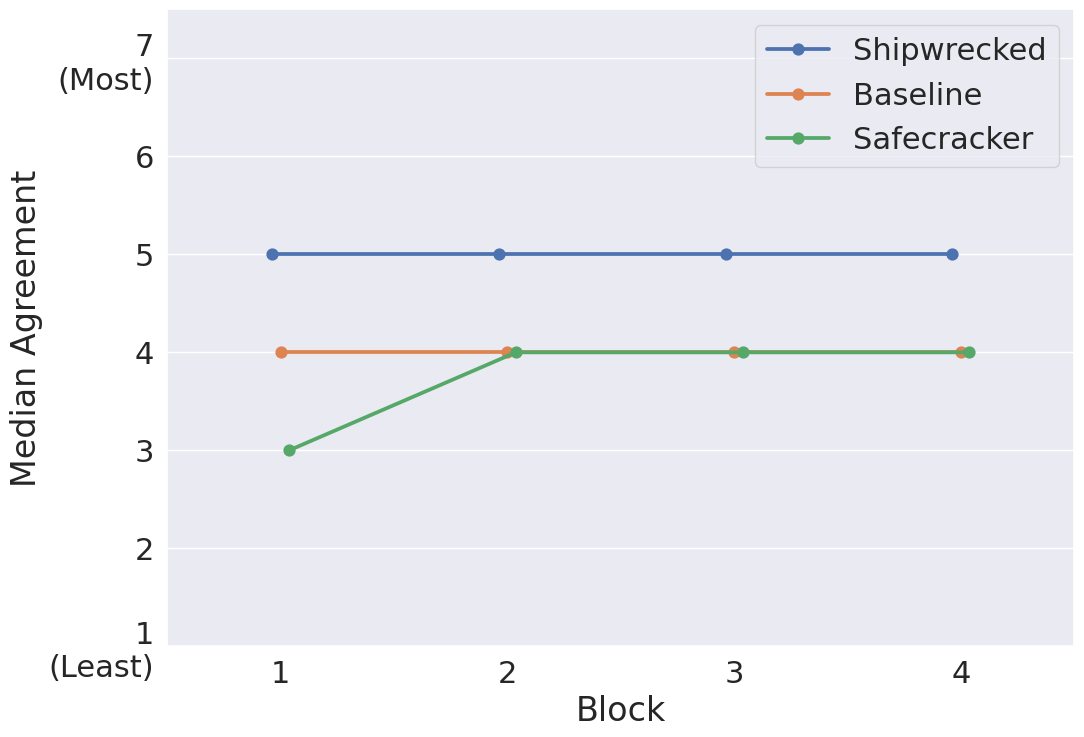

In [ ]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/")

for likert_data in FSS_SURVEY_STATEMENTS:
    plt.figure()
    plt.ylim(1, 7.5)
    sns.pointplot(data=SURVEY, x='breakpoint', y=likert_data, hue='condition', dodge=True, ci=0, estimator=np.median).set(xlabel="Block", ylabel="Median Agreement")
    plt.yticks([1, 2, 3, 4, 5, 6, 7], ['1\n(Least)', '2', '3', '4', '5', '6', '7\n(Most)'])
    plt.legend(title='')
    plt.savefig(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/medians/{likert_data}.png")

<h2>Trial Data</h2>

In [ ]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/trial_data/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/trial_data/")

In [ ]:
simon_trial_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'training']
simon_trial_data = simon_trial_data_filtered.sort_values(['participantID', 'timeSubmitted'])
# simon_trial_data['trial_order'] = simon_trial_data.groupby('participantID').cumcount() + 1
simon_trial_data['trial_was_repeated'] = simon_trial_data['errors'].apply(lambda x: 0 if x <3 else 1)
simon_trial_data['repeat_count'] = simon_trial_data.groupby(['participantID', 'gameDistributionIndex', 'targetID'])['trial_was_repeated'].transform('sum')
simon_trial_data['trial_order'] = simon_trial_data_filtered['gameDistributionIndex'] + 1

In [ ]:
searchlight_trial_data_filtered = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase'] == 'training']
searchlight_successful_trials = searchlight_trial_data_filtered
#searchlight_successful_trials = searchlight_trial_data_filtered[searchlight_trial_data_filtered['manhattan']==0]
#searchlight_successful_trials = searchlight_trial_data_filtered[searchlight_trial_data_filtered['errors']==0]
searchlight_successful_trials = searchlight_successful_trials.sort_values(['participantID', 'timeSubmitted'])
searchlight_successful_trials['trial_order'] = searchlight_successful_trials.groupby('participantID').cumcount() + 1
searchlight_successful_trials['block_order'] = searchlight_successful_trials['trial_order'].apply(lambda x: (x - 1) // 18 + 1)
searchlight_successful_trials['trial_was_repeated'] = searchlight_successful_trials['errors'].apply(lambda x: 0 if x <5 else 1)
searchlight_successful_trials['repeat_count'] = searchlight_successful_trials.groupby(['participantID', 'block', 'targetID'])['trial_was_repeated'].transform('sum')
searchlight_successful_trials['condition'] = "Shipwrecked"

no_game_trial_data_filtered = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase'] == 'training']
no_game_successful_trials = no_game_trial_data_filtered 
#no_game_successful_trials = no_game_trial_data_filtered[no_game_trial_data_filtered['manhattan']==0]
#no_game_successful_trials = no_game_trial_data_filtered[no_game_trial_data_filtered['errors']==0]
no_game_successful_trials = no_game_successful_trials.sort_values(['participantID', 'timeSubmitted'])
no_game_successful_trials['trial_order'] = no_game_successful_trials.groupby('participantID').cumcount() + 1
no_game_successful_trials['block_order'] = no_game_successful_trials['trial_order'].apply(lambda x: (x - 1) // 18 + 1)
no_game_successful_trials['trial_was_repeated'] = no_game_successful_trials['errors'].apply(lambda x: 0 if x <5 else 1)
no_game_successful_trials['repeat_count'] = no_game_successful_trials.groupby(['participantID', 'block', 'targetID'])['trial_was_repeated'].transform('sum')

no_game_successful_trials['condition'] = "Baseline"

In [ ]:
no_game_successful_trials.columns


Index(['trialLogID', 'participantID', 'timeSubmitted', 'pid', 'condition',
       'prolificID', 'day', 'phase', 'block', 'trial', 'targetID', 'distEdge',
       'distLand', 'nearLandmark', 'isLandmark', 'targetX', 'targetY',
       'clickX', 'clickY', 'euclidean', 'manhattan', 'ct', 'underGuide',
       'errors', 'movement', 'confidence', 'errorObjects', 'sequence',
       'cumulativeManhattanDistance', 'cumulativeEuclideanDistance',
       'manhattanDistanceLog', 'euclideanDistanceLog', 'treatment',
       'trial_order', 'block_order', 'trial_was_repeated', 'repeat_count'],
      dtype='str')

In [ ]:
import json
trials_time_per_target = []

def get_target_id_from_simon_sequence(row):
    if row['treatment'] == 'simon':
        # if int(row['errorInTrial']) == 0:
            sequence_list = row['sequence'].split(',')
            ct_list = row['ctForTargetInOrder'].split(',')
            # FIXME: move to function, also this was a terrible way to save the errors! 
            error_array = []
            if row['targetErrorArray'] is not None and row['targetErrorArray'] != '-1':
                try:
                    error_array_str = row['targetErrorArray'].split('},{')
                    for i, item in enumerate(error_array_str):
                        if i == 0:
                            item = item + '}'
                        elif i == len(error_array_str) - 1:
                            item = '{' + item
                        else:
                            item = '{' + item + '}'
                        error_array.append(json.loads(item))
                except:
                    print("Passing due to error in errorArray parsing")
                    pass
            for i in range(0, len(ct_list)):
                try:
                # if error_array[i]["correct"] ==1 and error_array[i]["num_errors"] ==0:
                #if error_array[i]["num_errors"] ==0:
                    trials_time_per_target.append({
                        'num_errors': error_array[i]["num_errors"],
                        'condition': 'Safecracker',
                        'targetID': str(sequence_list[i]),
                        'ct': ct_list[i],
                        'trial': int(row['trial']),  
                        'block': int(row['gameDistributionIndex'] + 1),
                        'trial_order': int(row['trial_order']),
                        'participantID': int(row['participantID']), 
                        'timeSubmitted': row['timeSubmitted'],
                        'locationInSequence': (i + 1),
                        'distanceFromEndOfSequence': int(len(sequence_list) - (i+1)),
                        'sequence' : row['sequence'],
                        'exposure_count': simon_exposures_counter(len(sequence_list), sequence_list[i], int(row['gameDistributionIndex'])),
                        'prolificID': str(row['prolificID'])
                    })
                except:
                     print("THE SEQUENCE ARRAY", sequence_list)
                     print("COMPLETION TIMES", ct_list)
                     print("ERROR ARRAY", error_array)
    else:
            trials_time_per_target.append({
                'num_errors': row['errors'],
                'condition': row['condition'],
                'num_errors': row['errorInTrial'],
                'targetID': str(row['targetID']),
                'ct': row['ct'],
                'block': int(row['block_order']), 
                'timeSubmitted': row['timeSubmitted'],
                'participantID': int(row['participantID']),
                'exposure_count':  baseline_exposures_counter(int(row['block']), int(row['trial']), str(row['targetID'])),
                'prolificID': str(row['prolificID'])
            })
    return row

In [ ]:
trial_data = pd.concat([searchlight_successful_trials, no_game_successful_trials], ignore_index=True)
simon_trial_data['condition'] = 'Safecracker'
trial_data = pd.concat([trial_data, simon_trial_data], ignore_index=True)

trial_data.apply(lambda row: get_target_id_from_simon_sequence(row), axis=1)

targets_time_per_click = pd.DataFrame(trials_time_per_target)    



In [ ]:
targets_time_per_click_simon = targets_time_per_click[targets_time_per_click['condition']=="Safecracker"]
targets_time_per_click_simon.shape

(2309, 14)

In [ ]:
targets_time_per_click_searchlight = targets_time_per_click[targets_time_per_click['condition']=="Shipwrecked"]
targets_time_per_click_searchlight.shape

(2160, 14)

In [ ]:
targets_time_per_click_baseline = targets_time_per_click[targets_time_per_click['condition']=="Baseline"]
targets_time_per_click_baseline.shape

(2159, 14)

In [ ]:
targets_time_per_click_= targets_time_per_click[targets_time_per_click['ct'] != '']


In [ ]:
targets_time_per_click['ct'] = targets_time_per_click['ct'].apply(lambda x: 0 if x=='' else x)
targets_time_per_click['ct'] = targets_time_per_click['ct'].astype(float)

In [ ]:
# Process data for each condition and breakpoint
conditions = targets_time_per_click['condition'].unique()
blocks = targets_time_per_click['block'].unique()

for condition in conditions:
    for block in blocks:
        # Filter data for current condition and breakpoint
        mask = (targets_time_per_click['condition'] == condition) & (targets_time_per_click['block'] == block)
        subset = targets_time_per_click[mask]
        
        print(f"The size of {condition} at block {block}")
        print(subset.shape)

        # Calculate mean and standard deviation for ct
        ct_mean = subset['ct'].mean()
        ct_std = subset['ct'].std()
        
        # Remove rows where ct is 3 or more standard deviations outside the mean
        outlier_mask = np.abs(subset['ct'] - ct_mean) >= 3 * ct_std
        print(f"The following will be dropped from {condition} at block {block}.")
        # print(subset[outlier_mask].head())
        print(subset[outlier_mask].shape)
        targets_time_per_click = targets_time_per_click.drop(subset[outlier_mask].index)

The size of Shipwrecked at block 1
(540, 14)
The following will be dropped from Shipwrecked at block 1.
(13, 14)
The size of Shipwrecked at block 2
(540, 14)
The following will be dropped from Shipwrecked at block 2.
(10, 14)
The size of Shipwrecked at block 3
(540, 14)
The following will be dropped from Shipwrecked at block 3.
(9, 14)
The size of Shipwrecked at block 4
(540, 14)
The following will be dropped from Shipwrecked at block 4.
(11, 14)
The size of Baseline at block 1
(540, 14)
The following will be dropped from Baseline at block 1.
(13, 14)
The size of Baseline at block 2
(540, 14)
The following will be dropped from Baseline at block 2.
(9, 14)
The size of Baseline at block 3
(540, 14)
The following will be dropped from Baseline at block 3.
(6, 14)
The size of Baseline at block 4
(539, 14)
The following will be dropped from Baseline at block 4.
(7, 14)
The size of Safecracker at block 1
(637, 14)
The following will be dropped from Safecracker at block 1.
(8, 14)
The size of 

In [ ]:
# Process data for each condition and breakpoint
conditions = trial_data['condition'].unique()
blocks = trial_data['block'].unique()

for condition in conditions:
    for block in blocks:
        # Filter data for current condition and breakpoint
        mask = (trial_data['condition'] == condition) & (trial_data['block'] == block)
        subset = trial_data[mask]

        print(f"The size of {condition} at block {block}")
        print(subset.shape)
        
        # Calculate mean and standard deviation for ct
        ct_mean = subset['ct'].mean()
        ct_std = subset['ct'].std()
        
        # Remove rows where ct is 3 or more standard deviations outside the mean
        outlier_mask = np.abs(subset['ct'] - ct_mean) >= 3 * ct_std
        print(f"The following will be dropped from {condition} at block {block}.")
        print(subset[outlier_mask].shape)
        trial_data = trial_data.drop(subset[outlier_mask].index)

The size of Shipwrecked at block 1
(540, 42)
The following will be dropped from Shipwrecked at block 1.
(13, 42)
The size of Shipwrecked at block 2
(540, 42)
The following will be dropped from Shipwrecked at block 2.
(10, 42)
The size of Shipwrecked at block 3
(540, 42)
The following will be dropped from Shipwrecked at block 3.
(9, 42)
The size of Shipwrecked at block 4
(540, 42)
The following will be dropped from Shipwrecked at block 4.
(11, 42)
The size of Baseline at block 1
(540, 42)
The following will be dropped from Baseline at block 1.
(13, 42)
The size of Baseline at block 2
(539, 42)
The following will be dropped from Baseline at block 2.
(8, 42)
The size of Baseline at block 3
(540, 42)
The following will be dropped from Baseline at block 3.
(6, 42)
The size of Baseline at block 4
(540, 42)
The following will be dropped from Baseline at block 4.
(7, 42)
The size of Safecracker at block 1
(590, 42)
The following will be dropped from Safecracker at block 1.
(7, 42)
The size of 

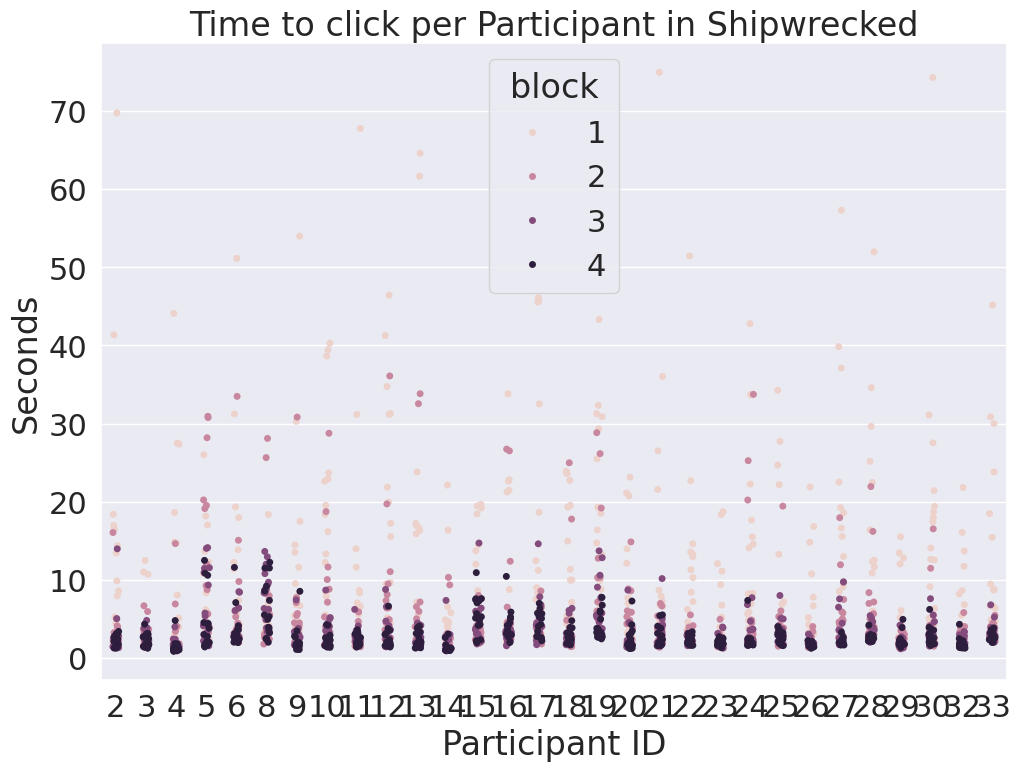

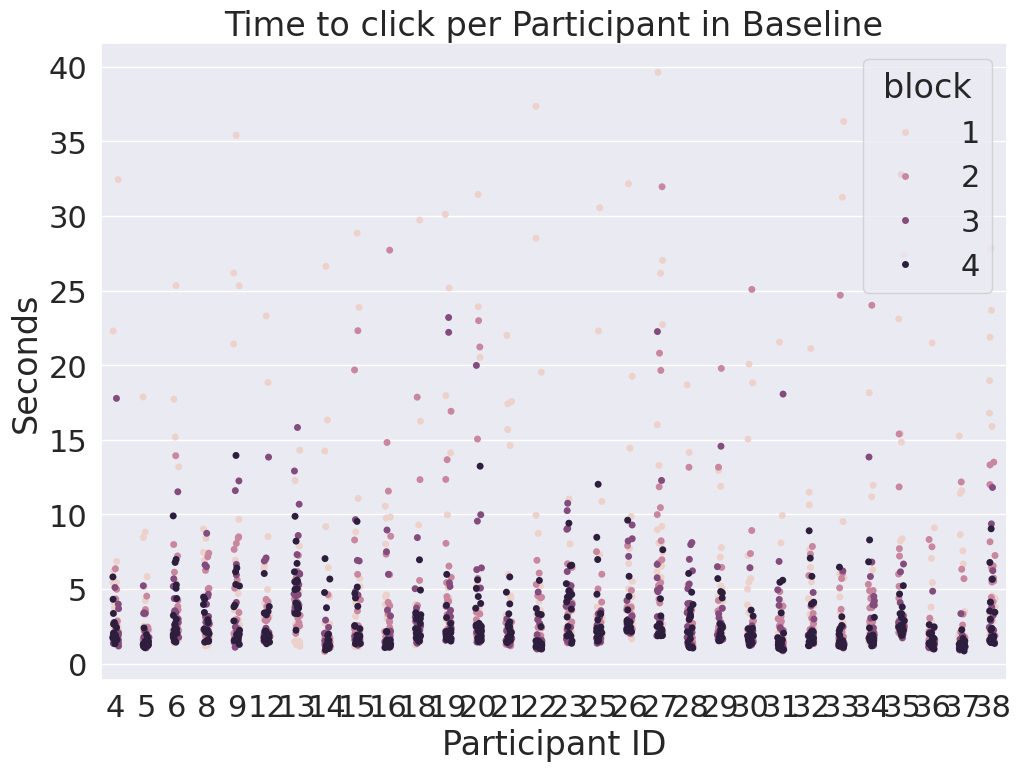

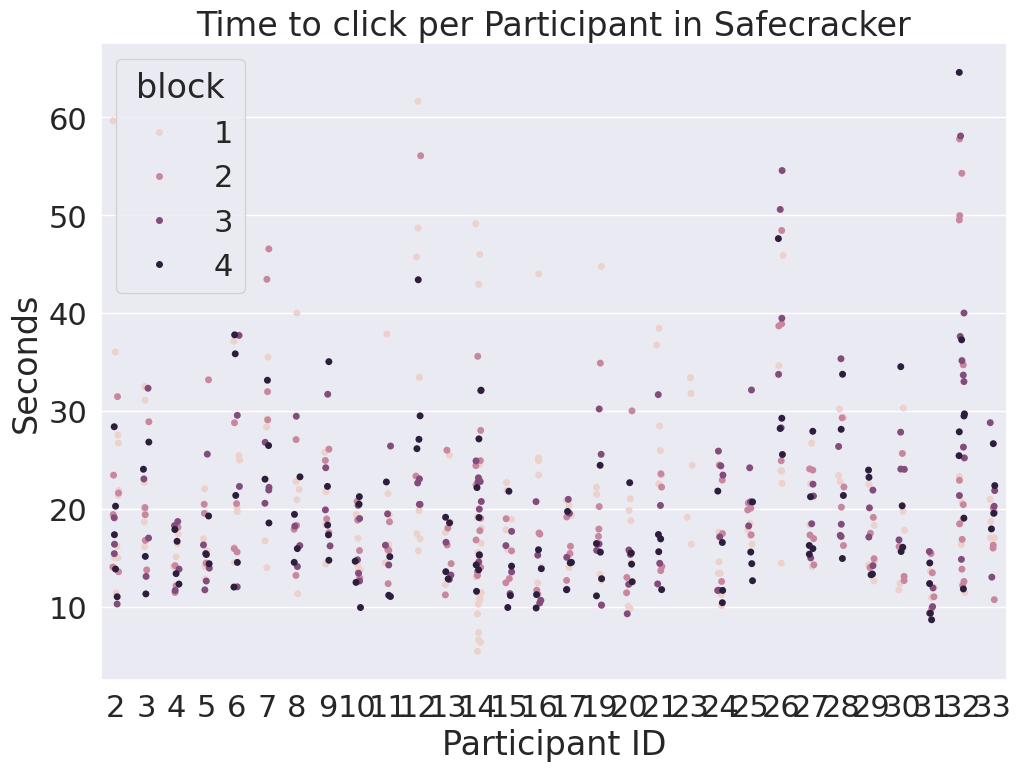

In [ ]:
conditions = trial_data['condition'].unique()
trial_data['participantID'] = trial_data['participantID'].astype('str')

for condition in conditions:
    condition_data = trial_data[trial_data['condition']==condition]
    if condition == 'Safecracker':
        condition_data['block'] = condition_data['gameDistributionIndex']+1
    plt.figure()
    sns.stripplot(data=condition_data, x="participantID", y="ct", hue='block', jitter=True).set(title=f"Time to click per Participant in {condition}", xlabel="Participant ID", ylabel="Seconds")
    plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/participant_time_to_click_pointplot_{condition}.png")


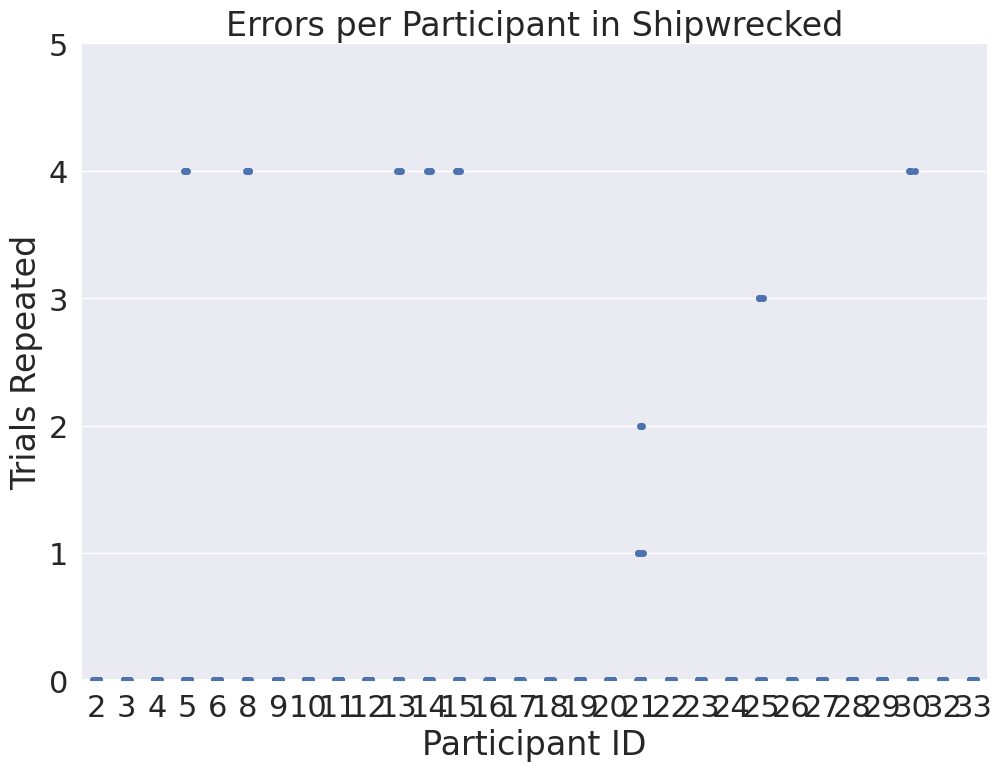

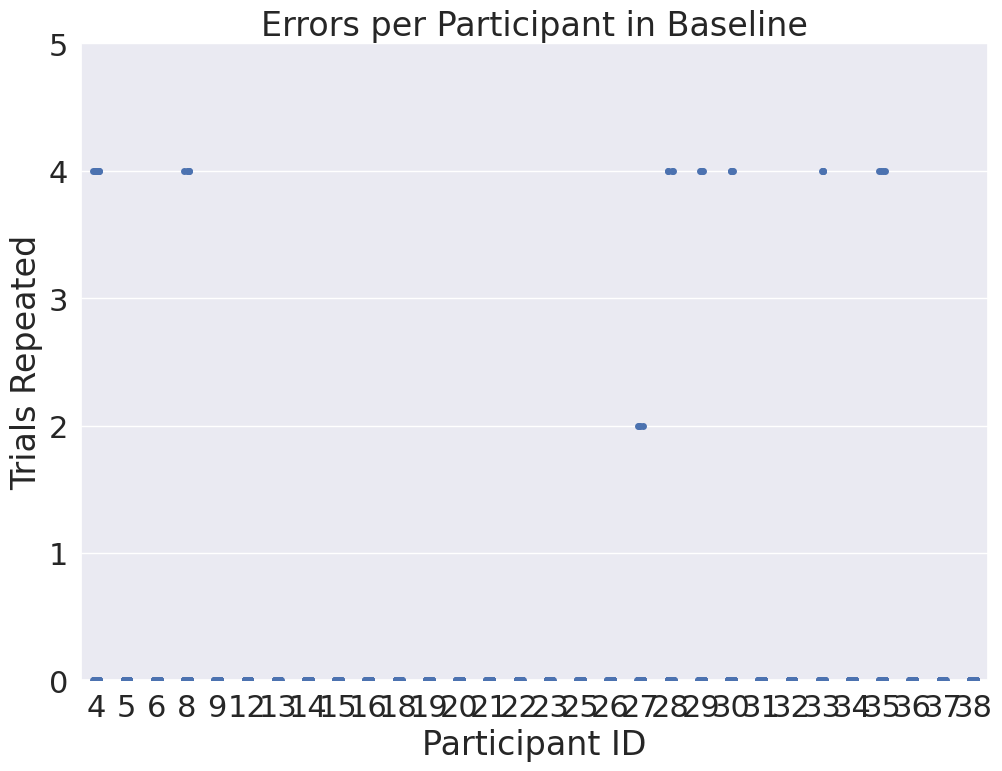

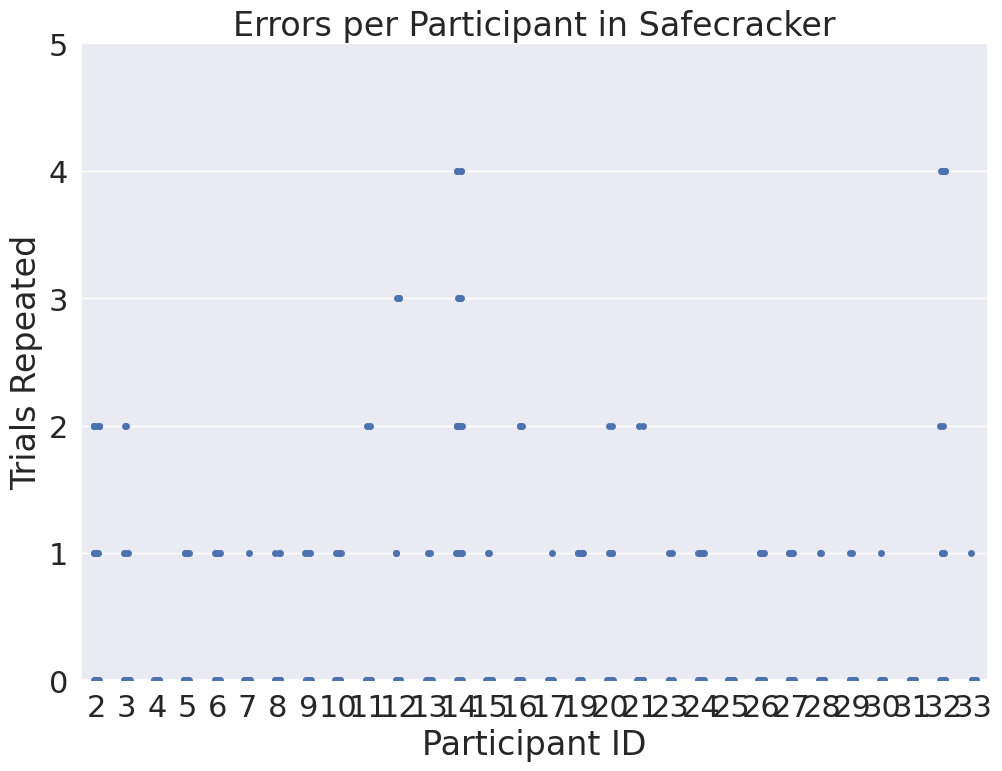

In [ ]:
for condition in conditions:
    condition_data = trial_data[trial_data['condition']==condition]
    plt.figure()
    plt.ylim(0, 5)
    sns.stripplot(data=condition_data, x="participantID", y="repeat_count", jitter=True).set(title=f"Errors per Participant in {condition}", xlabel="Participant ID", ylabel="Trials Repeated")
    plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/participant_errors_pointplot_{condition}.png")

/tmp/ipykernel_45737/1006656819.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=targets_time_per_click, x='targetID', hue='condition', y=f'ct', dodge=True, ci=95, capsize=0.1).set(xlabel="Target", ylabel="Seconds")


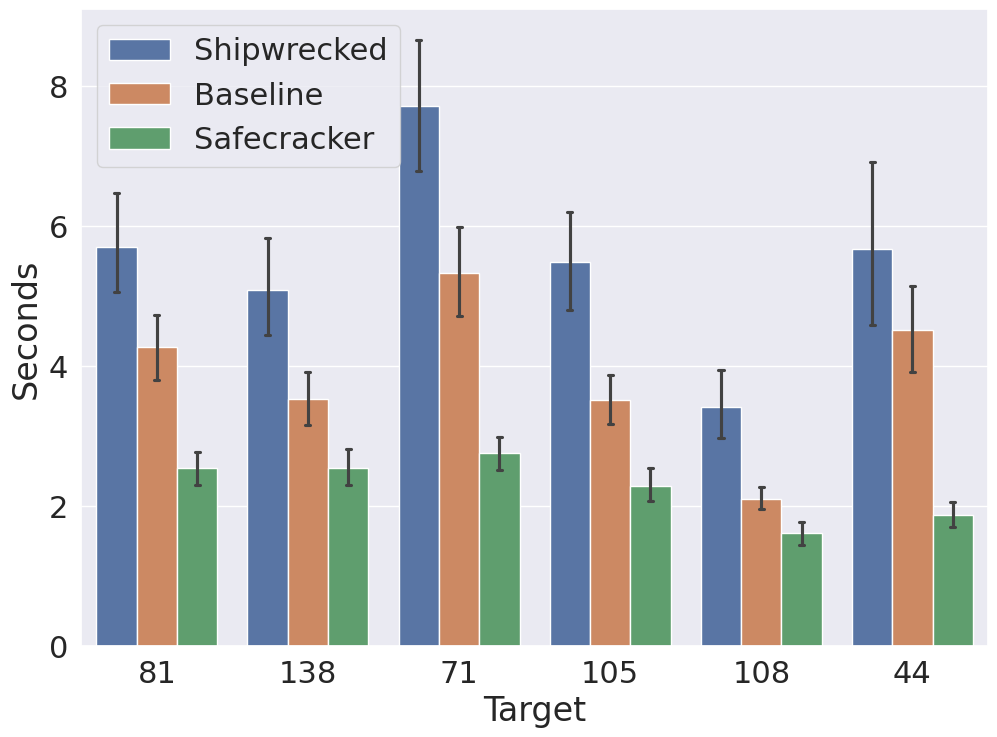

In [ ]:
plt.figure()
sns.barplot(data=targets_time_per_click, x='targetID', hue='condition', y=f'ct', dodge=True, ci=95, capsize=0.1).set(xlabel="Target", ylabel="Seconds")
plt.legend(title='')
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/mean_time_per_target_in_training.png")

In [ ]:
targets = targets_time_per_click['targetID'].unique()

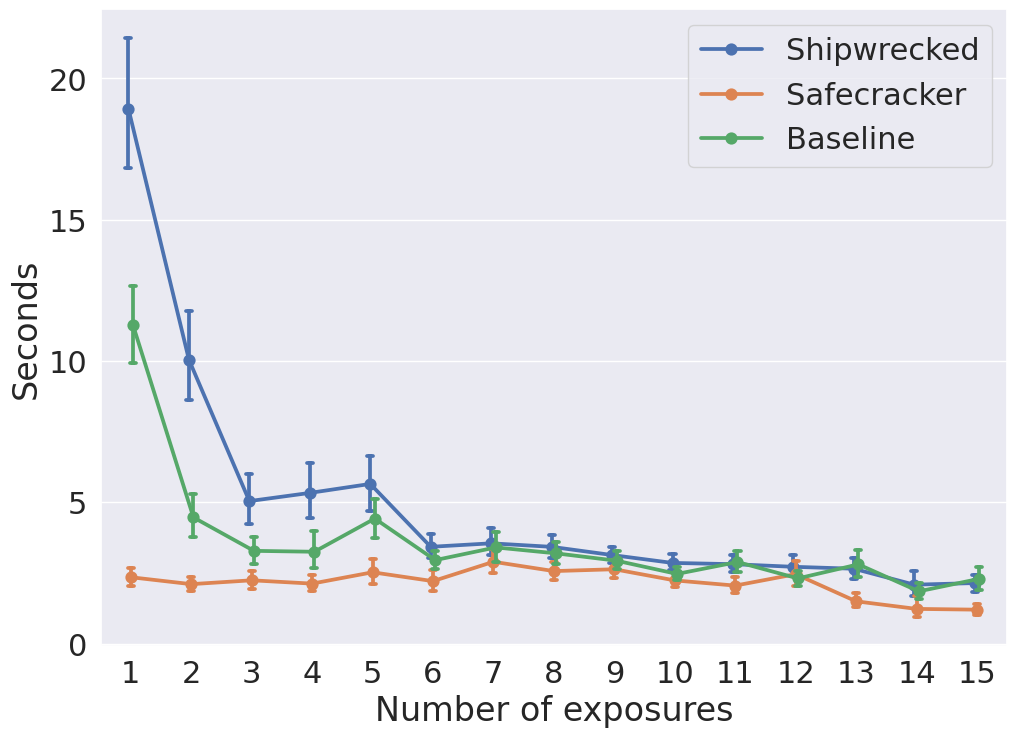

In [ ]:

learning_curve = targets_time_per_click.sort_values(['participantID', 'timeSubmitted'])
# learning_curve['target_order'] = learning_curve.apply(lambda row: int(row['exposure_count']) if row['condition']=='Simon' else int(row['block']), axis=1)
# FIXME: this needs to be figured out better
# learning_curve = learning_curve[learning_curve['target_order'] <=12]
plt.figure()
sns.pointplot(data=learning_curve, x='exposure_count', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95), capsize=0.1).set(xlabel="Number of exposures", ylabel="Seconds")
plt.legend(title='')
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/learning_curve_per_exposure_all_targets.png")

In [ ]:


targets_time_per_click.to_csv(f"./data/for-analysis/targets_time_per_click.csv")

for target in targets:
    target_data = targets_time_per_click[targets_time_per_click['targetID'] == target]
    target_data_ordered = target_data.sort_values(['participantID', 'timeSubmitted'])


    # target_data_ordered['target_order'] = target_data_ordered.apply(lambda row: int(row['exposure_count']) if row['condition']=='Simon' else int(row['block']), axis=1)
    plt.figure()
    sns.pointplot(data=target_data_ordered, x='exposure_count', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95), capsize=0.1).set(xlabel="Number of exposures", ylabel="Seconds")
    plt.legend(title='')
    plt.ylim(0, 40)
    plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/learning_curve_per_exposure_target_{str(target)}.png")

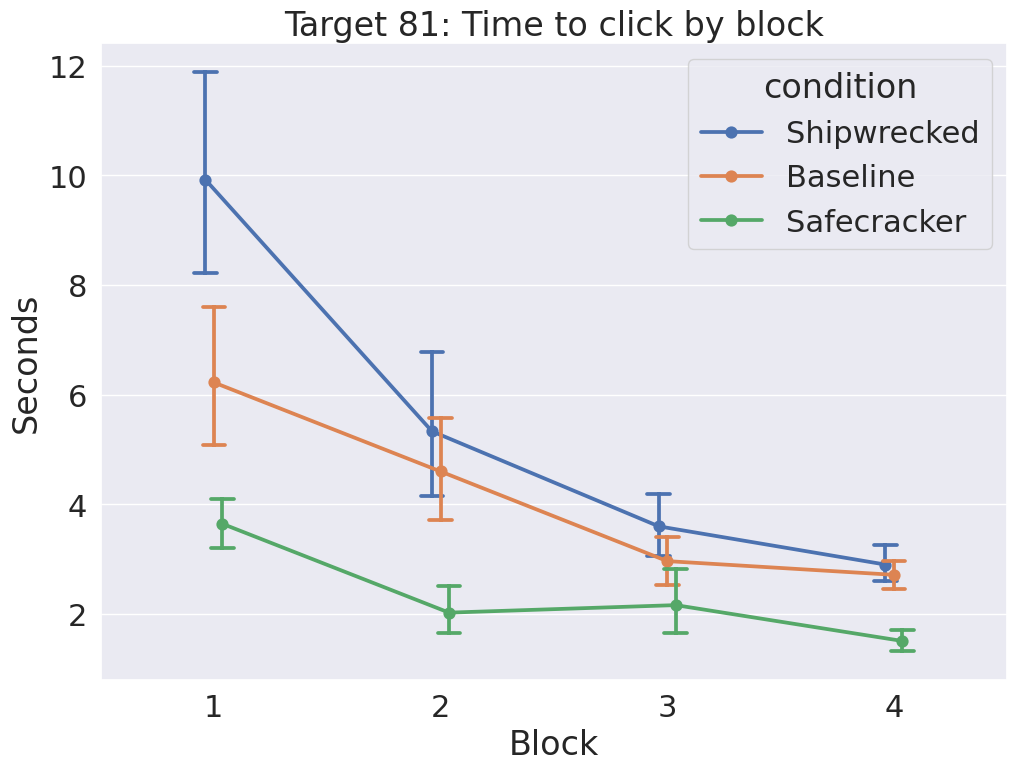

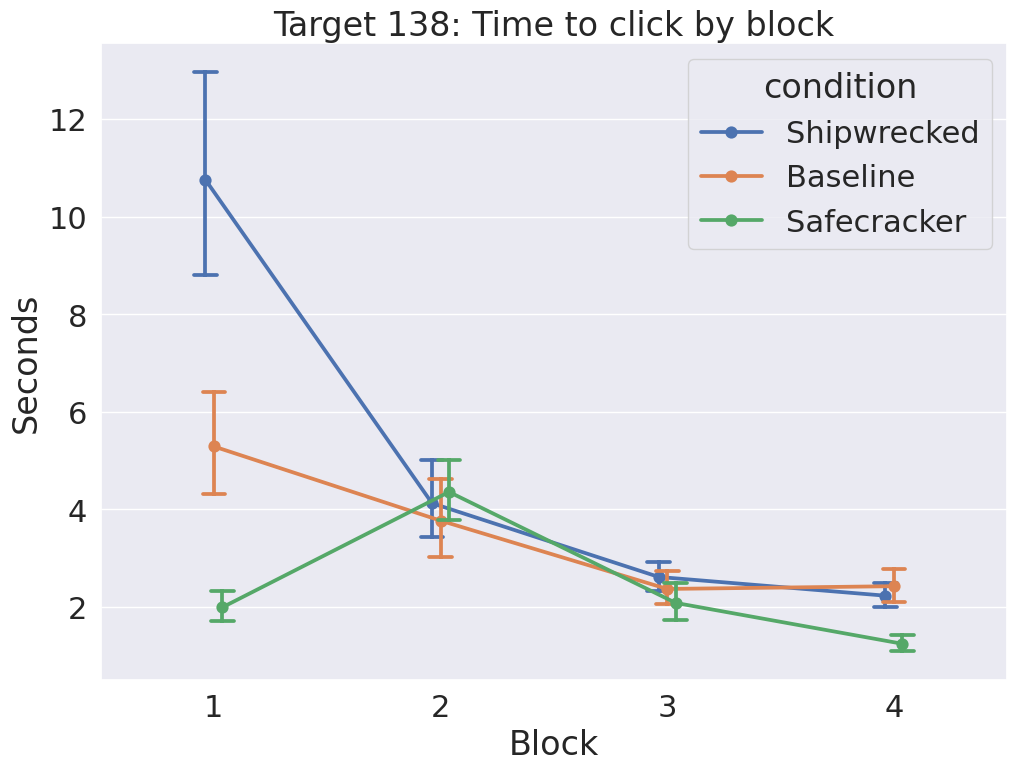

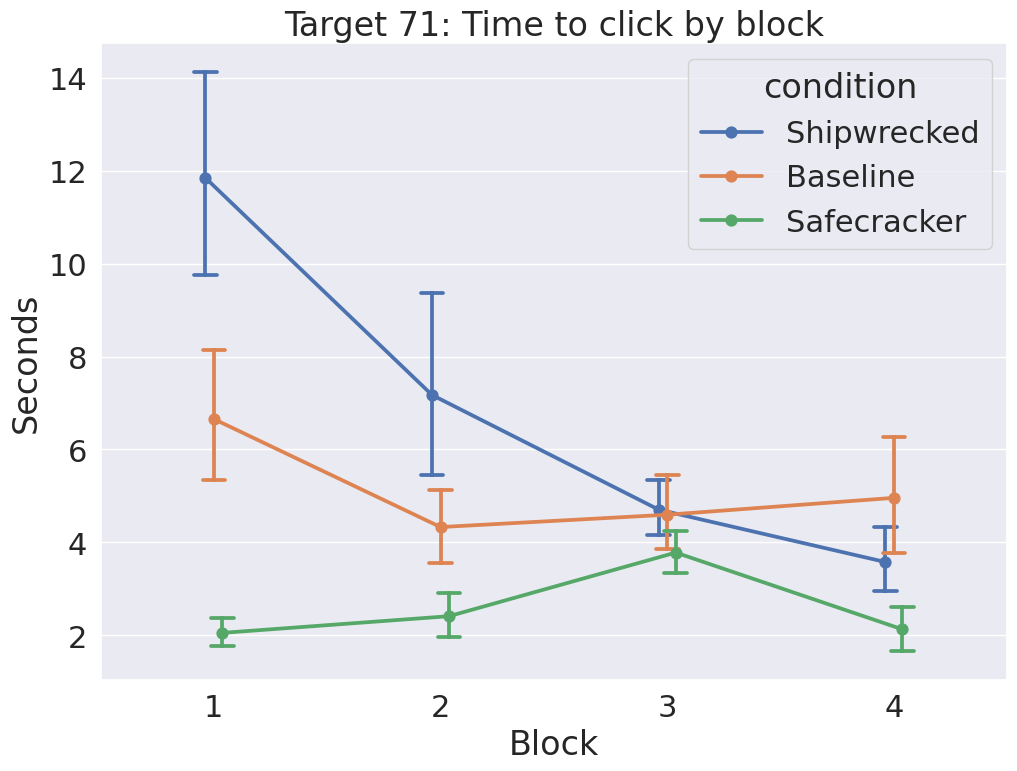

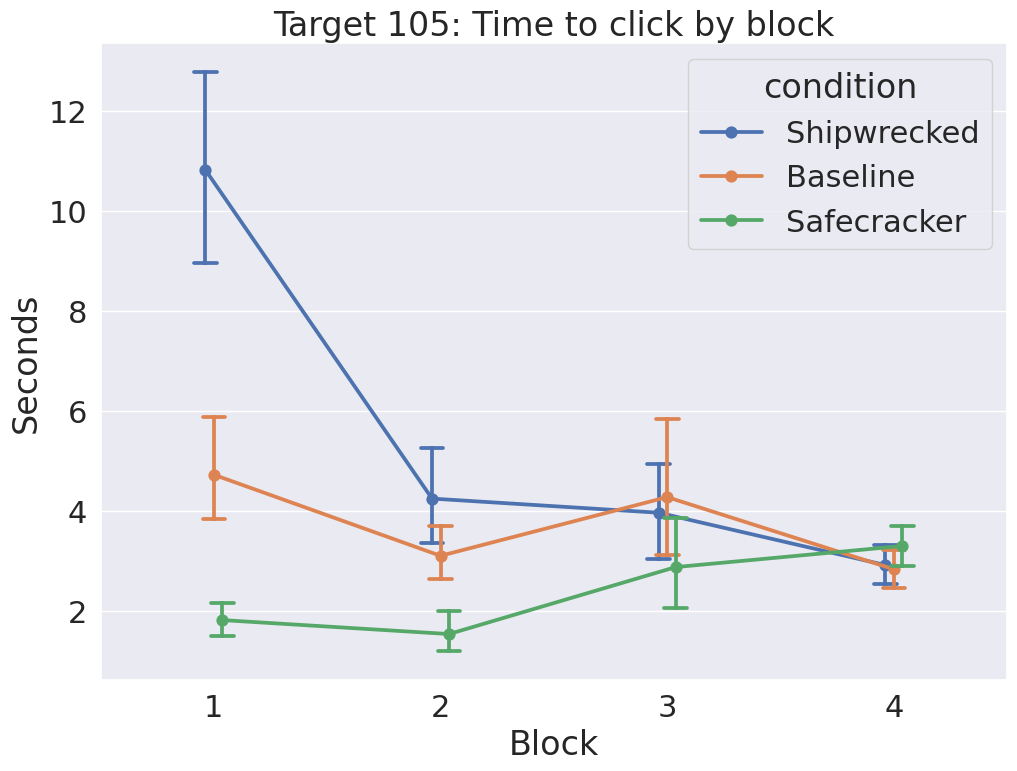

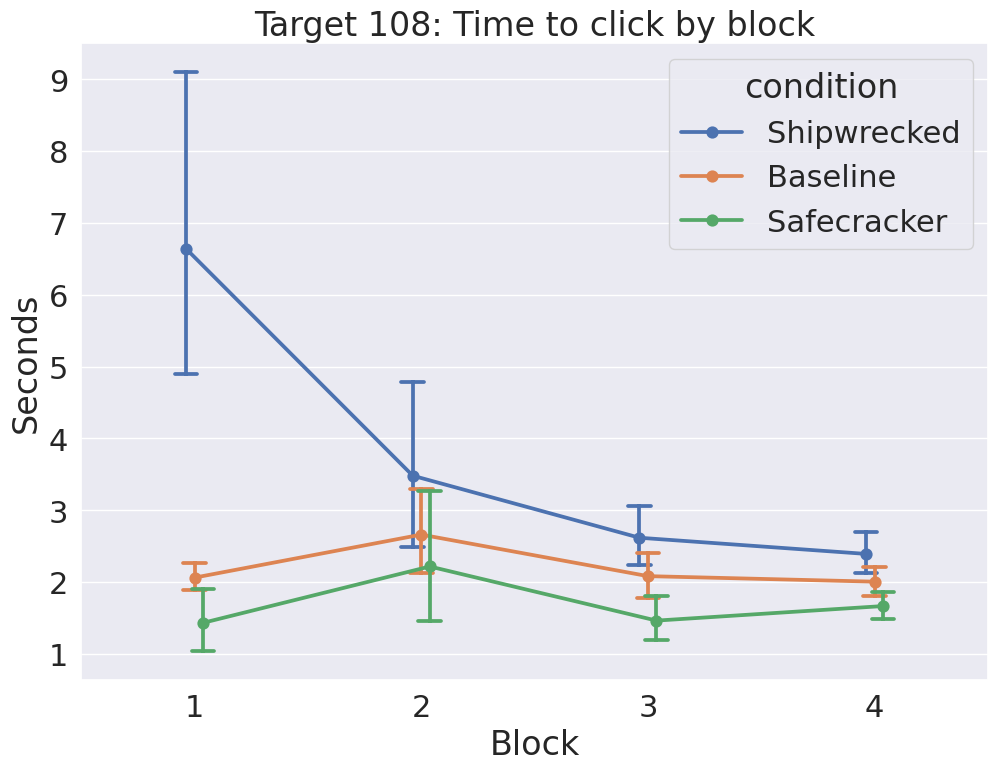

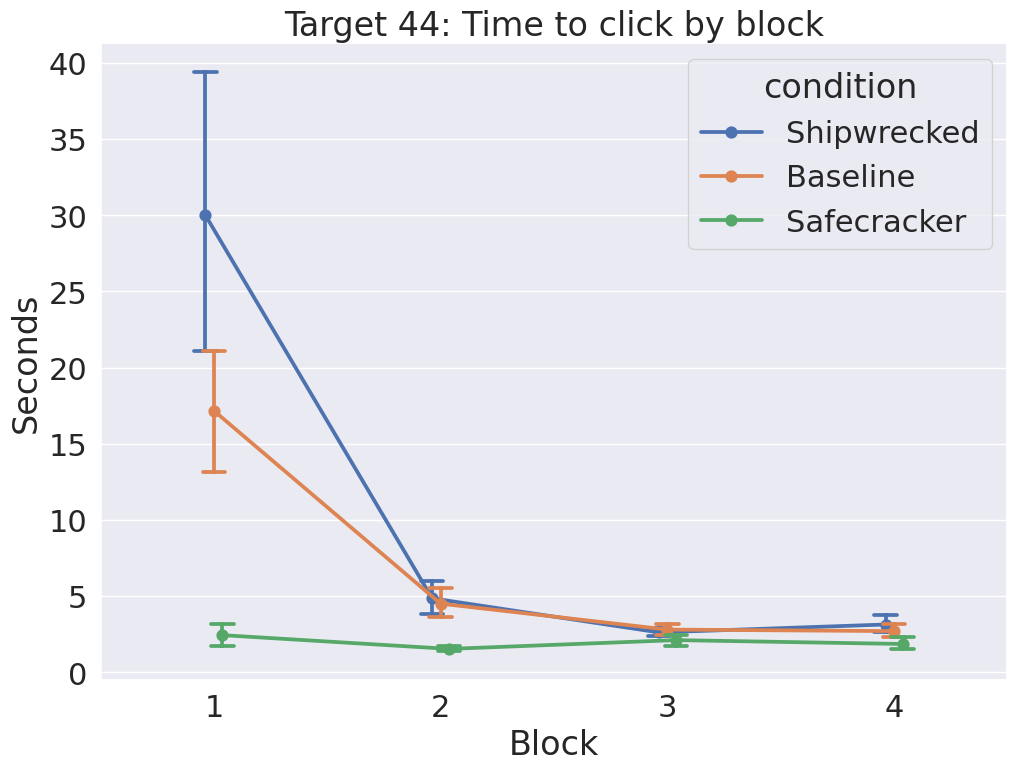

In [ ]:
for target in targets:
    target_data = targets_time_per_click[targets_time_per_click['targetID'] == target]
    #target_data_ordered = target_data.sort_values(['participantID', 'timeSubmitted'])
    # target_data_ordered['target_order'] = target_data_ordered.apply(lambda row: int(row['exposure_count']) if row['condition']=='Simon' else int(row['block']), axis=1)
    plt.figure()
    sns.pointplot(data=target_data, x='block', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95), capsize=0.1).set(title=f"Target {target}: Time to click by block", xlabel="Block", ylabel="Seconds")
    plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/time_to_click_by_block_{str(target)}.png")

In [ ]:
targets_time_per_click['condition'].unique()

<StringArray>
['Shipwrecked', 'Baseline', 'Safecracker']
Length: 3, dtype: str

Shipwrecked
(2117, 14)
Baseline
(2124, 14)
Safecracker
(2277, 14)


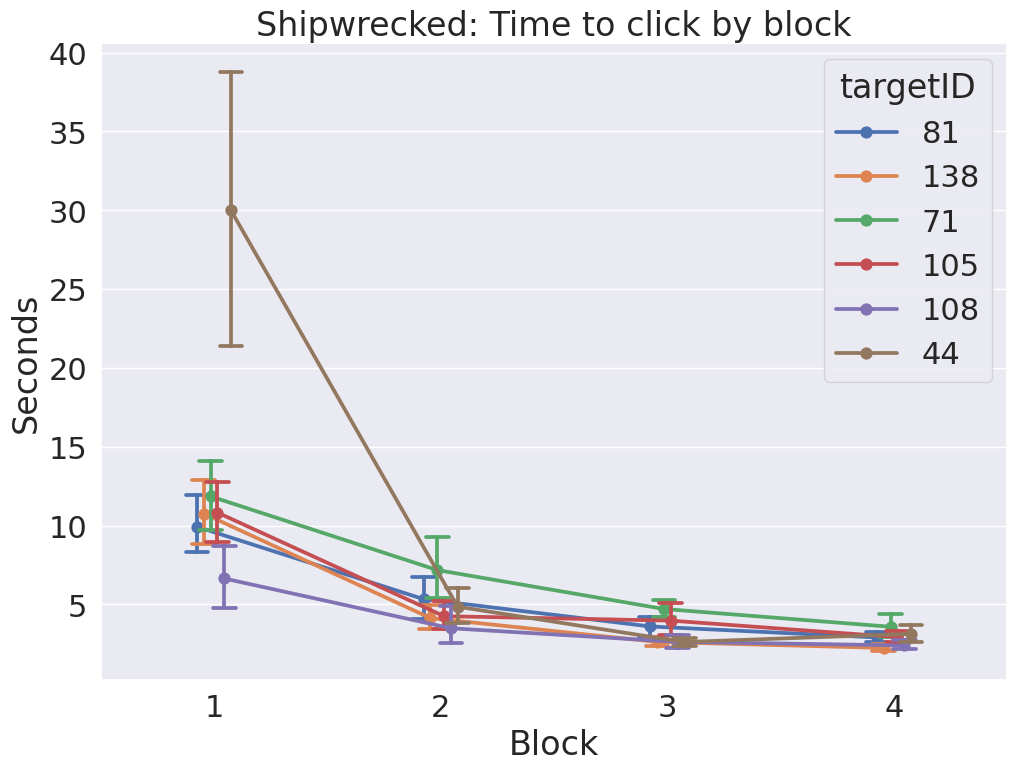

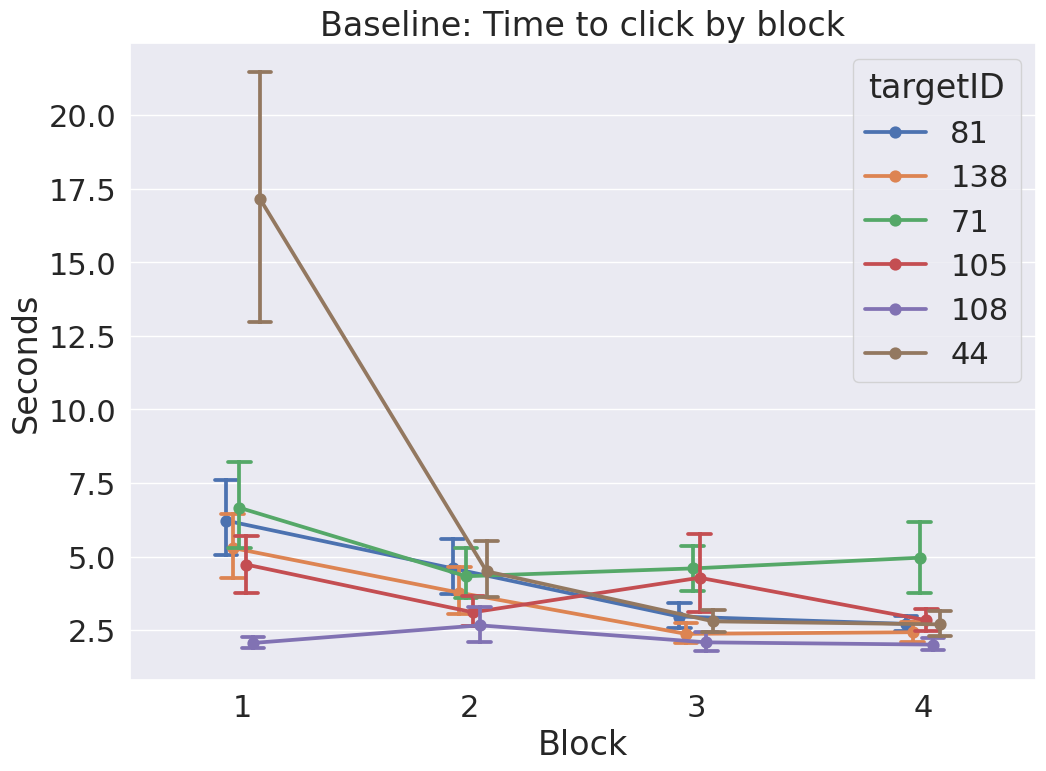

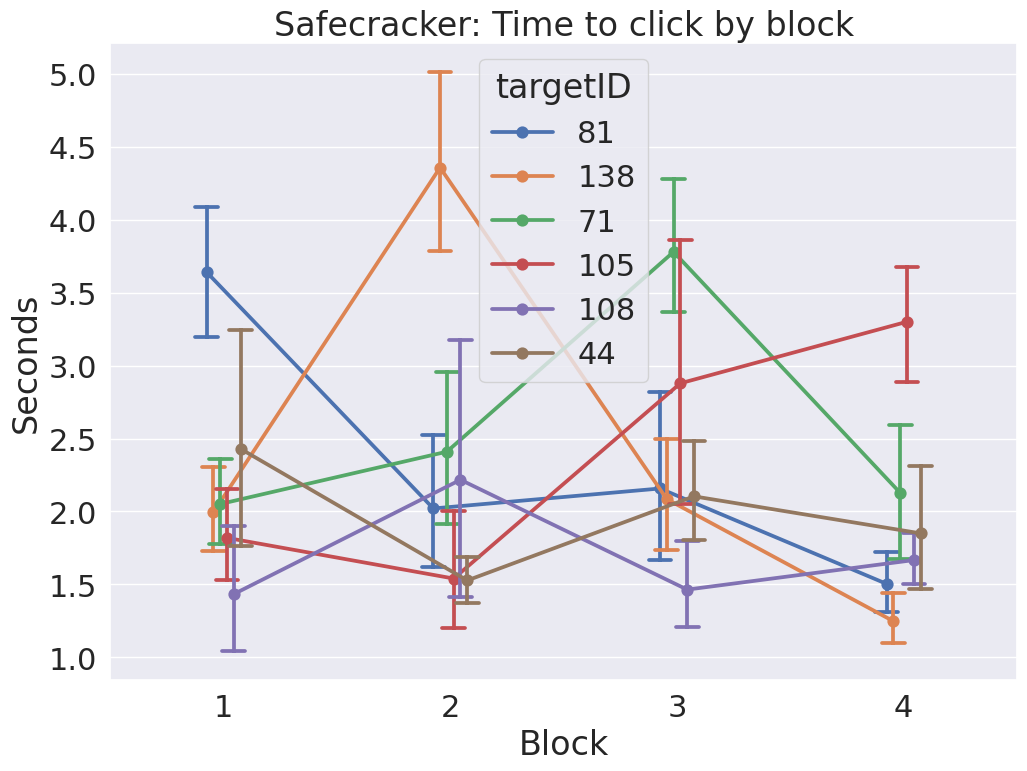

In [ ]:
conditions = targets_time_per_click['condition'].unique()

for condition in conditions:
    print(condition)
    condition_data = targets_time_per_click[targets_time_per_click['condition'] == condition]
    print(condition_data.shape)
    plt.figure()
    sns.pointplot(data=condition_data, x='block', hue='targetID', y=f'ct', dodge=True, errorbar=('ci', 95), capsize=0.1).set(title=f"{condition}: Time to click by block", xlabel="Block", ylabel="Seconds")
    plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/{str(condition)}_all_targets_time_to_click.png")

<h2>Time to click based on placement in sequence</h2>

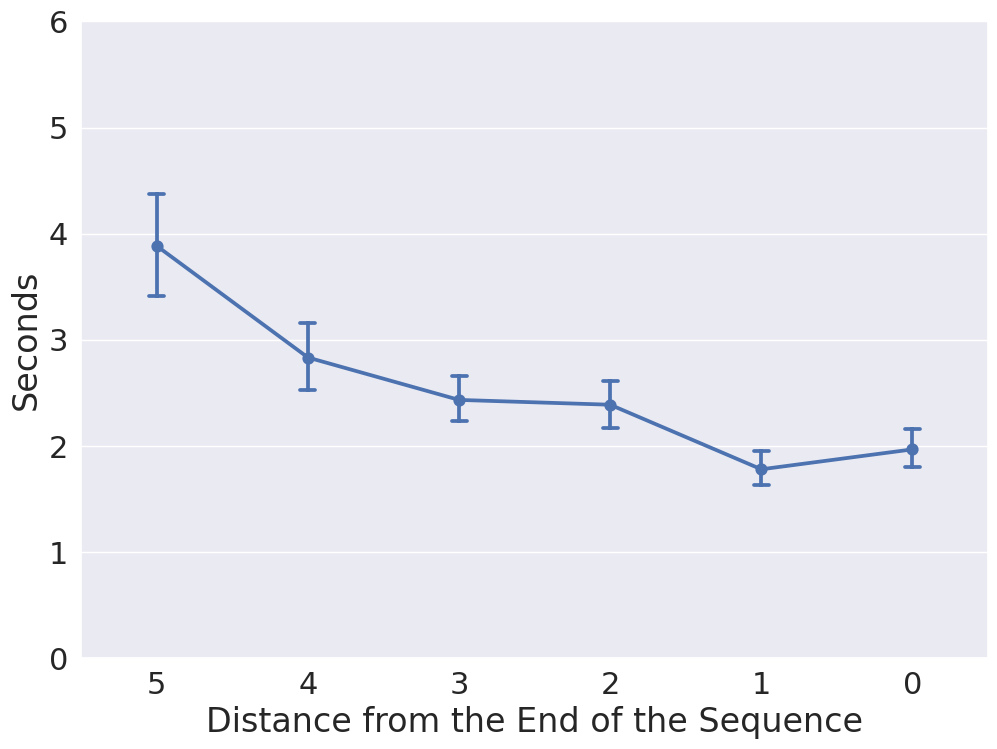

In [ ]:
targets_time_per_click.dropna(inplace=True)


targets_time_per_click['trial_order'] = targets_time_per_click['trial_order'].astype(int)
targets_time_per_click['distanceFromEndOfSequence'] = targets_time_per_click['distanceFromEndOfSequence'].astype(int)

plt.figure()
sns.pointplot(data=targets_time_per_click, x='distanceFromEndOfSequence', y=f'ct', dodge=True, errorbar=('ci', 95), capsize=0.1).set(xlabel="Distance from the End of the Sequence", ylabel="Seconds")
plt.ylim(0, 6)
plt.gca().invert_xaxis()
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/time_v_distance_from_end_of_sequence.png")



<h2>Memory Test Analysis</h2>

In [ ]:
simon_test_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'testing']
simon_test_data_filtered.columns

Index(['trialLogID', 'participantID', 'timeSubmitted', 'pid', 'condition',
       'prolificID', 'day', 'phase', 'block', 'trial', 'targetID', 'distEdge',
       'distLand', 'nearLandmark', 'isLandmark', 'targetX', 'targetY',
       'clickX', 'clickY', 'euclidean', 'manhattan', 'gameDistributionIndex',
       'cursorWidth', 'ct', 'underGuide', 'errors', 'movement', 'confidence',
       'errorObjects', 'cumulativeManhattanDistance',
       'cumulativeEuclideanDistance', 'sequence', 'manhattanDistanceLog',
       'euclideanDistanceLog', 'ctForTargetInOrder', 'targetErrorArray',
       'errorInTrial', 'treatment'],
      dtype='str')

In [ ]:
searchlight_test_data_filtered = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase'] == 'testing']
searchlight_test_data_ordered = searchlight_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
searchlight_test_data_ordered['test_order'] = searchlight_test_data_ordered.groupby('participantID').cumcount() + 1
searchlight_test_data_ordered['breakpoint'] = searchlight_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1) # seven because of attention checks.
#searchlight_test_data_ordered['breakpoint'] = searchlight_test_data_ordered['block']
searchlight_test_data_ordered['condition'] = 'Shipwrecked'


no_game_test_data_filtered = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase'] == 'testing']
no_game_test_data_ordered = no_game_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
no_game_test_data_ordered['test_order'] = no_game_test_data_ordered.groupby('participantID').cumcount() + 1
no_game_test_data_ordered['breakpoint'] = no_game_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1)
#no_game_test_data_ordered['breakpoint'] = no_game_test_data_ordered['block']
no_game_test_data_ordered['condition'] = 'Baseline'

simon_test_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'testing']
simon_test_data_ordered = simon_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
simon_test_data_ordered['test_order'] = simon_test_data_ordered.groupby('participantID').cumcount() + 1
simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1)
# simon_test_data_ordered['gameDistributionIndex'] = simon_test_data_ordered['gameDistributionIndex'].astype(int)
# simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['gameDistributionIndex'] + 1
simon_test_data_ordered = simon_test_data_ordered[simon_test_data_ordered['breakpoint'] <= 4] # somehow we have one that is breakpoint 5
# simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['breakpoint'].apply(lambda x: x-3 if x>3 else x)
# simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['gameDistributionIndex'].apply(lambda x: 0 if x=='None' else int(x)+1)
simon_test_data_ordered['condition'] = 'Safecracker'


test_data = pd.concat([searchlight_test_data_ordered, no_game_test_data_ordered, simon_test_data_ordered], ignore_index=True)

In [ ]:
simon_test_data_ordered.shape

(817, 40)

In [ ]:
searchlight_test_data_ordered.shape

(840, 35)

In [ ]:
no_game_test_data_ordered.shape

(840, 35)

In [ ]:
# missed the attention check during trial

test_data_missed = test_data[(test_data['targetID'] == 0) & (test_data['manhattan']>0)]
test_data_missed[['condition', 'pid', 'breakpoint']]

condition  pid  breakpoint
423   Shipwrecked   18           1
430   Shipwrecked   18           2
437   Shipwrecked   18           3
444   Shipwrecked   18           4
1165     Baseline   19           3
1403     Baseline   29           1
1410     Baseline   29           2
1417     Baseline   29           3
1424     Baseline   29           4
2019  Safecracker   14           1
2026  Safecracker   14           2
2033  Safecracker   14           3
2040  Safecracker   14           4
2215  Safecracker   23           1

In [ ]:
# based on the above, remove tests from participant 18 from searchlight,  29 from baseline, 14 from Simon, and 23 from Simon at breakpoint 1
test_data = test_data.loc[~((test_data['pid'] == 18) & (test_data['condition'] == 'Shipwrecked'))] 
test_data = test_data.loc[~((test_data['pid'] == 29) & (test_data['condition'] == 'Baseline'))] 
test_data = test_data.loc[~((test_data['pid'] == 14) & (test_data['condition'] == 'Safecracker'))] 
test_data = test_data.loc[~((test_data['pid'] == 23) & (test_data['condition'] == 'Safecracker') & (test_data['breakpoint'] == 1))] 

In [ ]:

# Remove attention checks

test_data = test_data[test_data['targetID'] != 0].reset_index(drop=True)
test_data['targetID'].unique()

array([ 71, 138, 105,  81, 108,  44])

In [ ]:
test_data[test_data['condition']=='Safecracker'].shape

(672, 40)

In [ ]:
test_data[test_data['condition']=='Shipwrecked'].shape

(696, 40)

In [ ]:
test_data[test_data['condition']=='Baseline'].shape

(696, 40)

In [ ]:
breakpoints = test_data['breakpoint'].unique()

for condition in conditions:
    for breakpoint in breakpoints:
        # Filter data for current condition and breakpoint
        mask = (test_data['condition'] == condition) & (test_data['breakpoint'] == breakpoint)
        subset = test_data[mask]
        
        print(f"The size of {condition} at block {breakpoint}")
        print(subset.shape)

        # Calculate mean and standard deviation for ct
        ct_mean = subset['ct'].mean()
        ct_std = subset['ct'].std()
        
        # Remove rows where ct is 3 or more standard deviations outside the mean
        outlier_mask = np.abs(subset['ct'] - ct_mean) >= 3 * ct_std
        print(f"The following will be removed from {condition} at breakpoint {breakpoint}")
        test_data = test_data.drop(subset[outlier_mask].index)

The size of Shipwrecked at block 1
(174, 40)
The following will be removed from Shipwrecked at breakpoint 1
The size of Shipwrecked at block 2
(174, 40)
The following will be removed from Shipwrecked at breakpoint 2
The size of Shipwrecked at block 3
(174, 40)
The following will be removed from Shipwrecked at breakpoint 3
The size of Shipwrecked at block 4
(174, 40)
The following will be removed from Shipwrecked at breakpoint 4
The size of Baseline at block 1
(174, 40)
The following will be removed from Baseline at breakpoint 1
The size of Baseline at block 2
(174, 40)
The following will be removed from Baseline at breakpoint 2
The size of Baseline at block 3
(174, 40)
The following will be removed from Baseline at breakpoint 3
The size of Baseline at block 4
(174, 40)
The following will be removed from Baseline at breakpoint 4
The size of Safecracker at block 1
(168, 40)
The following will be removed from Safecracker at breakpoint 1
The size of Safecracker at block 2
(168, 40)
The fol

/tmp/ipykernel_45737/234248812.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=test_data, x='breakpoint', hue='condition', y=f'confidence', ci=95, capsize=0.1).set(xlabel="Block")


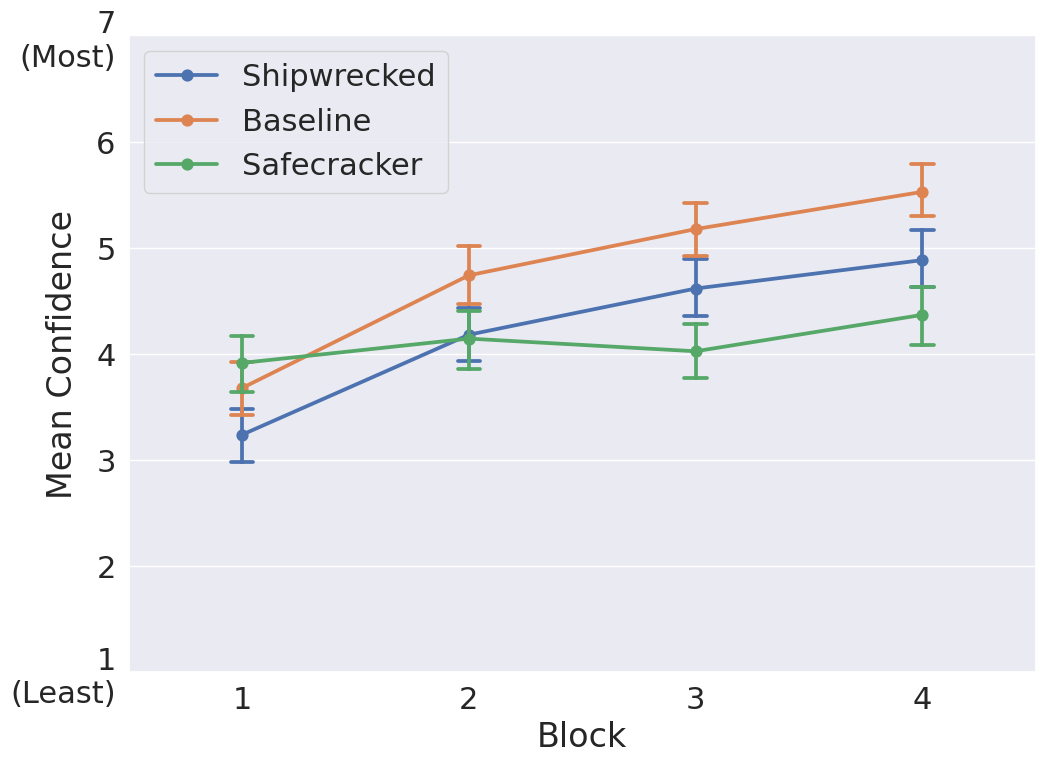

In [ ]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/test_data/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/test_data/")

confidence = test_data[test_data['confidence']>0]

# graph the mean engagement per trial order 
plt.figure()
sns.pointplot(data=test_data, x='breakpoint', hue='condition', y=f'confidence', ci=95, capsize=0.1).set(xlabel="Block")
plt.yticks([1, 2, 3, 4, 5, 6, 7], ['1\n(Least)', '2', '3', '4', '5', '6', '7\n(Most)'])
plt.legend(title='')
plt.ylim(1, 7)
plt.ylabel(ylabel="Mean Confidence", labelpad=-50)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence_in_memory_test.png")

/tmp/ipykernel_45737/810589338.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=test_data, x='targetID', hue='condition', y=f'confidence', dodge=True, ci=95, capsize=0.1).set(title="Confidence Per Target in Memory Test", xlabel="Target", ylabel="Confidence")


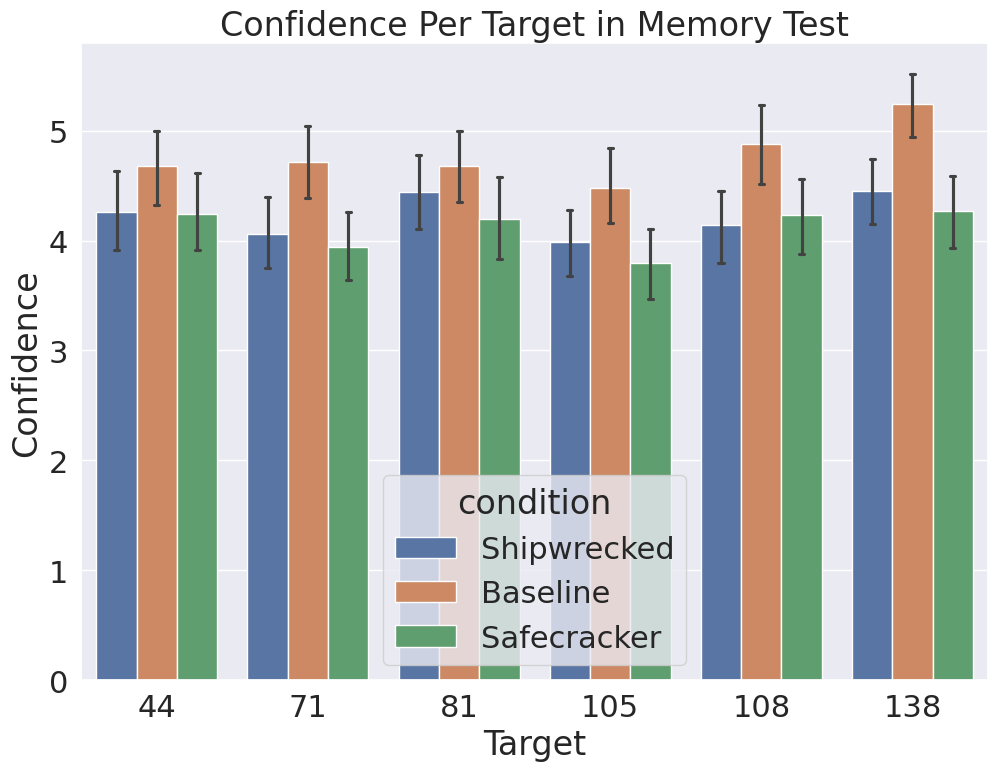

In [ ]:
# confidence per target in memory test 
plt.figure()
# sns.pointplot(data=test_data, x='targetID', hue='condition', y=f'confidence', dodge=True, errorbar=('ci', 95)).set(title="Confidence Per Target in Memory Test", xlabel="Target", ylabel="Confidence")
sns.barplot(data=test_data, x='targetID', hue='condition', y=f'confidence', dodge=True, ci=95, capsize=0.1).set(title="Confidence Per Target in Memory Test", xlabel="Target", ylabel="Confidence")
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence_per_target.png")

/tmp/ipykernel_45737/1900338145.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=test_data, x='breakpoint', y=f'manhattan', hue="condition", ci=95, capsize=0.1).set(xlabel="Block", ylabel="Mean error per target")


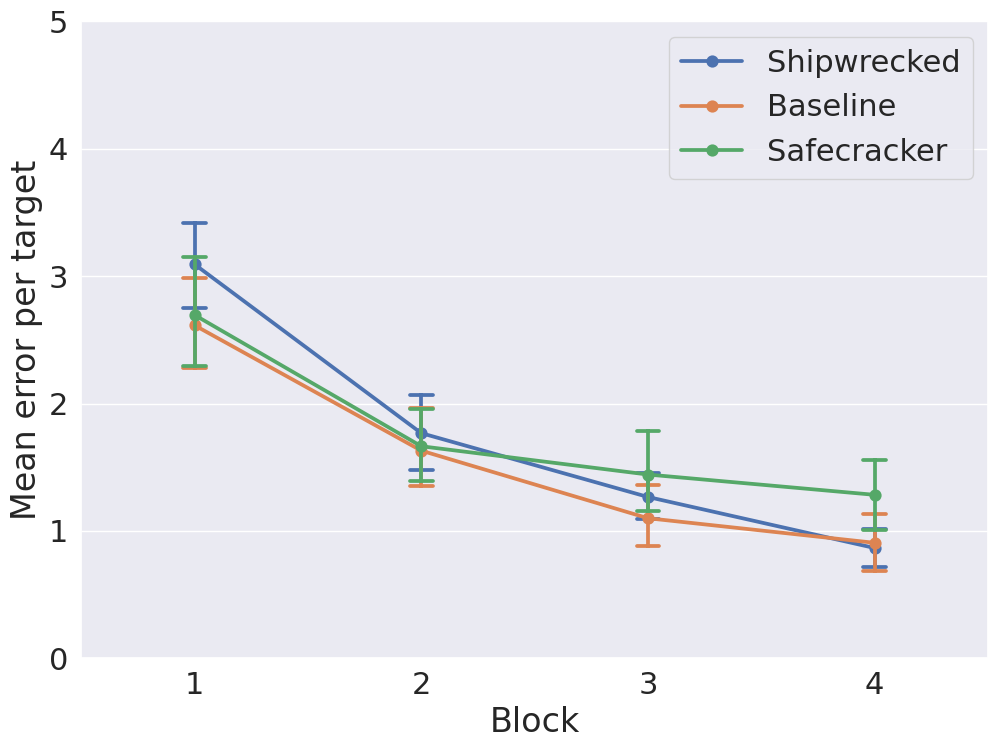

In [ ]:
plt.figure()
sns.pointplot(data=test_data, x='breakpoint', y=f'manhattan', hue="condition", ci=95, capsize=0.1).set(xlabel="Block", ylabel="Mean error per target")
plt.legend(title='')
plt.ylim(0, 5)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/manhattan_per_breakpoint.png")

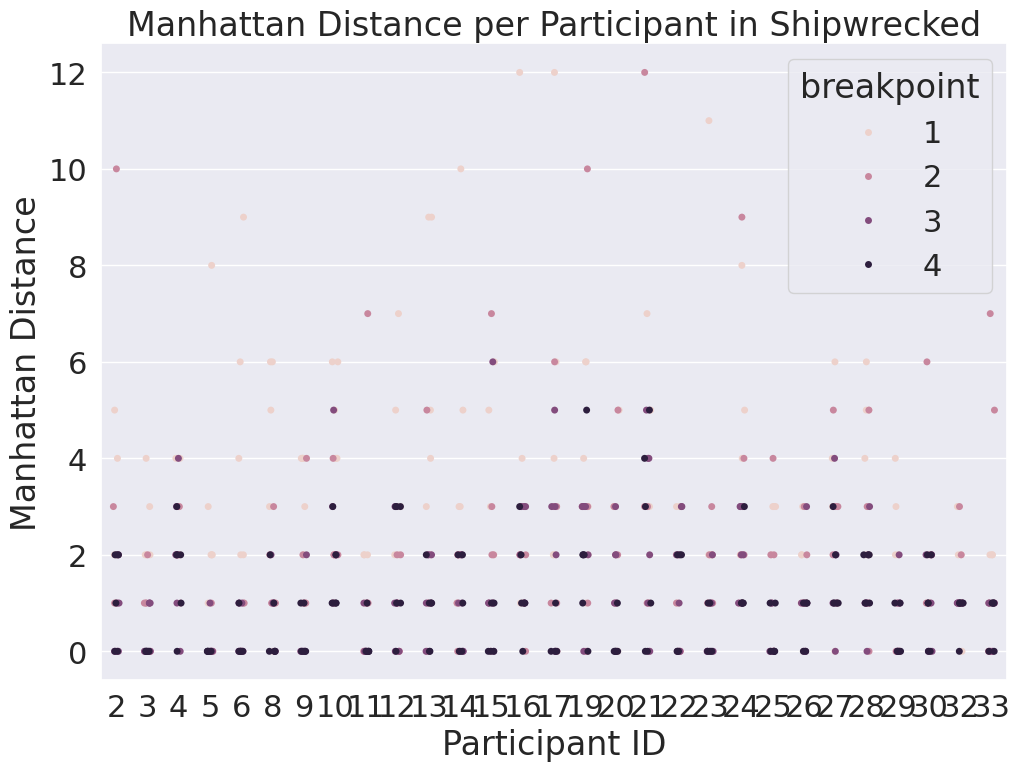

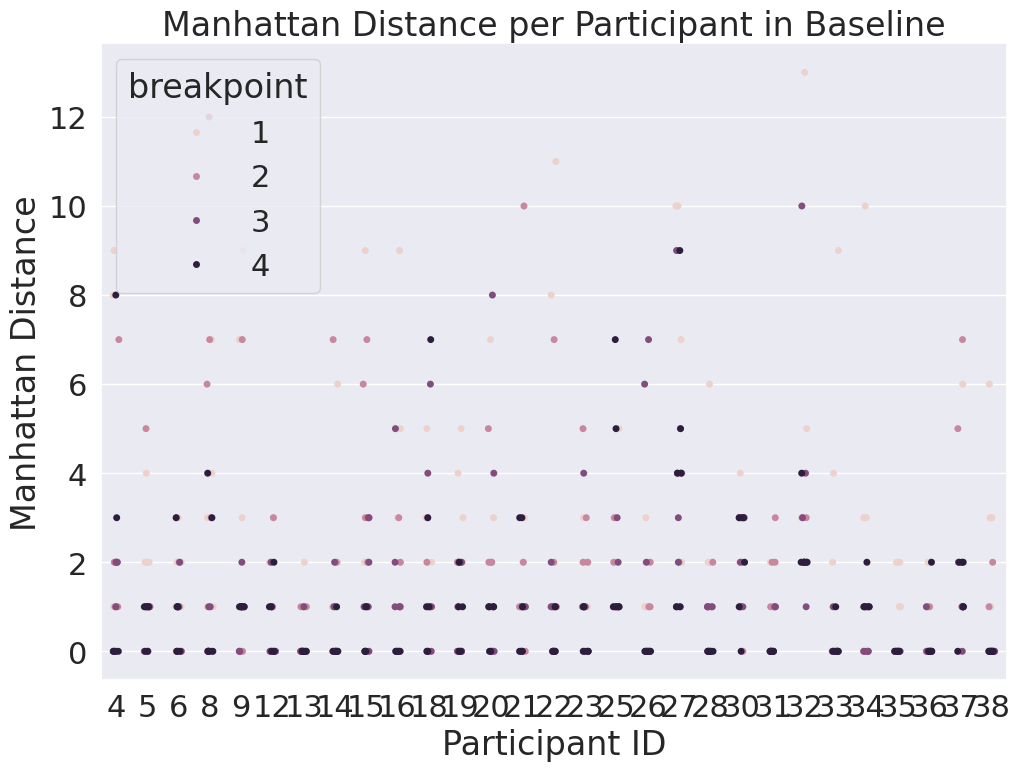

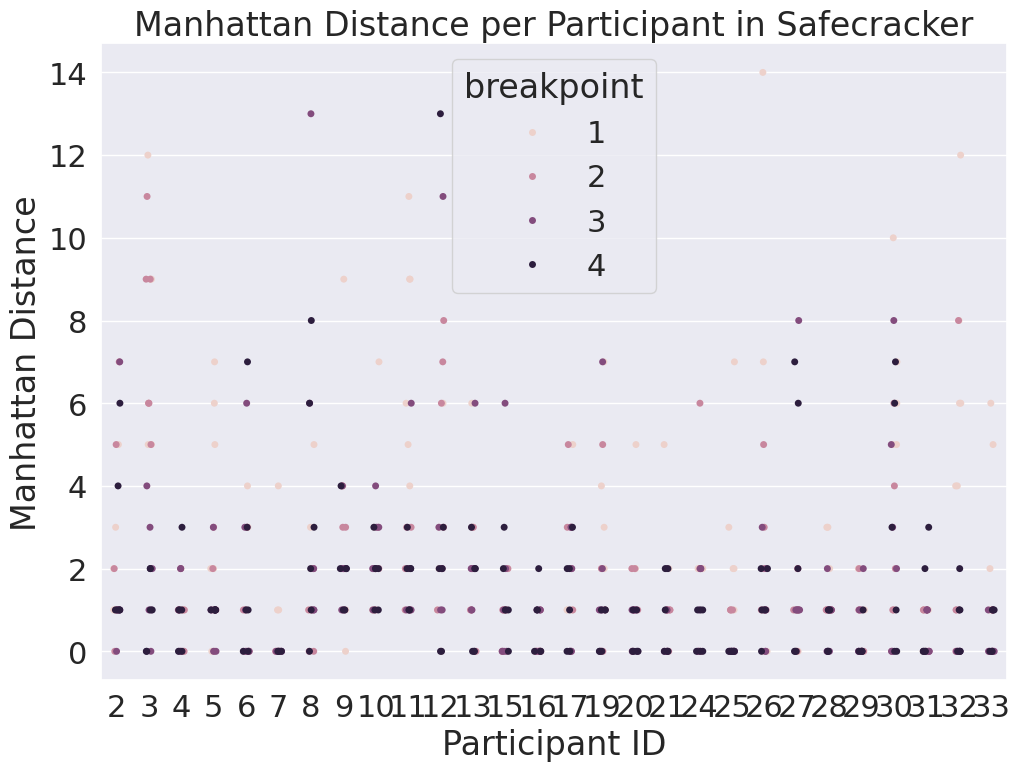

In [ ]:
test_data['participantID'] = test_data['participantID'].astype('str')

for condition in conditions:
    condition_data = test_data[test_data['condition']==condition]
    plt.figure()
    sns.stripplot(data=condition_data, x="participantID", y="manhattan", hue='breakpoint', jitter=True).set(title=f"Manhattan Distance per Participant in {condition}", xlabel="Participant ID", ylabel="Manhattan Distance")
    plt.savefig(f"./plots/{FOLDER_NAME}/test_data/participant_manhattan_pointplot_{condition}.png")

/tmp/ipykernel_45737/2913807165.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=test_data, x='condition', y=f'manhattan', ci=95, capsize=0.1).set( xlabel="Condition", ylabel="Manhattan Distance")


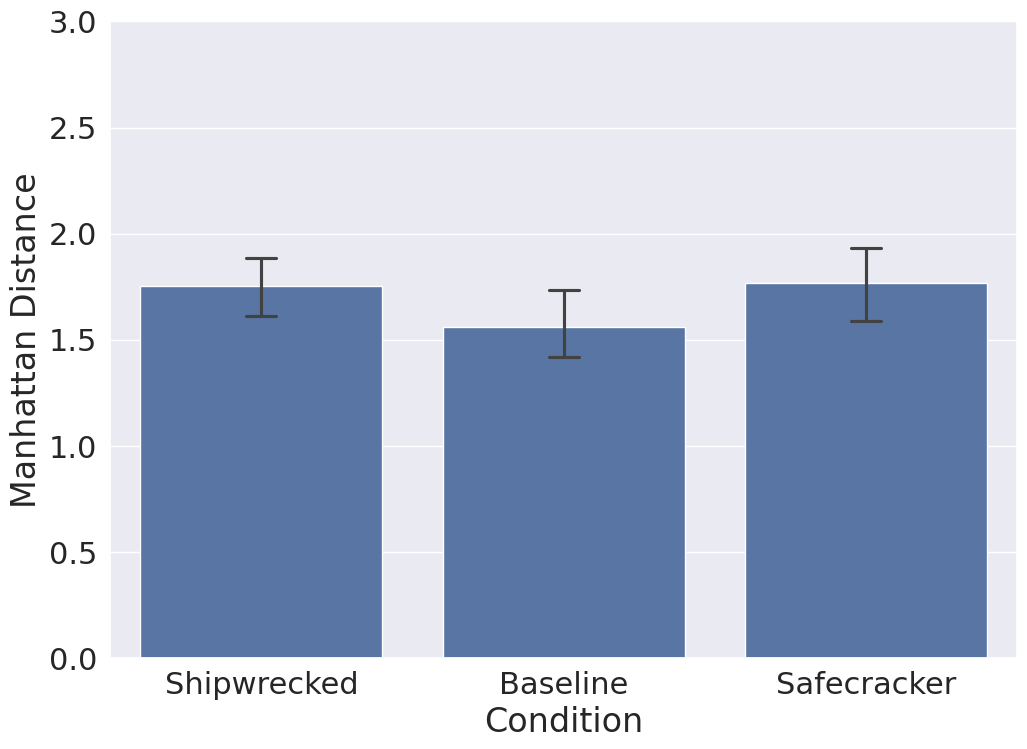

In [ ]:


test_data.to_csv("./data/for-analysis/test_data.csv")

plt.figure()
sns.barplot(data=test_data, x='condition', y=f'manhattan', ci=95, capsize=0.1).set( xlabel="Condition", ylabel="Manhattan Distance")

plt.ylim(0, 3)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/manhattan_per_condition.png")

/tmp/ipykernel_45737/4161124826.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=test_data, x='condition', y=f'euclidean', ci=95, capsize=0.1).set(title="Euclidean distance from target", xlabel="Condition", ylabel="Distance")


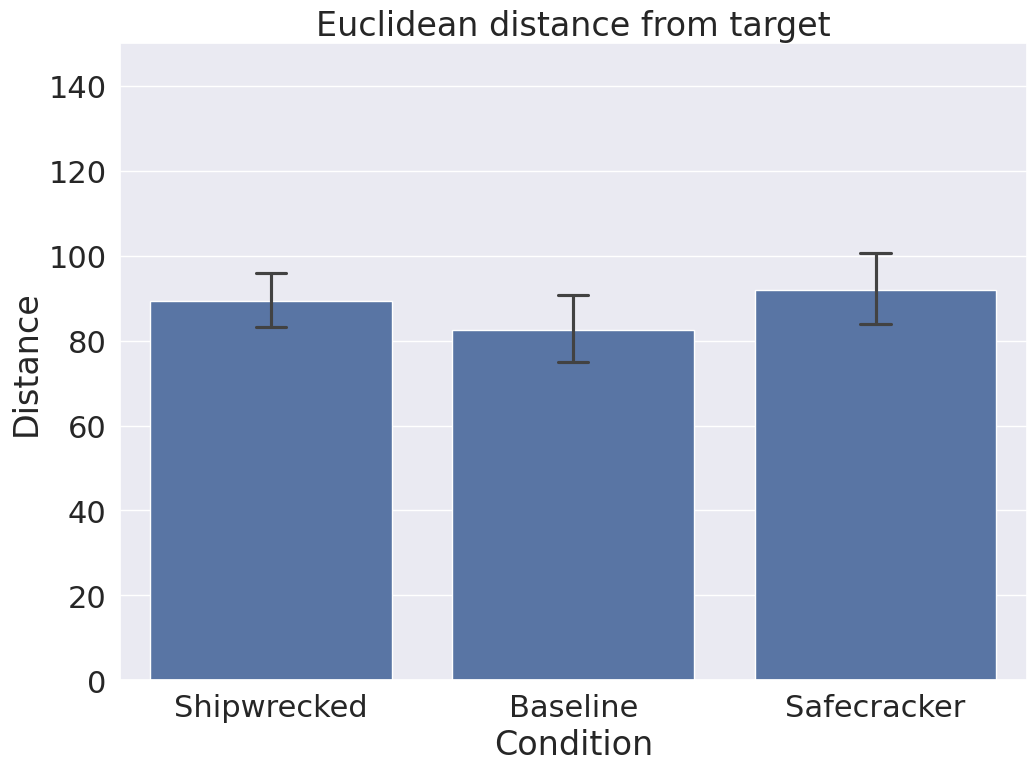

In [ ]:
plt.figure()
sns.barplot(data=test_data, x='condition', y=f'euclidean', ci=95, capsize=0.1).set(title="Euclidean distance from target", xlabel="Condition", ylabel="Distance")

plt.ylim(0, 150)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/euclidean_test_performance.png")

/tmp/ipykernel_45737/3958553714.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=test_data, x='breakpoint', y=f'euclidean', hue="condition", ci=95, capsize=0.1).set(xlabel="Block", ylabel="Euclidean Distance")


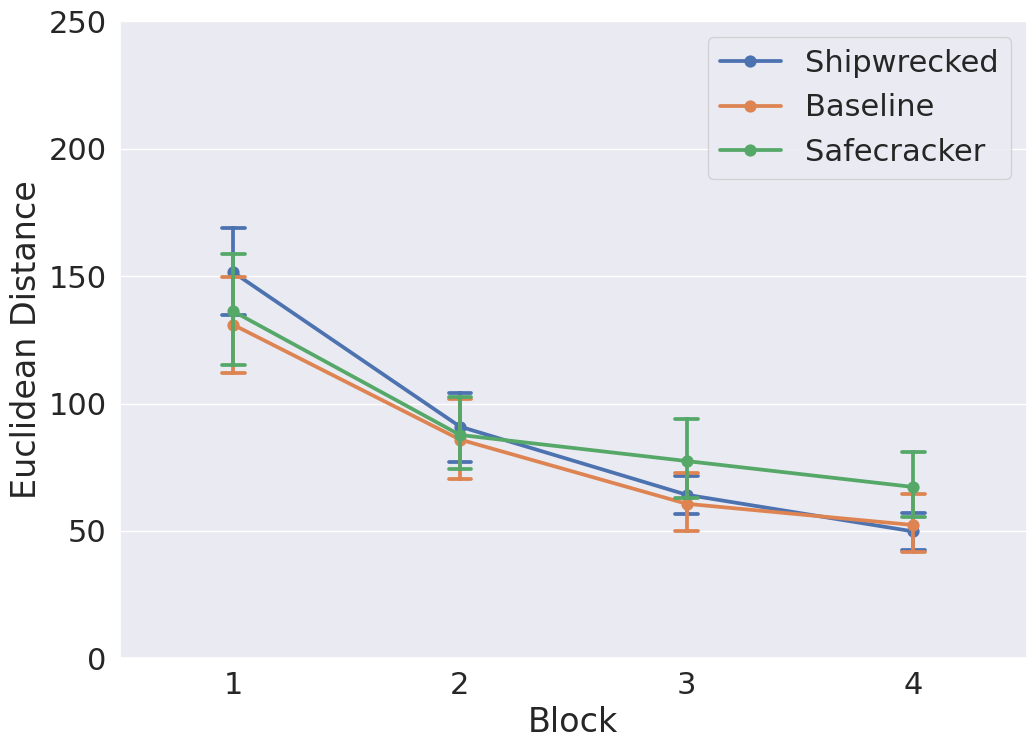

In [ ]:
plt.figure()
sns.pointplot(data=test_data, x='breakpoint', y=f'euclidean', hue="condition", ci=95, capsize=0.1).set(xlabel="Block", ylabel="Euclidean Distance")
plt.ylim(0, 250)
plt.legend(title='')
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/euclidean_per_breakpoint.png")

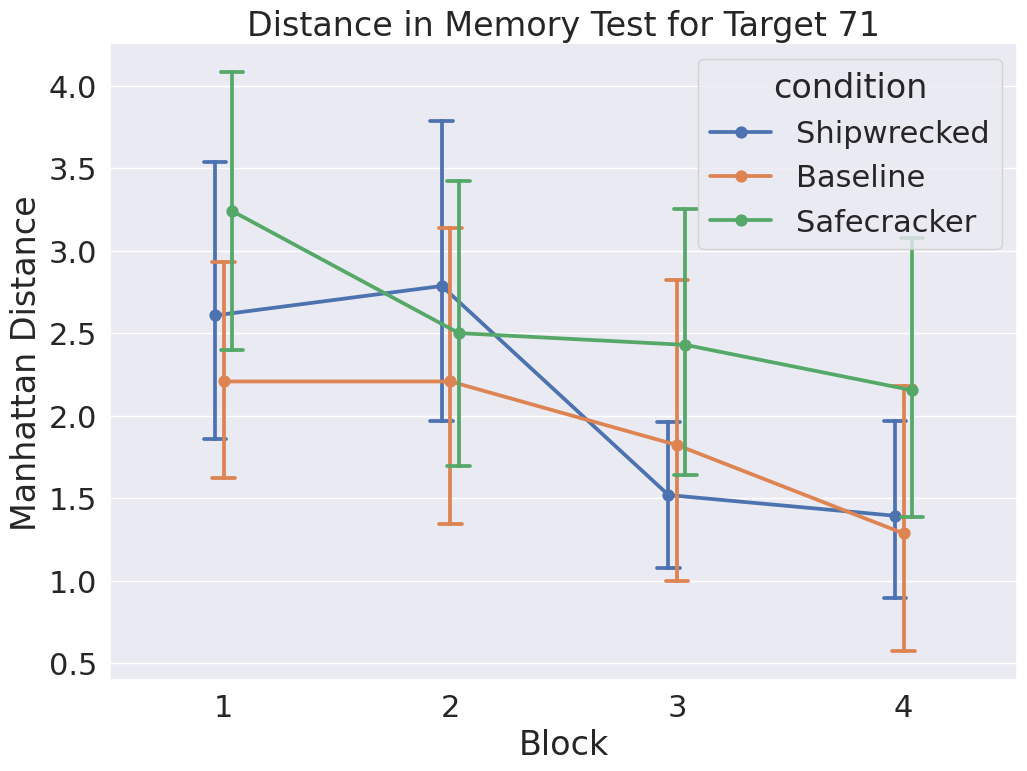

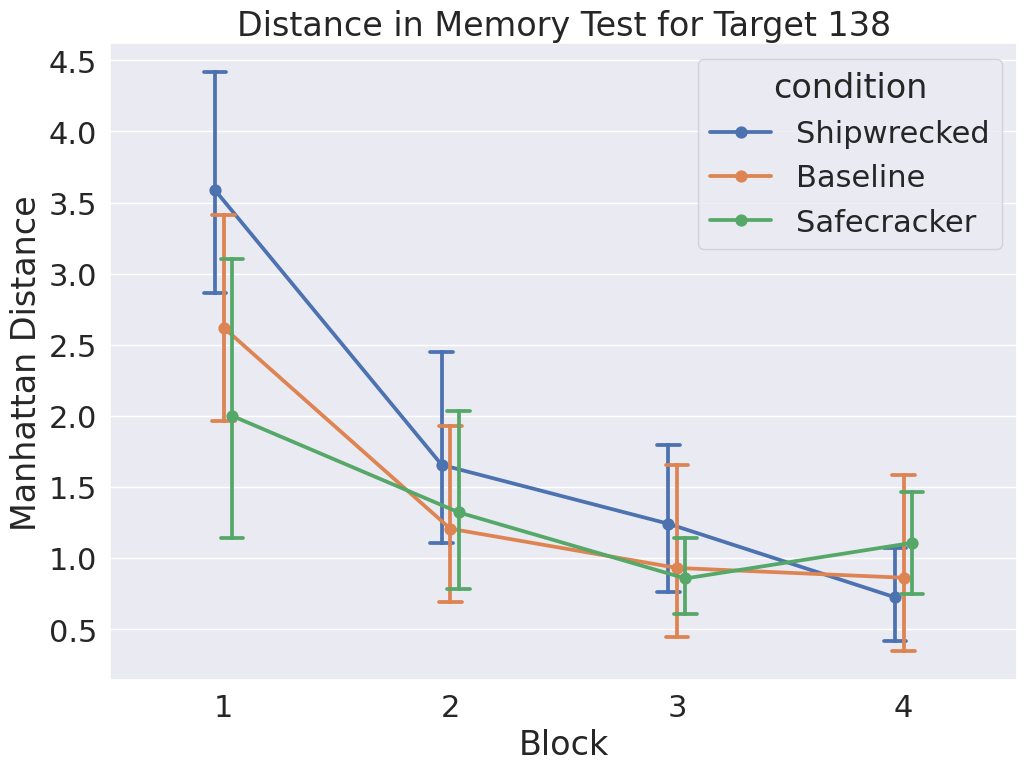

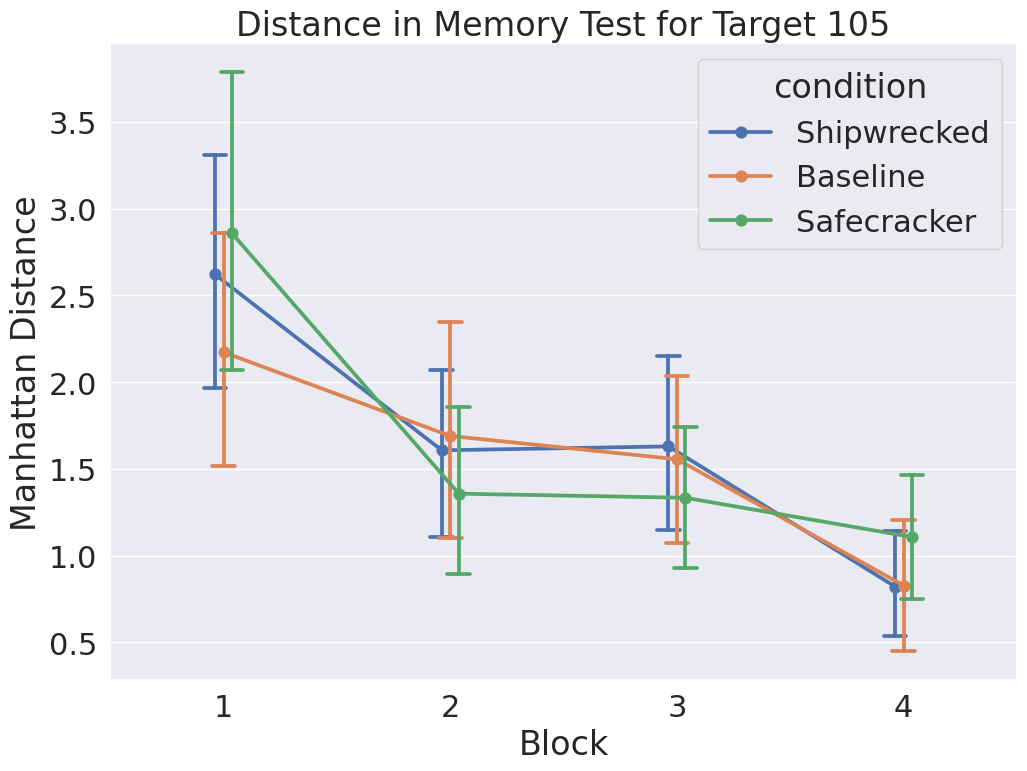

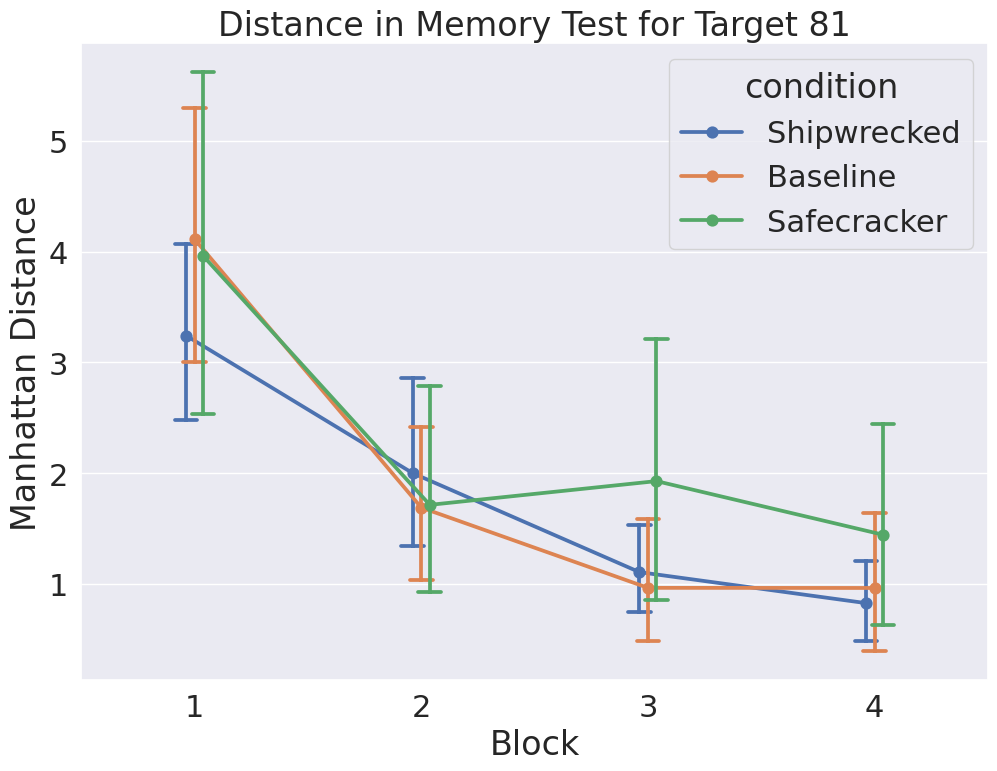

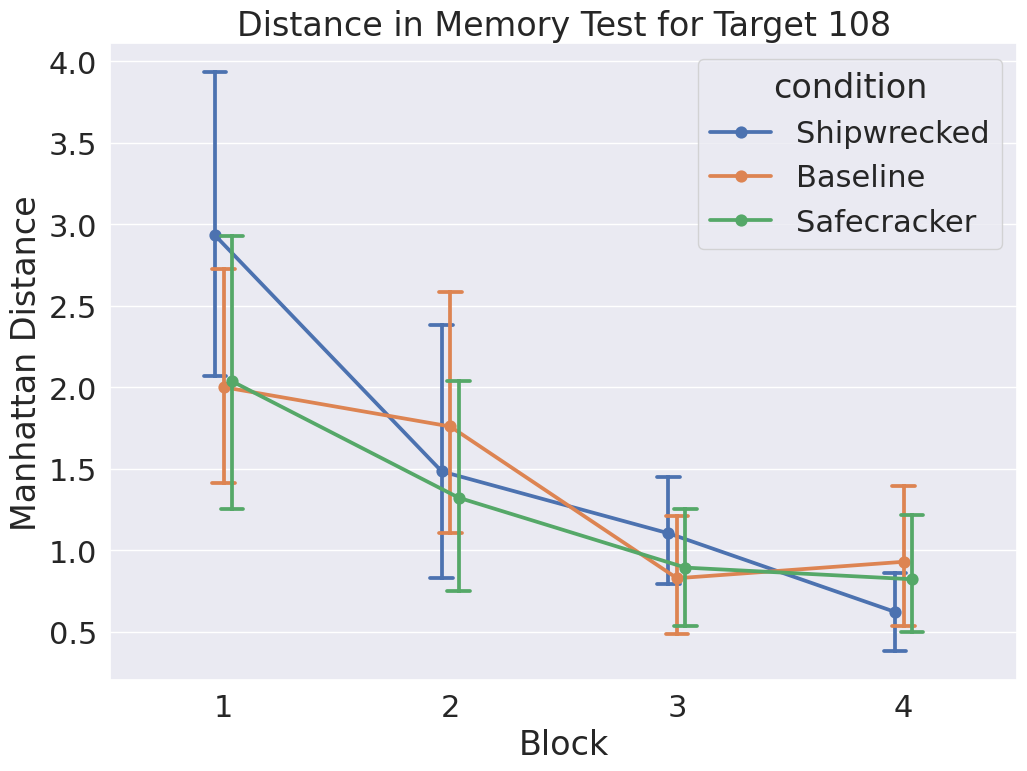

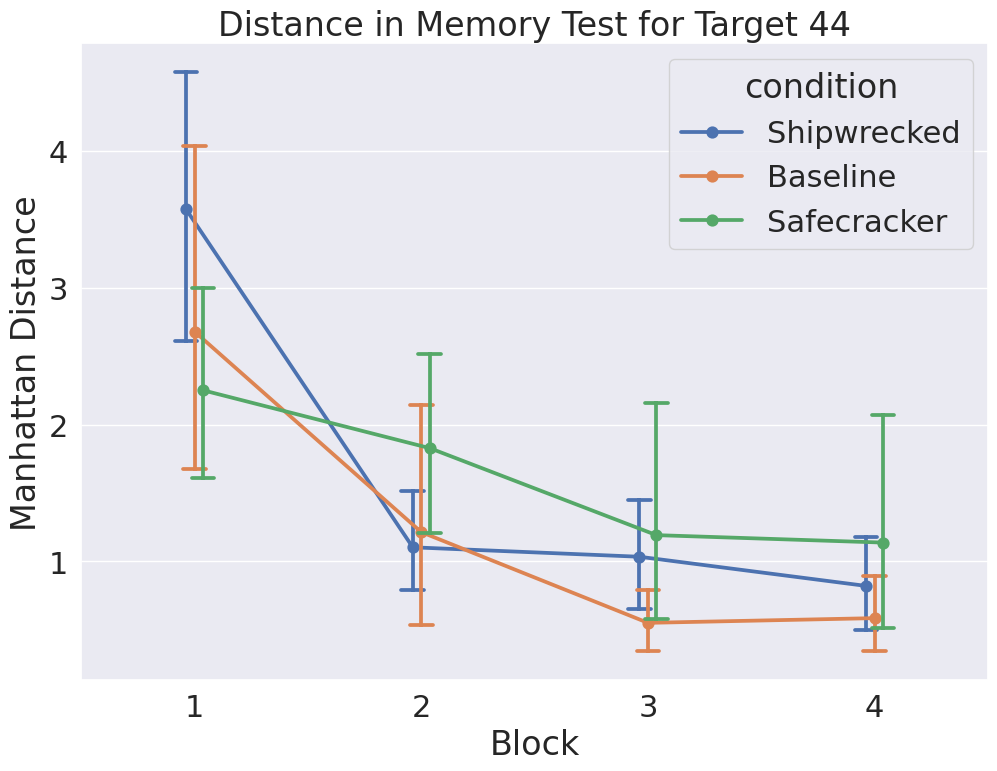

In [ ]:
targets = test_data['targetID'].unique()

for target in targets:
    target_data = test_data[test_data['targetID']==target]
    plt.figure()
    sns.pointplot(data=target_data, x='breakpoint', hue='condition', y=f'manhattan', dodge=True, errorbar=('ci', 95), capsize=0.1).set(title=f"Distance in Memory Test for Target {target}", xlabel="Block", ylabel="Manhattan Distance")
    plt.savefig(f"./plots/{FOLDER_NAME}/test_data/distance_per_target_by_breakpoint_{target}.png")

/tmp/ipykernel_45737/3281244196.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=test_data, x='targetID', hue='condition', y=f'manhattan', dodge=True, ci=95, capsize=0.1).set(title="Distance Per Target in Memory Test", xlabel="Target", ylabel="Manhattan Distance")


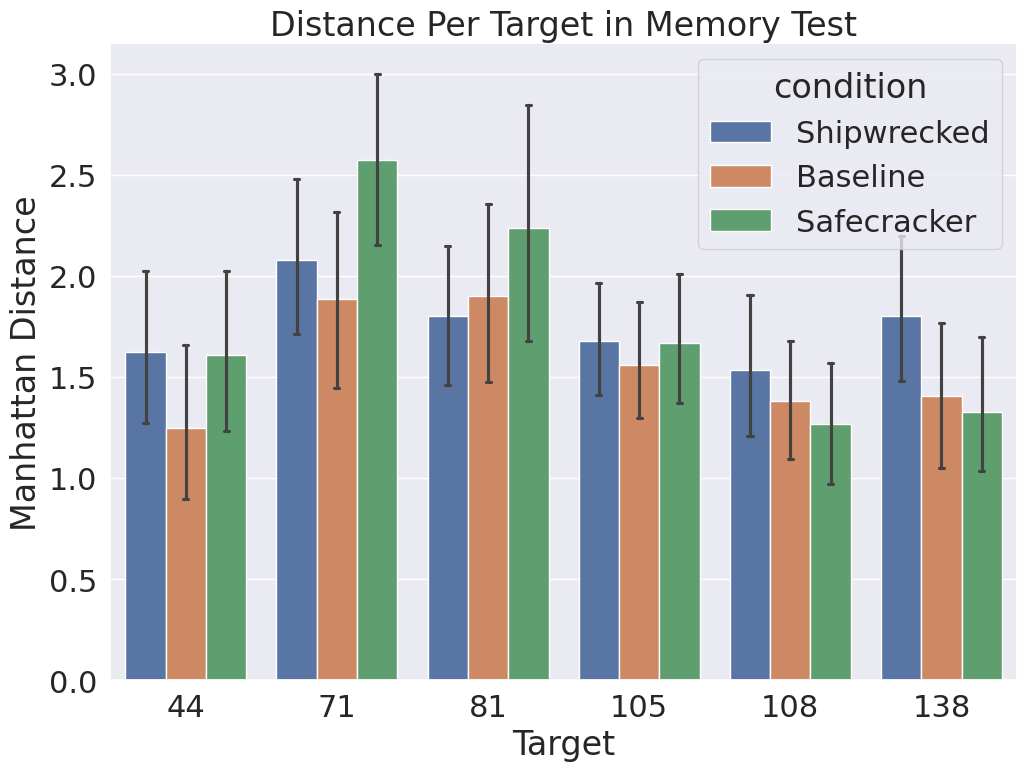

In [ ]:
plt.figure()
#sns.pointplot(data=test_data, x='targetID', hue='condition', y=f'manhattan', dodge=True, errorbar=('ci', 95)).set(title="Distance Per Target in Memory Test", xlabel="Target", ylabel="Manhattan Distance")
sns.barplot(data=test_data, x='targetID', hue='condition', y=f'manhattan', dodge=True, ci=95, capsize=0.1).set(title="Distance Per Target in Memory Test", xlabel="Target", ylabel="Manhattan Distance")
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/distance_per_target.png")

<h2>Sequence Test Analysis</h2>

In [ ]:
simon_sequence_test_data = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase']=="sequence_testing"]
simon_sequence_test_data_ordered = simon_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
simon_sequence_test_data_ordered['sequence_test_order_by_participant'] = simon_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
simon_sequence_test_data_ordered['sequence_test_order'] = simon_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
simon_sequence_test_data_ordered['condition'] = 'Safecracker'

no_game_sequence_test_data = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase']=="sequence_testing"]
no_game_sequence_test_data_ordered = no_game_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
no_game_sequence_test_data_ordered['sequence_test_order_by_participant'] = no_game_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
no_game_sequence_test_data_ordered['sequence_test_order'] = no_game_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
no_game_sequence_test_data_ordered['condition'] = 'Baseline'

searchlight_sequence_test_data = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase']=="sequence_testing"]
searchlight_sequence_test_data_ordered = searchlight_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
searchlight_sequence_test_data_ordered['sequence_test_order_by_participant'] = searchlight_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
searchlight_sequence_test_data_ordered['sequence_test_order'] = searchlight_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
searchlight_sequence_test_data_ordered['condition'] = 'Shipwrecked' 

In [ ]:
strange_cases = simon_sequence_test_data_ordered[simon_sequence_test_data_ordered['pid']==30]
strange_cases

trialLogID  participantID               timeSubmitted  pid    condition  \
1015        1016             30  2026-02-03 21:15:52.275590   30  Safecracker   
1016        1017             30  2026-02-03 21:15:52.395587   30  Safecracker   
1233        1234             30  2026-02-03 21:19:31.782675   30  Safecracker   
1356        1357             30  2026-02-03 21:23:08.239089   30  Safecracker   
1420        1421             30  2026-02-03 21:26:29.801831   30  Safecracker   

                    prolificID  day             phase  block  trial  ...  \
1015  5cbb1374517cd00001310c43    1  sequence_testing      1      1  ...   
1016  5cbb1374517cd00001310c43    1  sequence_testing      1      1  ...   
1233  5cbb1374517cd00001310c43    1  sequence_testing      1      1  ...   
1356  5cbb1374517cd00001310c43    1  sequence_testing      1      1  ...   
1420  5cbb1374517cd00001310c43    1  sequence_testing      1      1  ...   

      cumulativeEuclideanDistance              sequence  manhattanDistanceLog  \
1015                   439.837005  81,138,71,105,108,44           1,1,2,1,2,2   
1016                   439.837005  81,138,71,105,108,44           1,1,2,1,2,2   
1233                   924.593782  138,105,44,81,71,108           1,4,5,2,4,2   
1356                   446.467306  71,44,138,108,81,105           1,1,2,1,2,2   
1420                  1344.516969  105,81,108,138,44,71          0,12,2,2,1,7   

                                   euclideanDistanceLog  ctForTargetInOrder  \
1015  71.7007670809734,56,73.55270219373317,61.13100...                       
1016  71.7007670809734,56,73.55270219373317,61.13100...                       
1233  64.03124237432849,194.83326204732086,249.89797...                       
1356  67.26812023536856,45.0111097397076,69.52697318...                       
1420  16.278820596099706,675.1629432959128,94.762861...                       

      targetErrorArray  errorInTrial  treatment  \
1015                               0      simon   
1016                               0      simon   
1233                               0      simon   
1356                               0      simon   
1420                               0      simon   

      sequence_test_order_by_participant  sequence_test_order  
1015                                   1                    1  
1016                                   2                    1  
1233                                   3                    2  
1356                                   4                    2  
1420                                   5                    3  

[5 rows x 40 columns]

In [ ]:
strange_cases = simon_sequence_test_data_ordered[simon_sequence_test_data_ordered['pid']==14]
strange_cases

trialLogID  participantID               timeSubmitted  pid    condition  \
1260        1261             14  2026-02-03 21:20:22.164247   14  Safecracker   
1419        1420             14  2026-02-03 21:26:28.884129   14  Safecracker   
1478        1479             14  2026-02-03 21:31:19.521293   14  Safecracker   

                    prolificID  day             phase  block  trial  ...  \
1260  6938f2dc1e79d336fe93fa72    1  sequence_testing      1      1  ...   
1419  6938f2dc1e79d336fe93fa72    1  sequence_testing      1      1  ...   
1478  6938f2dc1e79d336fe93fa72    1  sequence_testing      1      1  ...   

      cumulativeEuclideanDistance              sequence  manhattanDistanceLog  \
1260                  1452.471828  81,138,71,105,108,44          8,11,2,3,5,3   
1419                  2292.317952  138,105,44,81,71,108         12,7,5,12,8,7   
1478                  1639.172670  71,44,138,108,81,105          3,5,5,5,11,6   

                                   euclideanDistanceLog  ctForTargetInOrder  \
1260  354.41924326988794,520.3268203735033,91.197587...                       
1419  506.50962478515646,341.397129454833,242.043384...                       
1478  113.22543883774529,252.66776604861968,235.2126...                       

      targetErrorArray  errorInTrial  treatment  \
1260                               0      simon   
1419                               0      simon   
1478                               0      simon   

      sequence_test_order_by_participant  sequence_test_order  
1260                                   1                    1  
1419                                   2                    1  
1478                                   3                    2  

[3 rows x 40 columns]

In [ ]:
simon_sequence_test_data_ordered['pid'].value_counts()

pid
30    5
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    4
13    4
15    4
16    4
17    4
19    4
20    4
21    4
24    4
25    4
26    4
27    4
28    4
29    4
31    4
32    4
33    4
14    3
Name: count, dtype: int64

In [ ]:
searchlight_sequence_test_data_ordered['pid'].value_counts()

pid
2     4
3     4
4     4
5     4
6     4
8     4
9     4
10    4
11    4
12    4
13    4
14    4
15    4
16    4
17    4
18    4
19    4
20    4
21    4
22    4
23    4
24    4
25    4
26    4
27    4
28    4
29    4
30    4
32    4
33    4
Name: count, dtype: int64

In [ ]:
no_game_sequence_test_data_ordered['pid'].value_counts()

pid
4     4
5     4
6     4
8     4
9     4
12    4
13    4
14    4
15    4
16    4
18    4
19    4
20    4
21    4
22    4
23    4
25    4
26    4
27    4
28    4
29    4
30    4
31    4
32    4
33    4
34    4
35    4
36    4
37    4
38    4
Name: count, dtype: int64

In [ ]:
sequence_data_remapped = []

def save_to_sequence_data_remapped(row):
    sequence_list = row['sequence'].split(',')
    manhattan_distance_list = row['manhattanDistanceLog'].split(',')
    euclidean_distance_list = row['euclideanDistanceLog'].split(',')
    for i in range(0, len(sequence_list)):
        sequence_data_remapped.append({
            'prolificID': row['prolificID'],
            'condition': row['condition'],
            'sequence': row['sequence'], # FIXME: these should all be in the same order between pilots, and we could check   
            'targetID': str(sequence_list[i]),
            'participantID': int(row['participantID']),
            'timeSubmitted': row['timeSubmitted'],
            'locationInSequence': (i + 1),
            'manhattanDistance': int(manhattan_distance_list[i]),
            'euclideanDistance': float(euclidean_distance_list[i]),
            'breakpoint': row['gameDistributionIndex']+1 if row['condition'] == 'Safecracker' else row['block'] 
        })
    return row

In [ ]:
sequence_test_data = pd.concat([searchlight_sequence_test_data_ordered, no_game_sequence_test_data_ordered, simon_sequence_test_data_ordered], ignore_index=True)

sequence_test_data['breakpoint'] = sequence_test_data.apply(lambda x: x['block'] if x['condition'] != 'Simon' else x['gameDistributionIndex']+1, axis=1)

# Remove those that failed the attention checks in the regular memory test
sequence_test_data = sequence_test_data.loc[~((sequence_test_data['pid'] == 18) & (sequence_test_data['condition'] == 'Shipwrecked'))] 
sequence_test_data = sequence_test_data.loc[~((sequence_test_data['pid'] == 29) & (sequence_test_data['condition'] == 'Baseline'))] 
sequence_test_data = sequence_test_data.loc[~((sequence_test_data['pid'] == 14) & (sequence_test_data['condition'] == 'Safecracker'))] 
sequence_test_data = sequence_test_data.loc[~(sequence_test_data['trialLogID'] ==1017)] # this is a duplicate with 1016
sequence_test_data = sequence_test_data.loc[~((sequence_test_data['pid'] == 23) & (sequence_test_data['condition'] == 'Safecracker') & (sequence_test_data['breakpoint'] == 1))] 


In [ ]:
sequence_test_data.shape

(344, 41)

In [ ]:

for condition in conditions:
    for breakpoint in breakpoints:
        # Filter data for current condition and breakpoint
        mask = (sequence_test_data['condition'] == condition) & (sequence_test_data['breakpoint'] == breakpoint)
        subset = sequence_test_data[mask]

        print(f"The size of {condition} at block {breakpoint}")
        print(subset.shape)
        
        # Calculate mean and standard deviation for ct
        ct_mean = subset['ct'].mean()
        ct_std = subset['ct'].std()
        
        # Remove rows where ct is 3 or more standard deviations outside the mean
        outlier_mask = np.abs(subset['ct'] - ct_mean) >= 3 * ct_std
        print(f"The following rows have been removed from {condition} at breakpoint {breakpoint}")
        print(subset[outlier_mask].shape)
        if(subset[outlier_mask].shape[0]>0):
            print("The ids being removed are:")
            print(subset[outlier_mask]['prolificID'])
        sequence_test_data = sequence_test_data.drop(subset[outlier_mask].index)

The size of Shipwrecked at block 1
(29, 41)
The following rows have been removed from Shipwrecked at breakpoint 1
(0, 41)
The size of Shipwrecked at block 2
(29, 41)
The following rows have been removed from Shipwrecked at breakpoint 2
(1, 41)
The ids being removed are:
13    679032d7919ecf9731e95358
Name: prolificID, dtype: str
The size of Shipwrecked at block 3
(29, 41)
The following rows have been removed from Shipwrecked at breakpoint 3
(1, 41)
The ids being removed are:
14    679032d7919ecf9731e95358
Name: prolificID, dtype: str
The size of Shipwrecked at block 4
(29, 41)
The following rows have been removed from Shipwrecked at breakpoint 4
(0, 41)
The size of Baseline at block 1
(29, 41)
The following rows have been removed from Baseline at breakpoint 1
(0, 41)
The size of Baseline at block 2
(29, 41)
The following rows have been removed from Baseline at breakpoint 2
(1, 41)
The ids being removed are:
225    696e359c55ffbd562998da80
Name: prolificID, dtype: str
The size of Baseli

In [ ]:
sequence_test_data.columns

Index(['trialLogID', 'participantID', 'timeSubmitted', 'pid', 'condition',
       'prolificID', 'day', 'phase', 'block', 'trial', 'targetID', 'distEdge',
       'distLand', 'nearLandmark', 'isLandmark', 'targetX', 'targetY',
       'clickX', 'clickY', 'euclidean', 'manhattan', 'ct', 'underGuide',
       'errors', 'movement', 'confidence', 'errorObjects', 'sequence',
       'cumulativeManhattanDistance', 'cumulativeEuclideanDistance',
       'manhattanDistanceLog', 'euclideanDistanceLog', 'treatment',
       'sequence_test_order_by_participant', 'sequence_test_order',
       'gameDistributionIndex', 'cursorWidth', 'ctForTargetInOrder',
       'targetErrorArray', 'errorInTrial', 'breakpoint'],
      dtype='str')

In [ ]:

sequence_test_data.apply(lambda row: save_to_sequence_data_remapped(row), axis=1)

trialLogID  participantID               timeSubmitted  pid    condition  \
0           583              2  2026-02-03 16:52:33.344463    2  Shipwrecked   
1           993              2  2026-02-03 16:55:29.523561    2  Shipwrecked   
2          1393              2  2026-02-03 16:58:01.589978    2  Shipwrecked   
3          1787              2  2026-02-03 17:00:19.231058    2  Shipwrecked   
4           273              3  2026-02-03 16:49:58.899974    3  Shipwrecked   
..          ...            ...                         ...  ...          ...   
351        1537             32  2026-02-03 21:36:52.607381   32  Safecracker   
352        1453             33  2026-02-03 21:29:25.548461   33  Safecracker   
353        1495             33  2026-02-03 21:32:55.831350   33  Safecracker   
354        1532             33  2026-02-03 21:36:26.162540   33  Safecracker   
355        1557             33  2026-02-03 21:39:54.204443   33  Safecracker   

                   prolificID  day             phase  block  trial  ...  \
0    611ffe84a8214760847fc4de    1  sequence_testing      1      1  ...   
1    611ffe84a8214760847fc4de    1  sequence_testing      2      1  ...   
2    611ffe84a8214760847fc4de    1  sequence_testing      3      1  ...   
3    611ffe84a8214760847fc4de    1  sequence_testing      4      1  ...   
4    6969682819258eddb397598e    1  sequence_testing      1      1  ...   
..                        ...  ...               ...    ...    ...  ...   
351  5bcbde9d08a62c0001f86bd0    1  sequence_testing      1      1  ...   
352  65465c5bc5a014ec683d55cf    1  sequence_testing      1      1  ...   
353  65465c5bc5a014ec683d55cf    1  sequence_testing      1      1  ...   
354  65465c5bc5a014ec683d55cf    1  sequence_testing      1      1  ...   
355  65465c5bc5a014ec683d55cf    1  sequence_testing      1      1  ...   

                                  euclideanDistanceLog    treatment  \
0    97.90812019439448,177.45985461506498,121.84005...  searchlight   
1    555.0387373868602,65.19202405202648,247.975805...  searchlight   
2    390.4266896614523,53.851648071345046,39.204591...  searchlight   
3    5.099019513592785,14.866068747318504,15.297058...  searchlight   
4    136,118.53269591129698,140.00357138301865,108....  searchlight   
..                                                 ...          ...   
351  48,13.152946437965904,16.55294535724685,18.357...        simon   
352  312.41798923877604,58.420886675914126,377.0013...        simon   
353  12.08304597359457,114.28035701729323,66.272166...        simon   
354  9.486832980505138,82.03657720797474,12.0415945...        simon   
355  41.012193308819754,5.099019513592785,7.6157731...        simon   

     sequence_test_order_by_participant  sequence_test_order  \
0                                     1                    1   
1                                     2                    1   
2                                     3                    2   
3                                     4                    2   
4                                     1                    1   
..                                  ...                  ...   
351                                   4                    2   
352                                   1                    1   
353                                   2                    1   
354                                   3                    2   
355                                   4                    2   

     gameDistributionIndex  cursorWidth  ctForTargetInOrder  targetErrorArray  \
0                      NaN          NaN                 NaN               NaN   
1                      NaN          NaN                 NaN               NaN   
2                      NaN          NaN                 NaN               NaN   
3                      NaN          NaN                 NaN               NaN   
4                      NaN          NaN                 NaN               NaN   
..                     ...         

In [ ]:


def getMeanManhattanDistanceFromString(s: str)-> int:
    split_s = s.split(',')
    total =0
    for substring in split_s:
        total+=int(substring)
    return total/len(split_s)


def getMeanEuclideanDistanceFromString(s: str)-> float:
    split_s = s.split(',')
    total =0
    for substring in split_s:
        total+=float(substring)
    return total/len(split_s)

sequence_test_data['mean_manhattan_distance_per_target'] = sequence_test_data['manhattanDistanceLog'].apply(lambda x: getMeanManhattanDistanceFromString(x))
sequence_test_data['mean_euclidean_distance_per_target'] = sequence_test_data['euclideanDistanceLog'].apply(lambda x: getMeanEuclideanDistanceFromString(x))


/tmp/ipykernel_45737/4000555112.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=sequence_test_data, x='condition', y=f'mean_manhattan_distance_per_target', ci=95, capsize=0.1).set(title="Mean Manhattan Distance Per Target In Sequence", xlabel="Trial", ylabel="Mean Manhattan Distance Per Target")


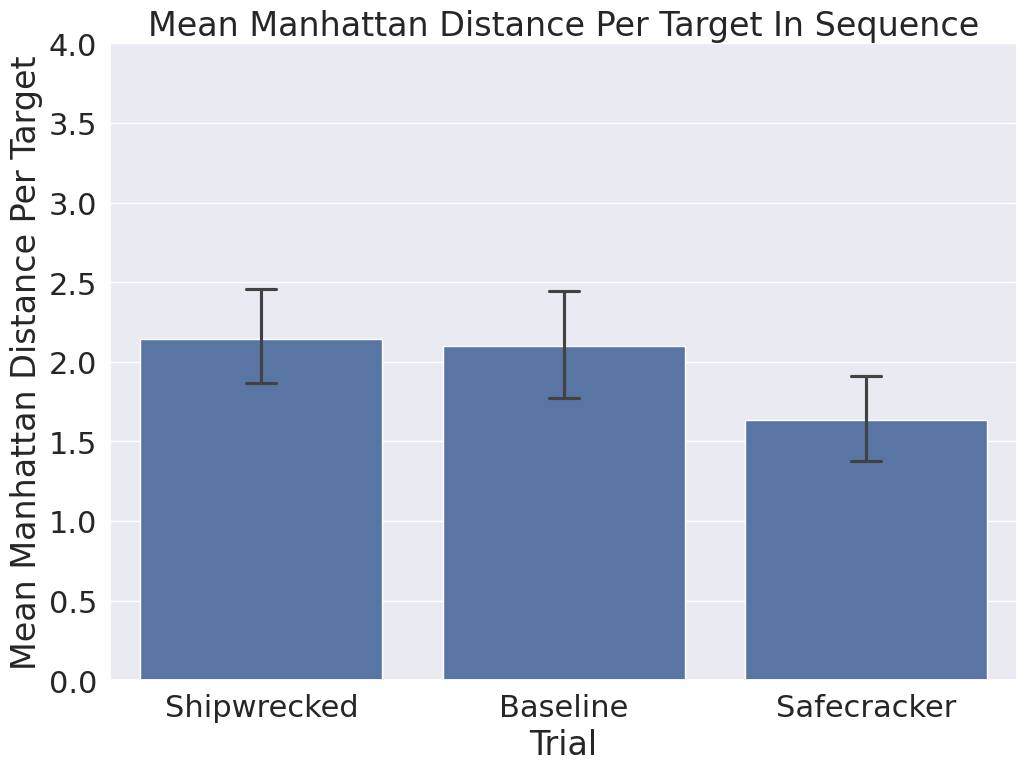

In [ ]:
plt.figure()
sns.barplot(data=sequence_test_data, x='condition', y=f'mean_manhattan_distance_per_target', ci=95, capsize=0.1).set(title="Mean Manhattan Distance Per Target In Sequence", xlabel="Trial", ylabel="Mean Manhattan Distance Per Target")
plt.ylim(0,4)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_mean_manhattan_distance_per_targets.png")

In [ ]:
test_sequences = sequence_test_data['sequence'].unique()

sequence_data_remapped = pd.DataFrame(sequence_data_remapped) 

sequence_data_remapped['prolificID'].head()

0    611ffe84a8214760847fc4de
1    611ffe84a8214760847fc4de
2    611ffe84a8214760847fc4de
3    611ffe84a8214760847fc4de
4    611ffe84a8214760847fc4de
Name: prolificID, dtype: str

/tmp/ipykernel_45737/1836448916.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=sequence_data, x='targetID', y=f'manhattanDistance', hue='condition', ci=95, capsize=0.1).set(title=f"Manhattan Distance Per Target In Sequence Test #{int(sequence_number)}", xlabel="TargetID", ylabel="Manhattan Distance")
/tmp/ipykernel_45737/1836448916.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=sequence_data, x='targetID', y=f'manhattanDistance', hue='condition', ci=95, capsize=0.1).set(title=f"Manhattan Distance Per Target In Sequence Test #{int(sequence_number)}", xlabel="TargetID", ylabel="Manhattan Distance")
/tmp/ipykernel_45737/1836448916.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=sequence_data, x='targetID', y=f'manhattanDistance', hue='condition', ci=95, capsize=0

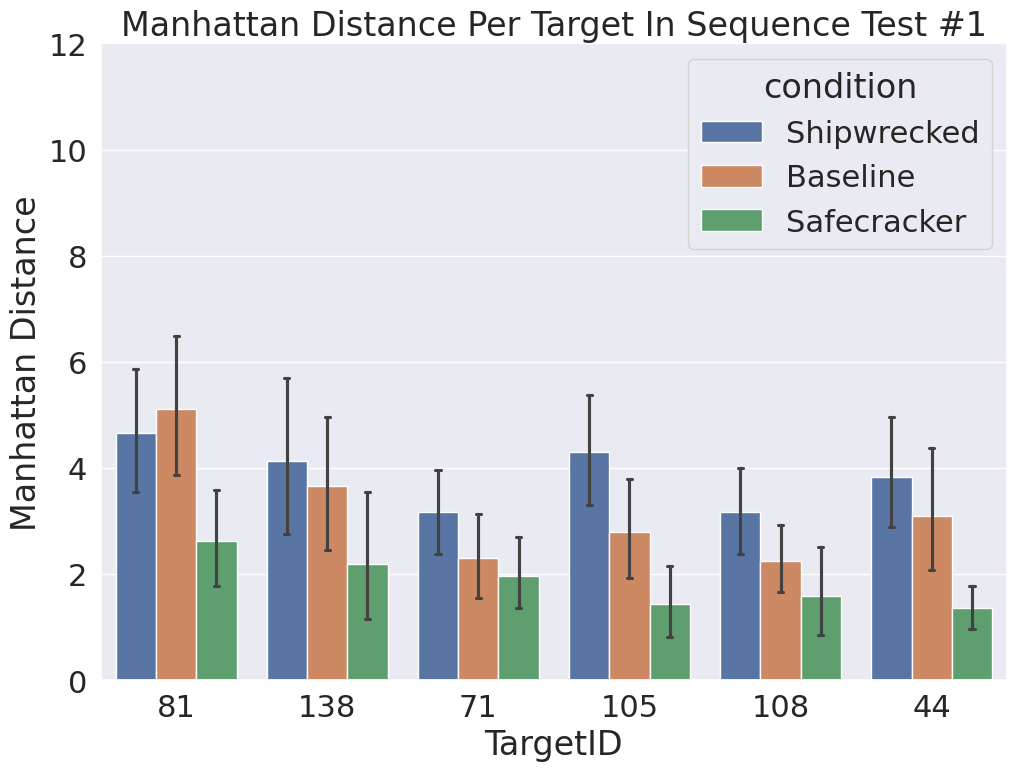

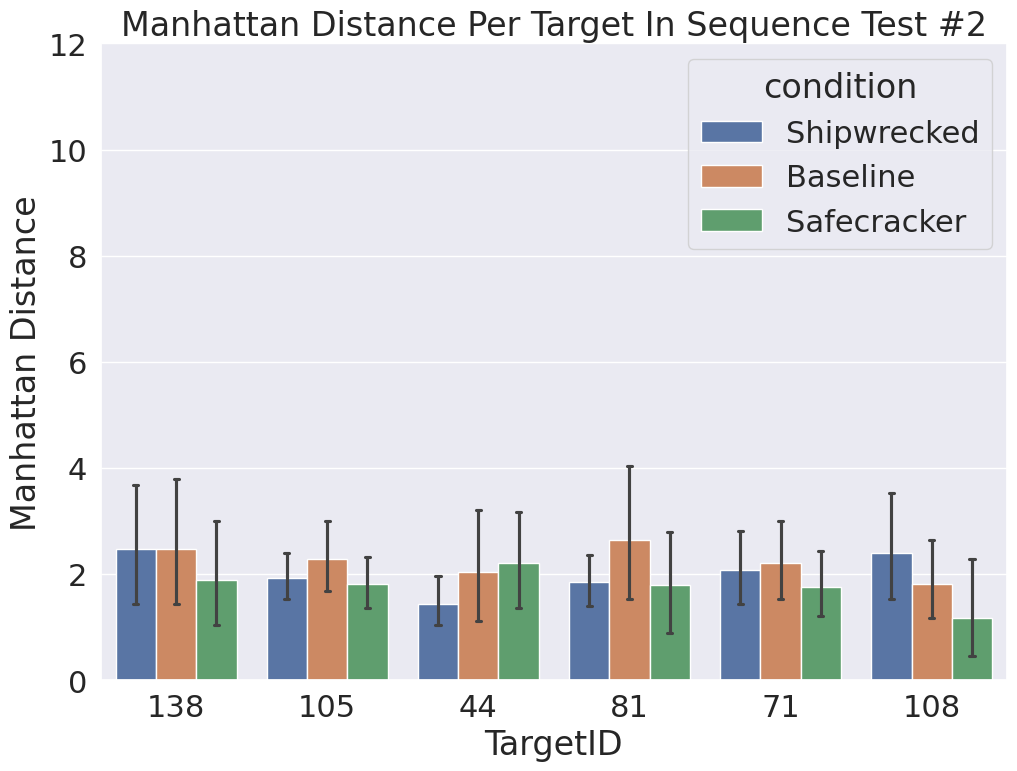

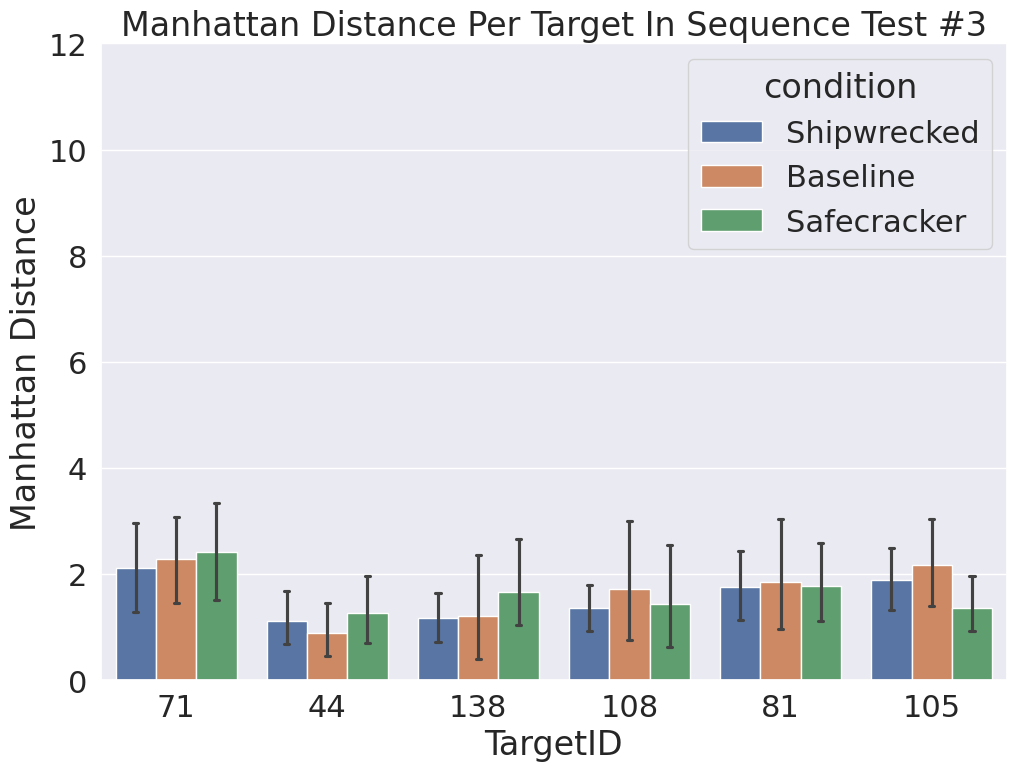

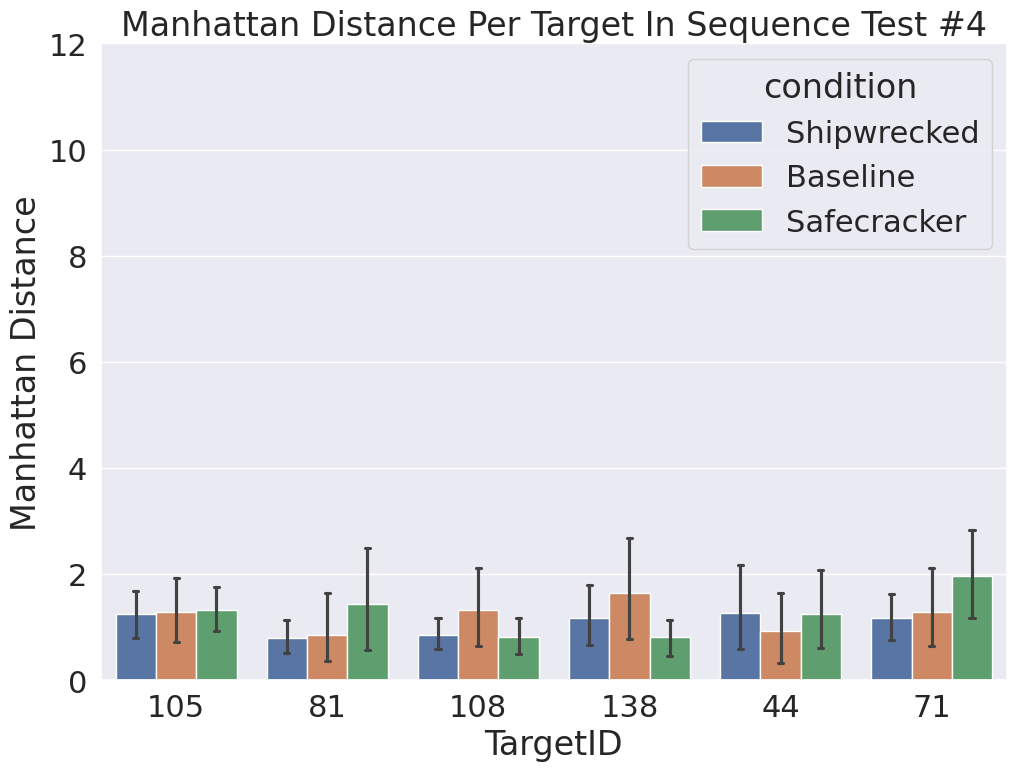

In [ ]:
sequence_number = 1

for sequence in test_sequences:

    sequence_data = sequence_data_remapped[sequence_data_remapped['sequence'] == sequence]
    plt.figure()
    sns.barplot(data=sequence_data, x='targetID', y=f'manhattanDistance', hue='condition', ci=95, capsize=0.1).set(title=f"Manhattan Distance Per Target In Sequence Test #{int(sequence_number)}", xlabel="TargetID", ylabel="Manhattan Distance")
    plt.ylim(0,12)
    plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_manhattan_distance_per_targets_sequence_{int(sequence_number)}.png")
    sequence_number+=1

In [ ]:
sequence_test_data['confidence'].unique()

array([2, 5, 4, 6, 3, 1, 7])

/tmp/ipykernel_45737/1551573925.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=sequence_data_remapped, x='breakpoint', y=f'manhattanDistance', hue='condition', ci=95, capsize=0.1, dodge=True).set( xlabel="Block", ylabel="Mean error per target")


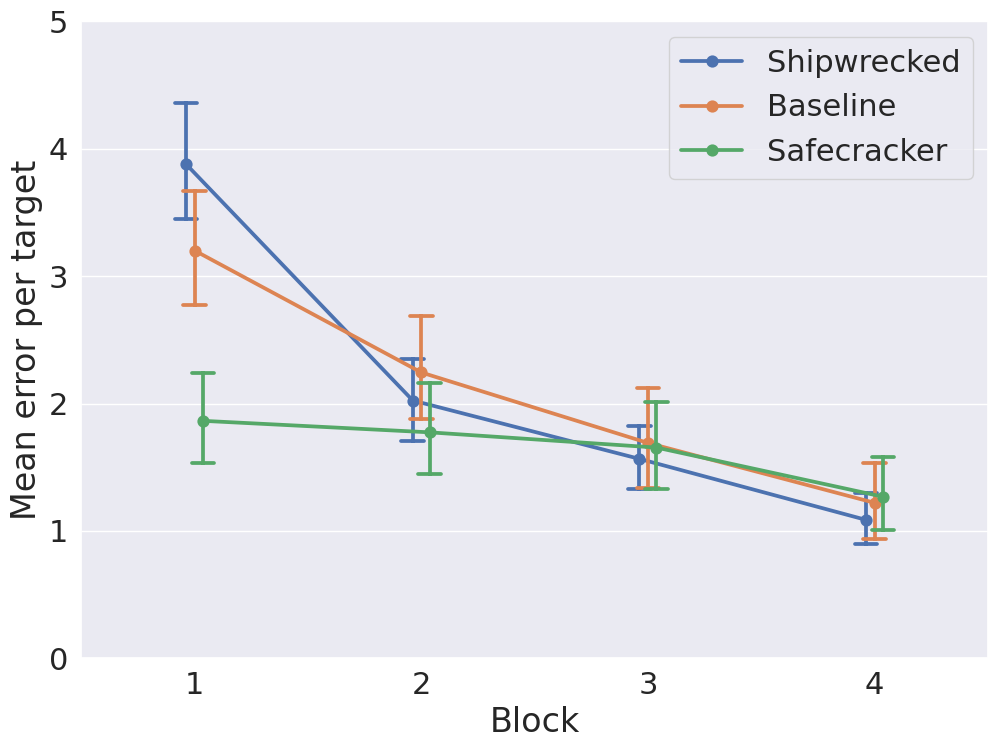

In [ ]:


plt.figure()
sns.pointplot(data=sequence_data_remapped, x='breakpoint', y=f'manhattanDistance', hue='condition', ci=95, capsize=0.1, dodge=True).set( xlabel="Block", ylabel="Mean error per target")
plt.ylim(0,5)
plt.legend(title='')
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_manhattan_distance_means_per_breakpoint.png")

In [ ]:
sequence_data_remapped.to_csv("./data/for-analysis/sequence_data_mapped_to_individual_targets.csv")

In [ ]:
sequence_data_distance_totals = []

def save_to_sequence_data_distance_totals(row):
    manhattan_distance_list = row['manhattanDistanceLog'].split(',')
    euclidean_distance_list = row['euclideanDistanceLog'].split(',')
    total_manhattan = 0
    total_euclidean = 0
    for i in range(0, len(manhattan_distance_list)):
        total_manhattan+=int(manhattan_distance_list[i])
        total_euclidean+=float(euclidean_distance_list[i])
    sequence_data_distance_totals.append({
        'sequence': row['sequence'],
        'condition': row['condition'],
        'participantID': str(row['participantID']),
        'breakpoint': row['gameDistributionIndex']+1  if row['condition'] == 'Simon' else row['block'], # does simon have these the same?
        'total_manhattan': total_manhattan,
        'total_euclidean': total_euclidean
    })
    return row

In [ ]:
sequence_test_data.apply(lambda x: save_to_sequence_data_distance_totals(x), axis =1)

trialLogID  participantID               timeSubmitted  pid    condition  \
0           583              2  2026-02-03 16:52:33.344463    2  Shipwrecked   
1           993              2  2026-02-03 16:55:29.523561    2  Shipwrecked   
2          1393              2  2026-02-03 16:58:01.589978    2  Shipwrecked   
3          1787              2  2026-02-03 17:00:19.231058    2  Shipwrecked   
4           273              3  2026-02-03 16:49:58.899974    3  Shipwrecked   
..          ...            ...                         ...  ...          ...   
351        1537             32  2026-02-03 21:36:52.607381   32  Safecracker   
352        1453             33  2026-02-03 21:29:25.548461   33  Safecracker   
353        1495             33  2026-02-03 21:32:55.831350   33  Safecracker   
354        1532             33  2026-02-03 21:36:26.162540   33  Safecracker   
355        1557             33  2026-02-03 21:39:54.204443   33  Safecracker   

                   prolificID  day             phase  block  trial  ...  \
0    611ffe84a8214760847fc4de    1  sequence_testing      1      1  ...   
1    611ffe84a8214760847fc4de    1  sequence_testing      2      1  ...   
2    611ffe84a8214760847fc4de    1  sequence_testing      3      1  ...   
3    611ffe84a8214760847fc4de    1  sequence_testing      4      1  ...   
4    6969682819258eddb397598e    1  sequence_testing      1      1  ...   
..                        ...  ...               ...    ...    ...  ...   
351  5bcbde9d08a62c0001f86bd0    1  sequence_testing      1      1  ...   
352  65465c5bc5a014ec683d55cf    1  sequence_testing      1      1  ...   
353  65465c5bc5a014ec683d55cf    1  sequence_testing      1      1  ...   
354  65465c5bc5a014ec683d55cf    1  sequence_testing      1      1  ...   
355  65465c5bc5a014ec683d55cf    1  sequence_testing      1      1  ...   

     sequence_test_order_by_participant  sequence_test_order  \
0                                     1                    1   
1                                     2                    1   
2                                     3                    2   
3                                     4                    2   
4                                     1                    1   
..                                  ...                  ...   
351                                   4                    2   
352                                   1                    1   
353                                   2                    1   
354                                   3                    2   
355                                   4                    2   

     gameDistributionIndex  cursorWidth  ctForTargetInOrder  targetErrorArray  \
0                      NaN          NaN                 NaN               NaN   
1                      NaN          NaN                 NaN               NaN   
2                      NaN          NaN                 NaN               NaN   
3                      NaN          NaN                 NaN               NaN   
4                      NaN          NaN                 NaN               NaN   
..                     ...          ...                 ...               ...   
351                    3.0         75.0                                         
352                    0.0         75.0                                         
353                    1.0         75.0                                         
354                    2.0         75.0                                         
355                    3.0         75.0                                         

     errorInTrial  breakpoint  mean_manhattan_distance_per_target  \
0             NaN           1                            3.166667   
1             NaN           2                            3.833333   
2             NaN           3                            2.333333   
3             NaN           4                            0.500000   
4             NaN           1                           

In [ ]:
sequence_data_distances = pd.DataFrame(sequence_data_distance_totals)   


In [ ]:
sequence_data_distances.to_csv("./data/for-analysis/sequence_data_distance_totals.csv")

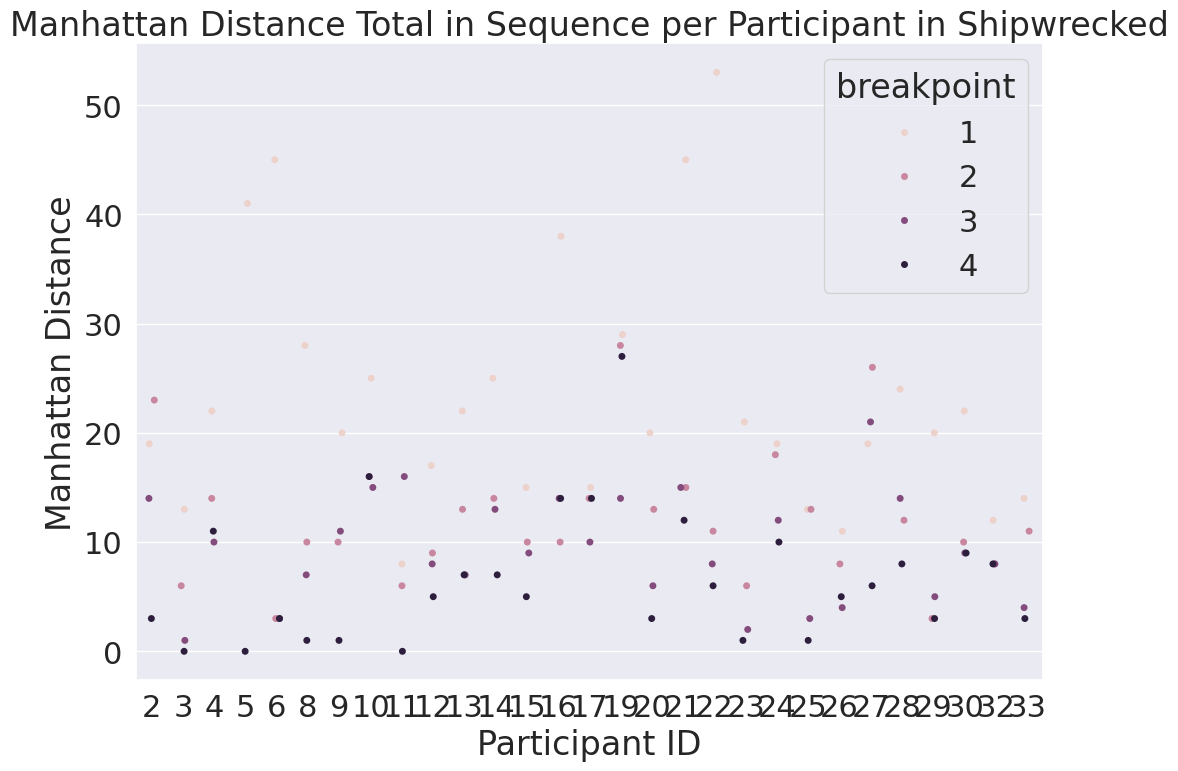

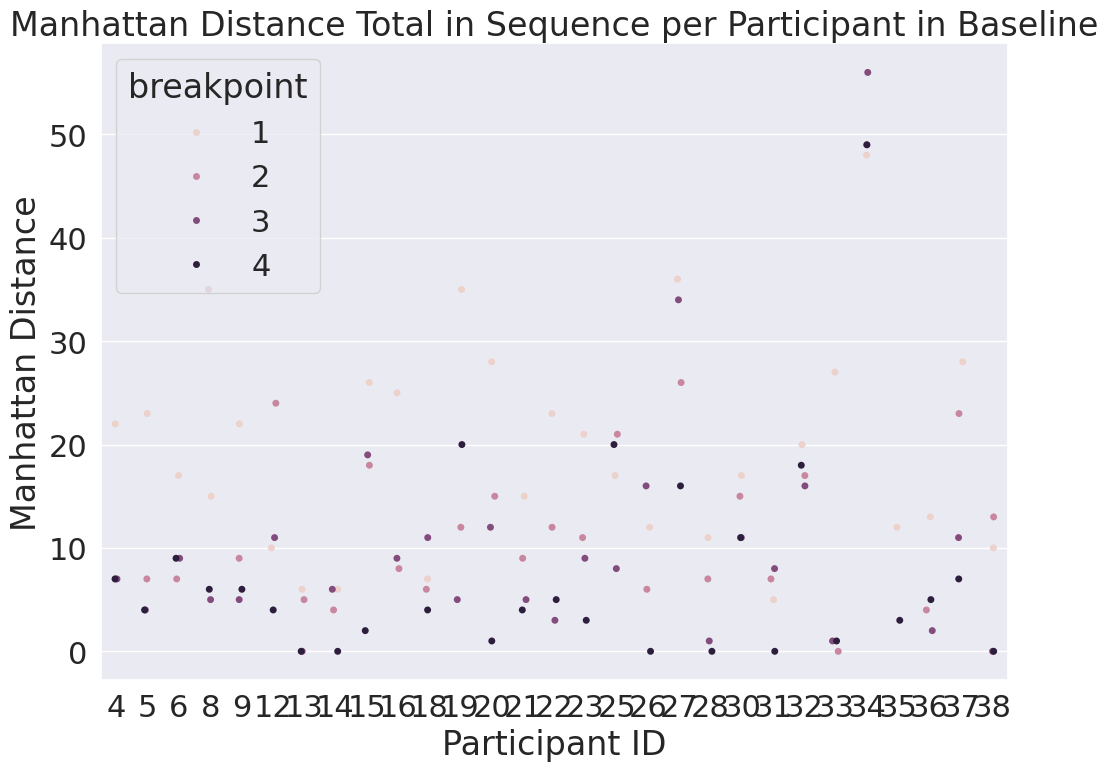

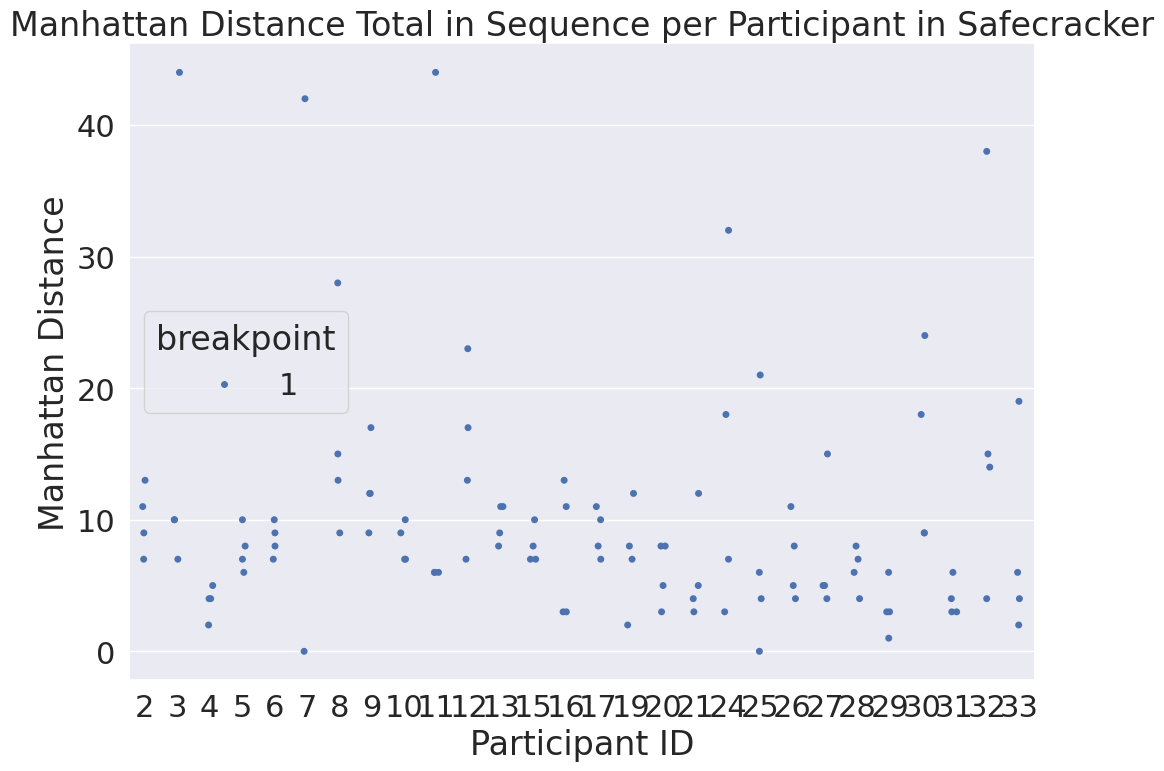

In [ ]:
conditions = sequence_data_distances['condition'].unique()

for condition in conditions:
    condition_data =sequence_data_distances[sequence_data_distances['condition']==condition]
    plt.figure()
    sns.stripplot(data=condition_data, x="participantID", y="total_manhattan", hue='breakpoint', jitter=True).set(title=f"Manhattan Distance Total in Sequence per Participant in {condition}", xlabel="Participant ID", ylabel="Manhattan Distance")
    plt.savefig(f"./plots/{FOLDER_NAME}/test_data/participant_sequence_test_manhattan_pointplot_{condition}.png")

In [ ]:
sequence_test_data['prolificID'].head()

0    611ffe84a8214760847fc4de
1    611ffe84a8214760847fc4de
2    611ffe84a8214760847fc4de
3    611ffe84a8214760847fc4de
4    6969682819258eddb397598e
Name: prolificID, dtype: str

/tmp/ipykernel_45737/2206295563.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=sequence_test_data, x='breakpoint', y=f'confidence', hue='condition', dodge=True,ci=95, capsize=0.1).set(xlabel="Block")


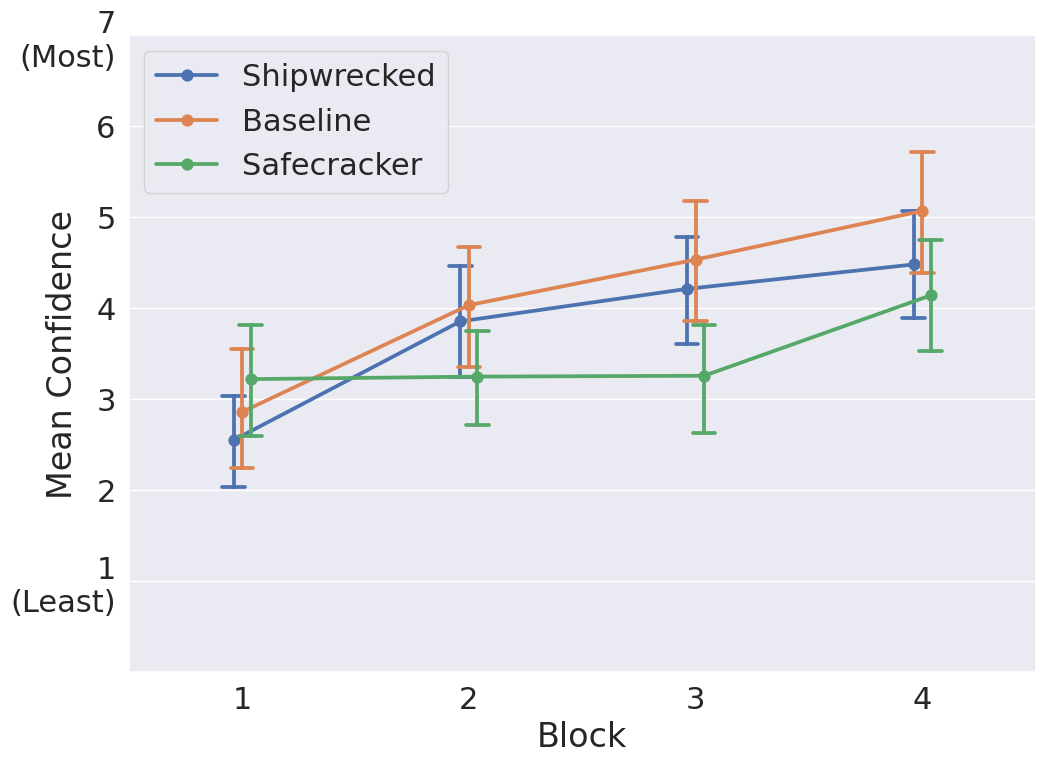

In [ ]:
def _assignBreakpoint(row):
    return row['gameDistributionIndex']+1 if row['condition']=='Safecracker' else row['block']

sequence_test_data['breakpoint'] = sequence_test_data.apply(lambda x: _assignBreakpoint(x), axis=1)
sequence_test_data.to_csv("./data/for-analysis/sequence_test_data.csv")

plt.figure()

sns.pointplot(data=sequence_test_data, x='breakpoint', y=f'confidence', hue='condition', dodge=True,ci=95, capsize=0.1).set(xlabel="Block")
plt.ylim(0,7)
plt.yticks([1, 2, 3, 4, 5, 6, 7], ['1\n(Least)', '2', '3', '4', '5', '6', '7\n(Most)'])
plt.legend(title="")
plt.ylabel(ylabel="Mean Confidence", labelpad=-50)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_confidence.png")